# Capston Project - Joshua Chu

## Prepare data for EDA

In [1]:
#load packages required to import the HDF5 dataset (h5py), manipulate the
#data for analysis (numpy and pandas), and visualize data (matplotlib.pyplot)

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#variables dkeys and W are empty lists that will be populated in the for
#loop. The RadComDynamic.hdf5 file contains the dataset and data will
#be extracted by keys (dkeys) and associated waveforms (W) (see below 
#for key format). When the end of the file is reached it is closed.

dkeys = []
W = []

with h5py.File('RadComDynamic.hdf5', 'r') as f:
    for key in f.keys():
        dkeys.append(key)   #('amdsb', 'AM radio', -10, 0)
        W.append(f[key][:])
f.close()

In [3]:
#convert the dkeys list into a pandas dataframe for easy manipulation. Rename
#the column to Keys and visualize the result.

df=pd.DataFrame(dkeys)
df.columns=['Keys']
df

Keys
0             ('amdsb', 'AM radio', -10, 0)
1             ('amdsb', 'AM radio', -10, 1)
2            ('amdsb', 'AM radio', -10, 10)
3           ('amdsb', 'AM radio', -10, 100)
4           ('amdsb', 'AM radio', -10, 101)
...                                     ...
125356  ('pulsed', 'Ground mapping', 8, 95)
125357  ('pulsed', 'Ground mapping', 8, 96)
125358  ('pulsed', 'Ground mapping', 8, 97)
125359  ('pulsed', 'Ground mapping', 8, 98)
125360  ('pulsed', 'Ground mapping', 8, 99)

[125361 rows x 1 columns]

In [4]:
#the keys must be processed by removing commas, quotes, and
#parentheses. Further, the signal and modulation must be combined
#to create the waveform name. The column order for the processed
#dataset is waveform, snr, and sample with a final dataset size
#of 125360 records and 3 fields.

df['Keys']=df['Keys'].str.replace("'","")
df['Keys']=df['Keys'].str.replace("(","")
df['Keys']=df['Keys'].str.replace(")","")
df=df['Keys'].str.split(',',n=-1, expand=True)
df['waveform'] = df[0] + ' ' + df[1]
df.drop([0,1], axis=1,inplace=True)
df.columns=['snr','sample','waveform']
df=df.reindex(columns= ['waveform','snr','sample'])
df

waveform   snr sample
0              amdsb  AM radio   -10      0
1              amdsb  AM radio   -10      1
2              amdsb  AM radio   -10     10
3              amdsb  AM radio   -10    100
4              amdsb  AM radio   -10    101
...                        ...   ...    ...
125356  pulsed  Ground mapping     8     95
125357  pulsed  Ground mapping     8     96
125358  pulsed  Ground mapping     8     97
125359  pulsed  Ground mapping     8     98
125360  pulsed  Ground mapping     8     99

[125361 rows x 3 columns]

In [5]:
#the IQ variable contains the waveform values in a pandas dataframe and
#concatenated with the dataframe 'df' to construct a dataset with the
#waveform, snr, sample, and association I/Q components. Because no
#sorting occurred up to this point, I was able to ensure each record is
#properly matched with its key.

IQ=pd.DataFrame(W)
tent_df1=[df,IQ]
final_df=pd.concat(tent_df1,sort=False,axis=1)
final_df

waveform   snr sample         0         1         2  \
0              amdsb  AM radio   -10      0  0.002221 -0.004063  0.000494   
1              amdsb  AM radio   -10      1  0.008891  0.004866  0.014986   
2              amdsb  AM radio   -10     10  0.006300  0.001776 -0.010451   
3              amdsb  AM radio   -10    100 -0.000122  0.005483 -0.001585   
4              amdsb  AM radio   -10    101 -0.002729 -0.000323  0.007239   
...                        ...   ...    ...       ...       ...       ...   
125356  pulsed  Ground mapping     8     95  0.000306  0.013375 -0.005643   
125357  pulsed  Ground mapping     8     96  0.000384  0.015908 -0.006123   
125358  pulsed  Ground mapping     8     97  0.003333  0.011050 -0.011007   
125359  pulsed  Ground mapping     8     98 -0.003187  0.000421  0.007080   
125360  pulsed  Ground mapping     8     99 -0.004185 -0.009879  0.005273   

               3         4         5         6  ...       246       247  \
0      -0.004986  0.000006 -0.001038  0.014725  ... -0.005231  0.000294   
1       0.004143 -0.002043 -0.002313  0.002708  ...  0.004554  0.000990   
2      -0.007669 -0.001424  0.003536 -0.000587  ... -0.008391  0.006105   
3      -0.000903  0.002364  0.011633  0.007933  ... -0.004955 -0.009475   
4       0.000542 -0.011873 -0.006293 -0.004994  ... -0.004852 -0.017370   
...          ...       ...       ...       ...  ...       ...       ...   
125356 -0.021434  0.012502  0.015853 -0.011063  ...  0.000316 -0.002167   
125357 -0.022489  0.007923  0.021330 -0.009824  ... -0.000977  0.000830   
125358 -0.016945  0.009486  0.013366 -0.012780  ...  0.002984 -0.001703   
125359  0.012843 -0.008726 -0.008270  0.008692  ...  0.002551  0.002454   
125360  0.010668  0.000728 -0.011827 -0.003999  ... -0.008054 -0.000141   

             248       249       250       251       252       253       254  \
0      -0.001417  0.012045  0.007631 -0.005889 -0.002507 -0.009608  0.010947   
1      -0.010600  0.001873  0.013689 -0.002886  0.001874  0.004262 -0.003954   
2      -0.005609  0.006628  0.007770 -0.008597 -0.001165 -0.010212 -0.011925   
3       0.003330 -0.002312 -0.009054  0.005174  0.008105 -0.005590 -0.002879   
4       0.005168 -0.001423  0.002580  0.003681 -0.002217  0.006523  0.004785   
...          ...       ...       ...       ...       ...       ...       ...   
125356  0.001268 -0.001271 -0.000225  0.003772  0.001765 -0.000621 -0.001129   
125357  0.000662  0.001794 -0.001123  0.000539 -0.000681 -0.001569  0.000166   
125358  0.002678 -0.001348  0.002206 -0.001314 -0.001677  0.002281 -0.002006   
125359 -0.002401  0.004357  0.002961 -0.004528 -0.000850  0.001945 -0.002851   
125360  0.006073 -0.001205  0.006602 -0.008823  0.003431  0.000801 -0.006599   

             255  
0       0.012112  
1      -0.001321  
2      -0.002446  
3       0.002827  
4      -0.000093  
...          ...  
125356 -0.000762  
125357 -0.000394  
125358  0.000501  
125359 -0.000586  
125360 -0.009537  

[125361 rows x 259 columns]

In [6]:
#the final dataset was sorted by waveform, snr, and sample in ascending
#order and the column index was reset. A new .csv file was created to
#avoid loading the hdf5 file each time I analyze the data.

final_df['snr']=final_df['snr'].astype('int')
final_df['sample']=final_df['sample'].astype('int')
final_df=final_df.sort_values(by=['waveform','snr','sample'], ascending=True).reset_index(drop=True)
#final_df.to_csv('final_df.csv')
final_df

waveform  snr  sample         0         1         2  \
0              amdsb  AM radio  -20       0  0.000124 -0.003148  0.000589   
1              amdsb  AM radio  -20       1  0.000243  0.005241  0.002270   
2              amdsb  AM radio  -20       2 -0.003233 -0.002000  0.006205   
3              amdsb  AM radio  -20       3 -0.008946 -0.001575  0.005534   
4              amdsb  AM radio  -20       4  0.005008  0.001750 -0.000259   
...                        ...  ...     ...       ...       ...       ...   
125356  pulsed  Ground mapping   18     695  0.000664  0.000570  0.020149   
125357  pulsed  Ground mapping   18     696 -0.000014 -0.017624  0.007411   
125358  pulsed  Ground mapping   18     697  0.000249 -0.001434  0.022765   
125359  pulsed  Ground mapping   18     698 -0.000447  0.006813  0.024152   
125360  pulsed  Ground mapping   18     699  0.000095  0.021630  0.014281   

               3         4         5         6  ...       246       247  \
0      -0.009289 -0.001816 -0.003500  0.003450  ...  0.000732  0.010682   
1      -0.001386 -0.002026 -0.005270  0.011141  ... -0.003863 -0.002518   
2      -0.000821  0.003488 -0.002431 -0.008256  ... -0.003632  0.003301   
3       0.010561  0.004172 -0.001303  0.001822  ...  0.000441  0.002733   
4      -0.008179 -0.007281  0.007556  0.003569  ... -0.006410  0.004558   
...          ...       ...       ...       ...  ...       ...       ...   
125356 -0.001224 -0.020974  0.002782  0.022702  ... -0.001341  0.000191   
125357  0.025022 -0.011352 -0.022362  0.010744  ...  0.000558 -0.000028   
125358  0.007392 -0.025753 -0.005688  0.024822  ...  0.000100 -0.000210   
125359 -0.003067 -0.026138  0.004179  0.025244  ...  0.000102 -0.000177   
125360 -0.022884 -0.012985  0.022035  0.012976  ... -0.000106 -0.000017   

             248       249       250       251       252       253       254  \
0      -0.011375  0.002663  0.003183 -0.007208 -0.001212  0.013849 -0.004273   
1       0.005271 -0.005481 -0.003317 -0.011191  0.018409  0.000417 -0.000381   
2       0.001471 -0.005509 -0.001511  0.002575  0.004473  0.003793  0.003305   
3       0.000815 -0.006229 -0.004532  0.006419 -0.006559 -0.006051 -0.004443   
4      -0.000311 -0.006566 -0.001344  0.005945 -0.010363 -0.000011  0.019072   
...          ...       ...       ...       ...       ...       ...       ...   
125356 -0.000589 -0.000040  0.001437  0.000453  0.000301  0.001484 -0.002604   
125357 -0.000383 -0.000011 -0.000210  0.000262  0.000205 -0.000293 -0.000139   
125358  0.000189 -0.000511  0.000329 -0.000297  0.000013  0.000155 -0.000191   
125359 -0.000104 -0.000802  0.000271 -0.000358  0.000176 -0.000219 -0.000532   
125360 -0.000121  0.000071 -0.000042 -0.000049  0.000084 -0.000167  0.000070   

             255  
0       0.009545  
1      -0.000687  
2      -0.002250  
3       0.000676  
4      -0.002903  
...          ...  
125356  0.001356  
125357 -0.000064  
125358  0.000381  
125359 -0.000652  
125360  0.000477  

[125361 rows x 259 columns]

In [7]:
del df, IQ, tent_df1, final_df

# Exploratory Data Analysis

In [21]:
#load packages required to manipulate the data for analysis (numpy and pandas)
#and visualize data (matplotlib.pyplot). The final_df.csv created earlier is
#loaded with the first column of the dataset ignored.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

final_df=pd.read_csv('./final_df.csv').iloc[:,1:]

### Visualize samples by grouping waveforms then calculating median and means - ignore snr

In [22]:
#drop the second and third columns that correspond to snr and samples. The
#inplace function is used to modify the dataframe without saving to another
#variable.

final_df.drop(final_df.columns[[1,2,3]],axis=1,inplace=True)
final_df

waveform         1         2         3         4  \
0              amdsb  AM radio -0.003148  0.000589 -0.009289 -0.001816   
1              amdsb  AM radio  0.005241  0.002270 -0.001386 -0.002026   
2              amdsb  AM radio -0.002000  0.006205 -0.000821  0.003488   
3              amdsb  AM radio -0.001575  0.005534  0.010561  0.004172   
4              amdsb  AM radio  0.001750 -0.000259 -0.008179 -0.007281   
...                        ...       ...       ...       ...       ...   
125356  pulsed  Ground mapping  0.000570  0.020149 -0.001224 -0.020974   
125357  pulsed  Ground mapping -0.017624  0.007411  0.025022 -0.011352   
125358  pulsed  Ground mapping -0.001434  0.022765  0.007392 -0.025753   
125359  pulsed  Ground mapping  0.006813  0.024152 -0.003067 -0.026138   
125360  pulsed  Ground mapping  0.021630  0.014281 -0.022884 -0.012985   

               5         6         7         8         9  ...       246  \
0      -0.003500  0.003450 -0.010957  0.005574 -0.006509  ...  0.000732   
1      -0.005270  0.011141  0.000810 -0.004696 -0.004581  ... -0.003863   
2      -0.002431 -0.008256 -0.004550  0.000536 -0.004701  ... -0.003632   
3      -0.001303  0.001822  0.004376 -0.003745  0.003575  ...  0.000441   
4       0.007556  0.003569  0.015119 -0.006026 -0.004242  ... -0.006410   
...          ...       ...       ...       ...       ...  ...       ...   
125356  0.002782  0.022702 -0.001737  0.004269 -0.001497  ... -0.001341   
125357 -0.022362  0.010744  0.022500  0.004345 -0.000182  ...  0.000558   
125358 -0.005688  0.024822  0.005781 -0.001180  0.002061  ...  0.000100   
125359  0.004179  0.025244 -0.003675 -0.002354  0.001552  ...  0.000102   
125360  0.022035  0.012976 -0.022248 -0.004425  0.001908  ... -0.000106   

             247       248       249       250       251       252       253  \
0       0.010682 -0.011375  0.002663  0.003183 -0.007208 -0.001212  0.013849   
1      -0.002518  0.005271 -0.005481 -0.003317 -0.011191  0.018409  0.000417   
2       0.003301  0.001471 -0.005509 -0.001511  0.002575  0.004473  0.003793   
3       0.002733  0.000815 -0.006229 -0.004532  0.006419 -0.006559 -0.006051   
4       0.004558 -0.000311 -0.006566 -0.001344  0.005945 -0.010363 -0.000011   
...          ...       ...       ...       ...       ...       ...       ...   
125356  0.000191 -0.000589 -0.000040  0.001437  0.000453  0.000301  0.001484   
125357 -0.000028 -0.000383 -0.000011 -0.000210  0.000262  0.000205 -0.000293   
125358 -0.000210  0.000189 -0.000511  0.000329 -0.000297  0.000013  0.000155   
125359 -0.000177 -0.000104 -0.000802  0.000271 -0.000358  0.000176 -0.000219   
125360 -0.000017 -0.000121  0.000071 -0.000042 -0.000049  0.000084 -0.000167   

             254       255  
0      -0.004273  0.009545  
1      -0.000381 -0.000687  
2       0.003305 -0.002250  
3      -0.004443  0.000676  
4       0.019072 -0.002903  
...          ...       ...  
125356 -0.002604  0.001356  
125357 -0.000139 -0.000064  
125358 -0.000191  0.000381  
125359 -0.000532 -0.000652  
125360  0.000070  0.000477  

[125361 rows x 256 columns]

In [23]:
#the dataframe was grouped by waveform and the median is calculated. Following
#the median calculation the dataset was transposed to prepare for plotting. The
#dataset is 256 records and 9 waveforms.

trans=final_df.groupby(['waveform']).median().T
trans

waveform  amdsb  AM radio  amssb  AM radio  ask  short-range  bpsk  Satcom  \
1                0.000002         0.000248          0.000205     -0.000008   
2                0.000026         0.000090         -0.000120      0.000003   
3                0.000060        -0.000028         -0.000173     -0.000004   
4               -0.000132        -0.000016          0.000027      0.000003   
5               -0.000047         0.000238          0.000225      0.000001   
..                    ...              ...               ...           ...   
251              0.000087         0.000376         -0.000059     -0.000071   
252             -0.000305         0.000063         -0.000214      0.000048   
253             -0.000038         0.000079          0.000128     -0.000011   
254              0.000381         0.000328          0.000159     -0.000059   
255              0.000036         0.000305         -0.000079      0.000054   

waveform  fmcw  Radar-Altimeter  pulsed  Air-Ground-MTI  \
1                      0.000112                0.000284   
2                      0.000032                0.000337   
3                     -0.000097               -0.000104   
4                     -0.000136                0.000030   
5                      0.000029               -0.000094   
..                          ...                     ...   
251                    0.000194               -0.000021   
252                    0.000052                0.000073   
253                   -0.000061               -0.000097   
254                   -0.000112                0.000050   
255                   -0.000326               -0.000116   

waveform  pulsed  Airborne-detection  pulsed  Airborne-range  \
1                       1.806032e-04                0.000467   
2                       1.358598e-05                0.000071   
3                      -1.525931e-04               -0.000045   
4                       1.784293e-05                0.000063   
5                       3.313028e-04               -0.000032   
..                               ...                     ...   
251                    -7.755332e-07                0.000040   
252                     3.187088e-07                0.000004   
253                    -3.810697e-06                0.000029   
254                    -3.556261e-06               -0.000020   
255                     9.149886e-07                0.000014   

waveform  pulsed  Ground mapping  
1                       0.000336  
2                       0.000162  
3                      -0.000318  
4                      -0.000097  
5                       0.000300  
..                           ...  
251                    -0.000017  
252                     0.000004  
253                     0.000008  
254                    -0.000003  
255                    -0.000015  

[255 rows x 9 columns]

In [24]:
#each of the 9 waveforms are split into I and Q components (each component is 
#128 in length) and saved under signal and modulation variables. For example,
#amdsb_amSig represents the signal (or I component) and the amdsb_amMod
#represents the modulation (or Q component).

amdsb_amSig=trans.iloc[0:128,0].reset_index(drop=True)
amdsb_amMod=trans.iloc[128:,0].reset_index(drop=True)
amssb_amSig=trans.iloc[0:128,1].reset_index(drop=True)
amssb_amMod=trans.iloc[128:,1].reset_index(drop=True)
ask_shraSig=trans.iloc[0:128,2].reset_index(drop=True)
ask_shraMod=trans.iloc[128:,2].reset_index(drop=True)
bpsk_satSig=trans.iloc[0:128,3].reset_index(drop=True)
bpsk_satMod=trans.iloc[128:,3].reset_index(drop=True)
fmcw_radSig=trans.iloc[0:128,4].reset_index(drop=True)
fmcw_radMod=trans.iloc[128:,4].reset_index(drop=True)
pul_airgSig=trans.iloc[0:128,5].reset_index(drop=True)
pul_airgMod=trans.iloc[128:,5].reset_index(drop=True)
pul_airdSig=trans.iloc[0:128,6].reset_index(drop=True)
pul_airdMod=trans.iloc[128:,6].reset_index(drop=True)
pul_airrSig=trans.iloc[0:128,7].reset_index(drop=True)
pul_airrMod=trans.iloc[128:,7].reset_index(drop=True)
pul_grndSig=trans.iloc[0:128,8].reset_index(drop=True)
pul_grndMod=trans.iloc[128:,8].reset_index(drop=True)

<Figure size 1440x1440 with 0 Axes>

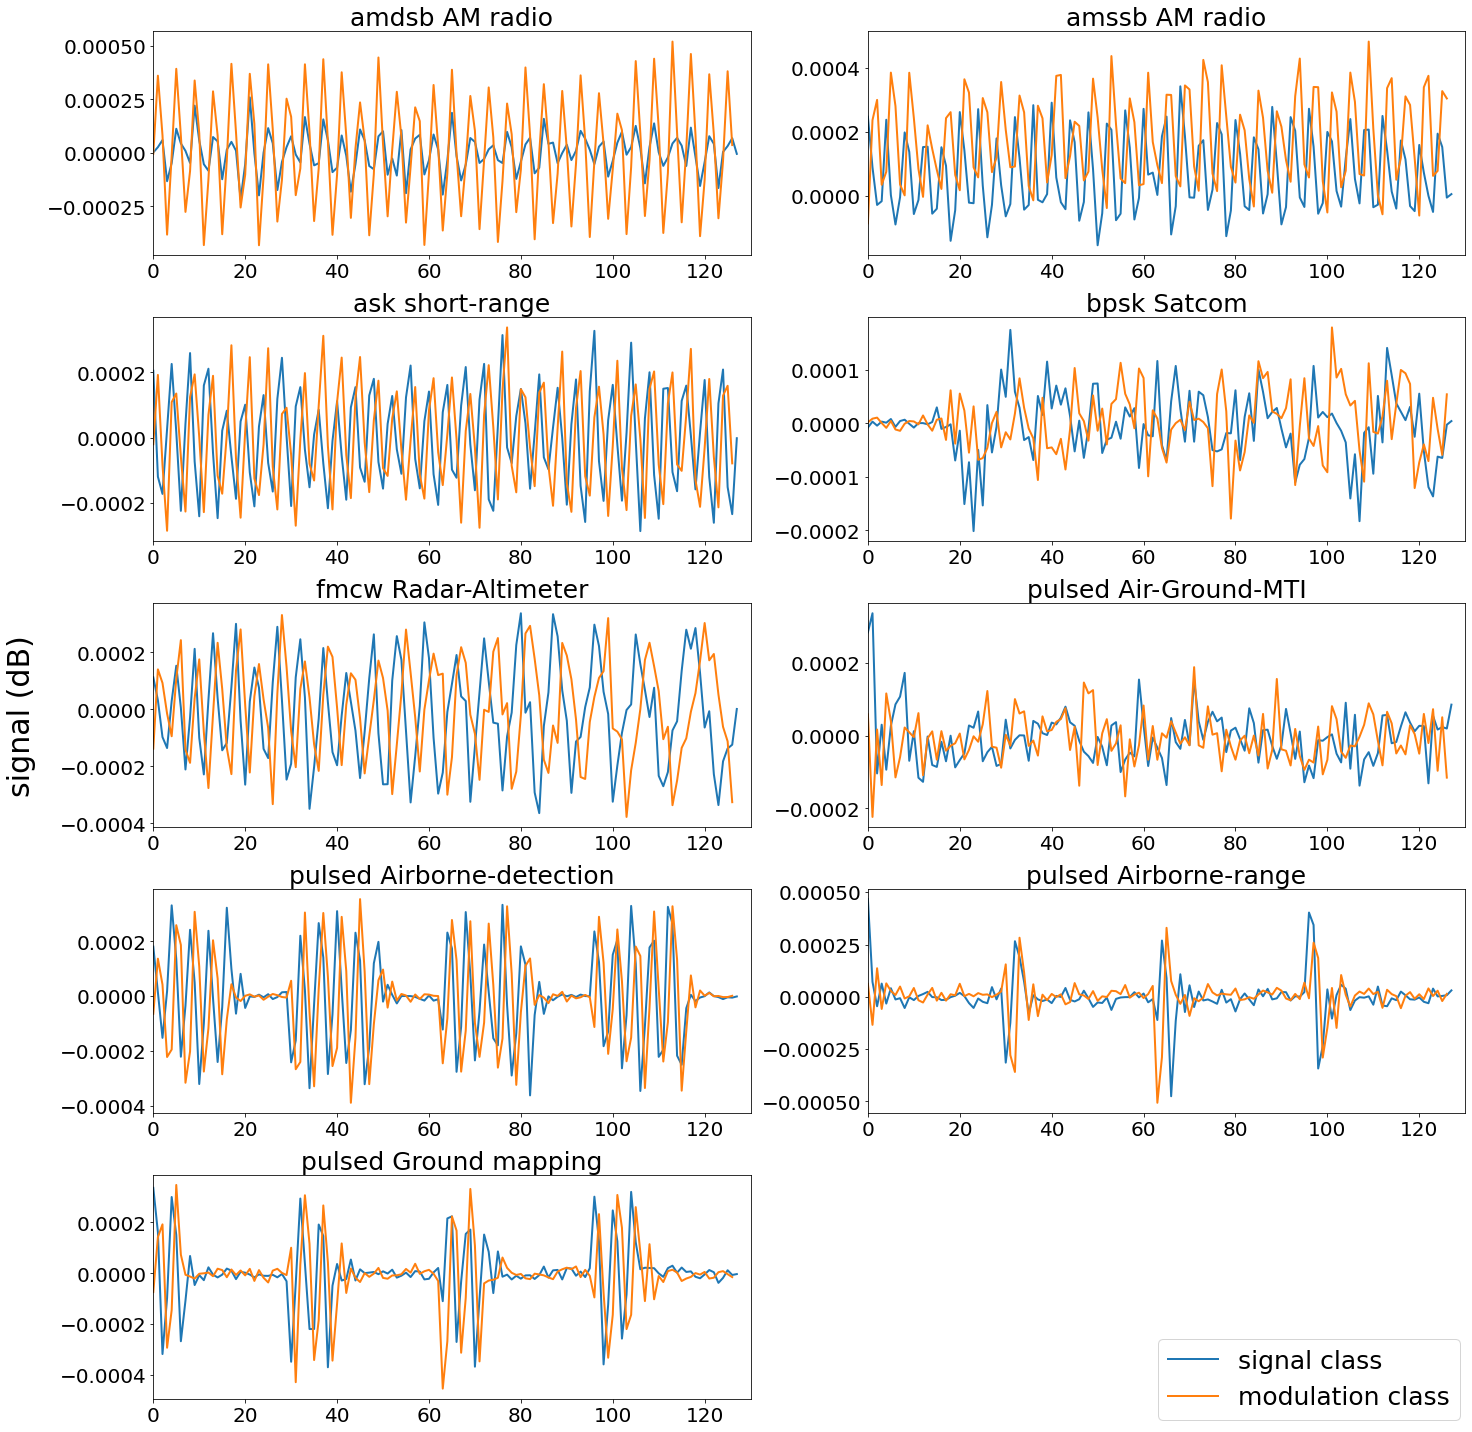

In [47]:
#see below for explanations

plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c=['amdsb AM radio','amssb AM radio','ask short-range','bpsk Satcom','fmcw Radar-Altimeter','pulsed Air-Ground-MTI',
   'pulsed Airborne-detection','pulsed Airborne-range','pulsed Ground mapping']
e=0

for i in range(9):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_title(c[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.02, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('median.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [48]:
#the dataframe was grouped by waveform and the mean is calculated. Following
#the mean calculation the dataset was transposed to prepare for plotting. The
#dataset is 256 records and 9 waveforms.

trans1=final_df.groupby(['waveform']).mean().T
trans1

waveform  amdsb  AM radio  amssb  AM radio  ask  short-range  bpsk  Satcom  \
1               -0.000008         0.000186          0.000085  5.331843e-06   
2                0.000121         0.000091         -0.000039 -1.122520e-05   
3                0.000008        -0.000050         -0.000166 -8.723244e-07   
4               -0.000106         0.000002          0.000070 -4.354152e-05   
5               -0.000091         0.000130          0.000166  1.708353e-05   
..                    ...              ...               ...           ...   
251              0.000052         0.000211         -0.000049 -5.547730e-06   
252             -0.000242         0.000019         -0.000126  4.695507e-05   
253             -0.000019         0.000110          0.000133 -6.632207e-06   
254              0.000276         0.000241          0.000149 -5.396517e-05   
255             -0.000017         0.000186         -0.000058  1.340096e-05   

waveform  fmcw  Radar-Altimeter  pulsed  Air-Ground-MTI  \
1                      0.000098                0.002000   
2                      0.000075                0.000606   
3                     -0.000125               -0.000179   
4                     -0.000098                0.000121   
5                      0.000070               -0.000067   
..                          ...                     ...   
251                    0.000137               -0.000012   
252                    0.000068                0.000056   
253                   -0.000067               -0.000049   
254                   -0.000094                0.000062   
255                   -0.000167               -0.000013   

waveform  pulsed  Airborne-detection  pulsed  Airborne-range  \
1                       1.561293e-04            6.651644e-04   
2                       5.310814e-05            1.294994e-04   
3                      -1.902772e-04           -1.119461e-05   
4                      -8.768619e-05            5.475572e-05   
5                       2.098521e-04            1.624333e-05   
..                               ...                     ...   
251                    -2.636216e-05            2.815633e-05   
252                    -2.143948e-07            1.419076e-05   
253                    -5.236200e-05            5.853780e-05   
254                    -2.215023e-05            6.342771e-07   
255                    -1.482801e-05            3.347300e-05   

waveform  pulsed  Ground mapping  
1                       0.000351  
2                       0.000216  
3                      -0.000334  
4                      -0.000159  
5                       0.000290  
..                           ...  
251                    -0.000006  
252                    -0.000020  
253                     0.000053  
254                    -0.000013  
255                    -0.000030  

[255 rows x 9 columns]

In [49]:
#each of the 9 waveforms are split into I and Q components (each component is 
#128 in length) and saved under signal and modulation variables. For example,
#amdsb_amSig represents the signal (or I component) and the amdsb_amMod
#represents the modulation (or Q component).

amdsb_amSig=trans1.iloc[0:128,0].reset_index(drop=True)
amdsb_amMod=trans1.iloc[128:,0].reset_index(drop=True)
amssb_amSig=trans1.iloc[0:128,1].reset_index(drop=True)
amssb_amMod=trans1.iloc[128:,1].reset_index(drop=True)
ask_shraSig=trans1.iloc[0:128,2].reset_index(drop=True)
ask_shraMod=trans1.iloc[128:,2].reset_index(drop=True)
bpsk_satSig=trans1.iloc[0:128,3].reset_index(drop=True)
bpsk_satMod=trans1.iloc[128:,3].reset_index(drop=True)
fmcw_radSig=trans1.iloc[0:128,4].reset_index(drop=True)
fmcw_radMod=trans1.iloc[128:,4].reset_index(drop=True)
pul_airgSig=trans1.iloc[0:128,5].reset_index(drop=True)
pul_airgMod=trans1.iloc[128:,5].reset_index(drop=True)
pul_airdSig=trans1.iloc[0:128,6].reset_index(drop=True)
pul_airdMod=trans1.iloc[128:,6].reset_index(drop=True)
pul_airrSig=trans1.iloc[0:128,7].reset_index(drop=True)
pul_airrMod=trans1.iloc[128:,7].reset_index(drop=True)
pul_grndSig=trans1.iloc[0:128,8].reset_index(drop=True)
pul_grndMod=trans1.iloc[128:,8].reset_index(drop=True)

<Figure size 1440x1440 with 0 Axes>

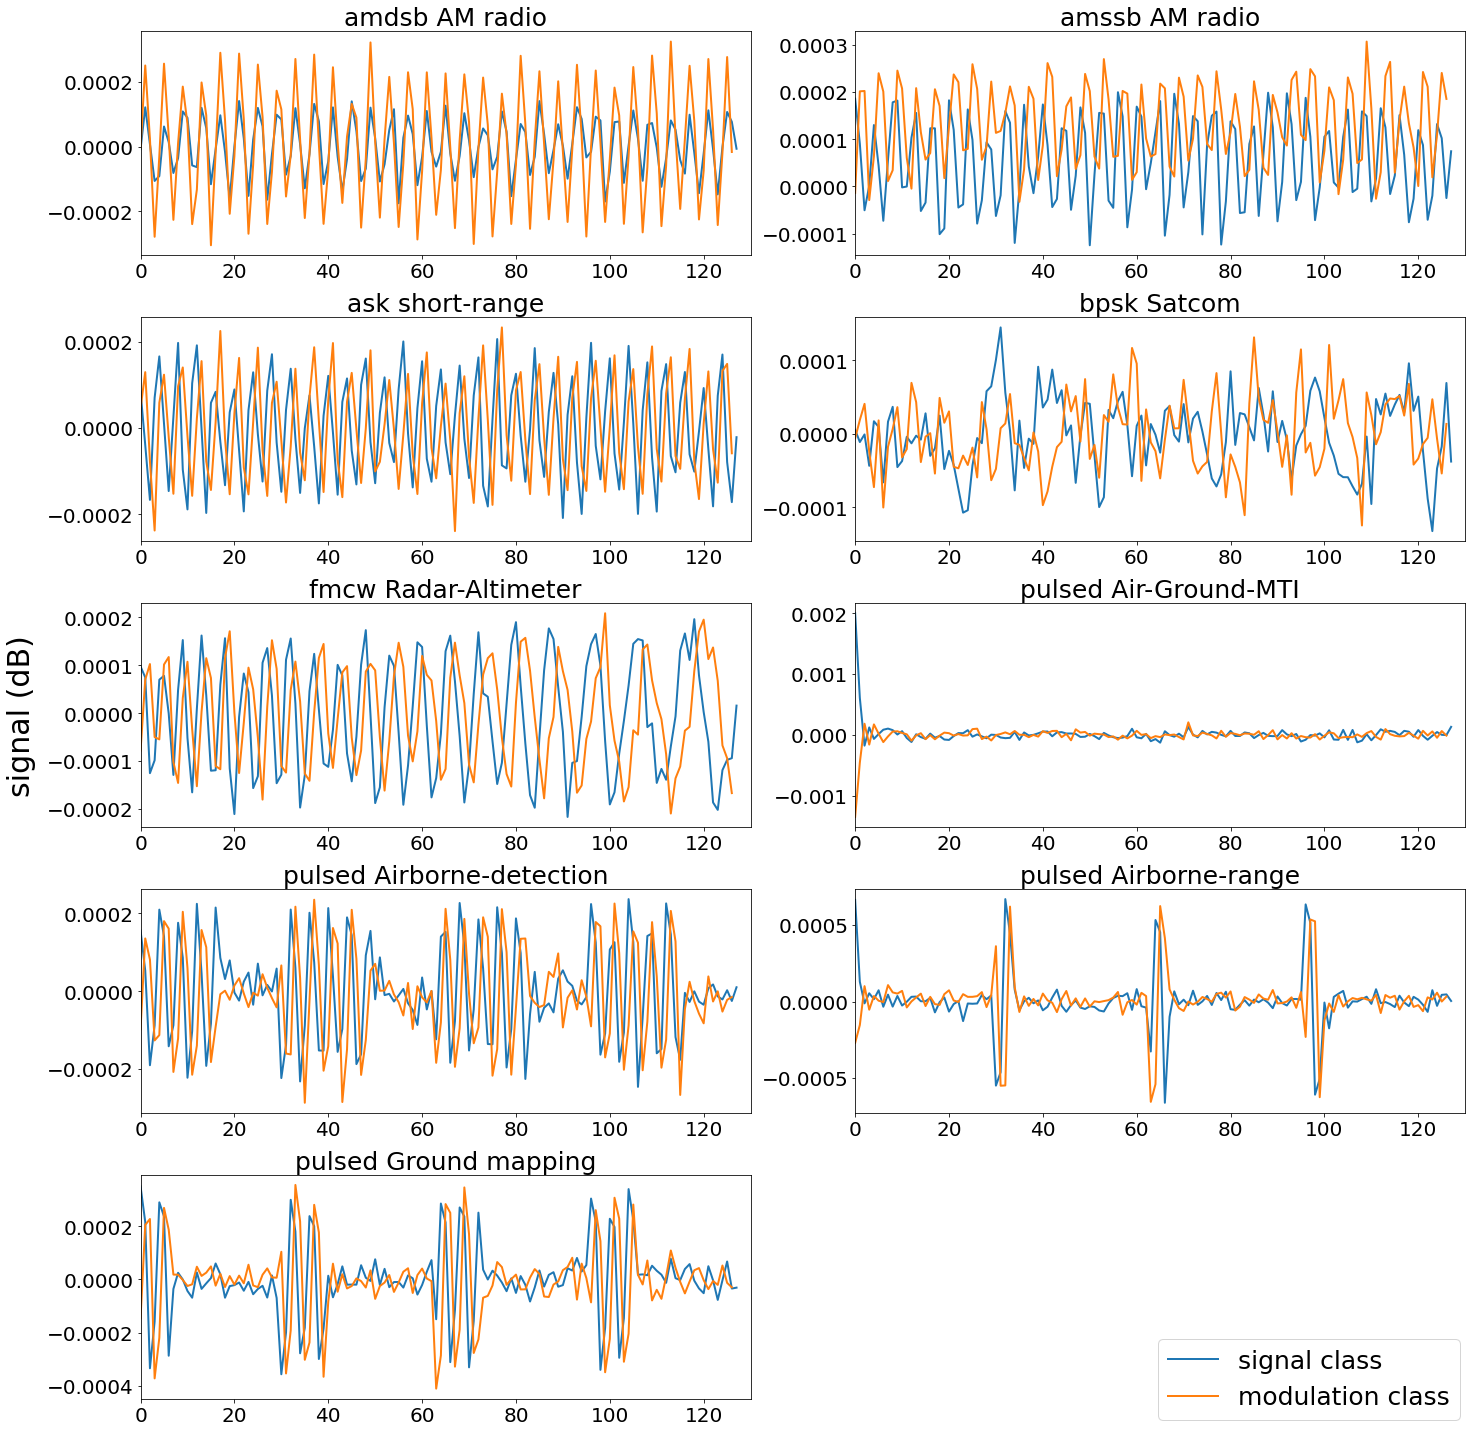

In [52]:
#see below for explanations

plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c=['amdsb AM radio','amssb AM radio','ask short-range','bpsk Satcom','fmcw Radar-Altimeter','pulsed Air-Ground-MTI',
   'pulsed Airborne-detection','pulsed Airborne-range','pulsed Ground mapping']
e=0

for i in range(9):
    if a < 2:
        axes[b,a].plot(trans1.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans1.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_title(c[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.02, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('mean.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [53]:
del final_df, trans, trans1

### Visualize samples by grouping waveforms and snr then calculating median

<font color='blue' size=3>Each waveform was grouped according to waveform type and snr to produce the subsequent plots. Each waveform is visualized from snr -4 through 18. The signal class is the blue trace and the modulation class is the orange trace on all plots.</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

final_df=pd.read_csv('./final_df.csv').iloc[:,1:]
final_df

waveform  snr  sample         0         1         2  \
0              amdsb  AM radio  -20       0  0.000124 -0.003148  0.000589   
1              amdsb  AM radio  -20       1  0.000243  0.005241  0.002270   
2              amdsb  AM radio  -20       2 -0.003233 -0.002000  0.006205   
3              amdsb  AM radio  -20       3 -0.008946 -0.001575  0.005534   
4              amdsb  AM radio  -20       4  0.005008  0.001750 -0.000259   
...                        ...  ...     ...       ...       ...       ...   
125356  pulsed  Ground mapping   18     695  0.000664  0.000570  0.020149   
125357  pulsed  Ground mapping   18     696 -0.000014 -0.017624  0.007411   
125358  pulsed  Ground mapping   18     697  0.000249 -0.001434  0.022765   
125359  pulsed  Ground mapping   18     698 -0.000447  0.006813  0.024152   
125360  pulsed  Ground mapping   18     699  0.000095  0.021630  0.014281   

               3         4         5         6  ...       246       247  \
0      -0.009289 -0.001816 -0.003500  0.003450  ...  0.000732  0.010682   
1      -0.001386 -0.002026 -0.005270  0.011141  ... -0.003863 -0.002518   
2      -0.000821  0.003488 -0.002431 -0.008256  ... -0.003632  0.003301   
3       0.010561  0.004172 -0.001303  0.001822  ...  0.000441  0.002733   
4      -0.008179 -0.007281  0.007556  0.003569  ... -0.006410  0.004558   
...          ...       ...       ...       ...  ...       ...       ...   
125356 -0.001224 -0.020974  0.002782  0.022702  ... -0.001341  0.000191   
125357  0.025022 -0.011352 -0.022362  0.010744  ...  0.000558 -0.000028   
125358  0.007392 -0.025753 -0.005688  0.024822  ...  0.000100 -0.000210   
125359 -0.003067 -0.026138  0.004179  0.025244  ...  0.000102 -0.000177   
125360 -0.022884 -0.012985  0.022035  0.012976  ... -0.000106 -0.000017   

             248       249       250       251       252       253       254  \
0      -0.011375  0.002663  0.003183 -0.007208 -0.001212  0.013849 -0.004273   
1       0.005271 -0.005481 -0.003317 -0.011191  0.018409  0.000417 -0.000381   
2       0.001471 -0.005509 -0.001511  0.002575  0.004473  0.003793  0.003305   
3       0.000815 -0.006229 -0.004532  0.006419 -0.006559 -0.006051 -0.004443   
4      -0.000311 -0.006566 -0.001344  0.005945 -0.010363 -0.000011  0.019072   
...          ...       ...       ...       ...       ...       ...       ...   
125356 -0.000589 -0.000040  0.001437  0.000453  0.000301  0.001484 -0.002604   
125357 -0.000383 -0.000011 -0.000210  0.000262  0.000205 -0.000293 -0.000139   
125358  0.000189 -0.000511  0.000329 -0.000297  0.000013  0.000155 -0.000191   
125359 -0.000104 -0.000802  0.000271 -0.000358  0.000176 -0.000219 -0.000532   
125360 -0.000121  0.000071 -0.000042 -0.000049  0.000084 -0.000167  0.000070   

             255  
0       0.009545  
1      -0.000687  
2      -0.002250  
3       0.000676  
4      -0.002903  
...          ...  
125356  0.001356  
125357 -0.000064  
125358  0.000381  
125359 -0.000652  
125360  0.000477  

[125361 rows x 259 columns]

In [2]:
final_df.drop(final_df.columns[[2]],axis=1,inplace=True)
final_df

waveform  snr         0         1         2         3  \
0              amdsb  AM radio  -20  0.000124 -0.003148  0.000589 -0.009289   
1              amdsb  AM radio  -20  0.000243  0.005241  0.002270 -0.001386   
2              amdsb  AM radio  -20 -0.003233 -0.002000  0.006205 -0.000821   
3              amdsb  AM radio  -20 -0.008946 -0.001575  0.005534  0.010561   
4              amdsb  AM radio  -20  0.005008  0.001750 -0.000259 -0.008179   
...                        ...  ...       ...       ...       ...       ...   
125356  pulsed  Ground mapping   18  0.000664  0.000570  0.020149 -0.001224   
125357  pulsed  Ground mapping   18 -0.000014 -0.017624  0.007411  0.025022   
125358  pulsed  Ground mapping   18  0.000249 -0.001434  0.022765  0.007392   
125359  pulsed  Ground mapping   18 -0.000447  0.006813  0.024152 -0.003067   
125360  pulsed  Ground mapping   18  0.000095  0.021630  0.014281 -0.022884   

               4         5         6         7  ...       246       247  \
0      -0.001816 -0.003500  0.003450 -0.010957  ...  0.000732  0.010682   
1      -0.002026 -0.005270  0.011141  0.000810  ... -0.003863 -0.002518   
2       0.003488 -0.002431 -0.008256 -0.004550  ... -0.003632  0.003301   
3       0.004172 -0.001303  0.001822  0.004376  ...  0.000441  0.002733   
4      -0.007281  0.007556  0.003569  0.015119  ... -0.006410  0.004558   
...          ...       ...       ...       ...  ...       ...       ...   
125356 -0.020974  0.002782  0.022702 -0.001737  ... -0.001341  0.000191   
125357 -0.011352 -0.022362  0.010744  0.022500  ...  0.000558 -0.000028   
125358 -0.025753 -0.005688  0.024822  0.005781  ...  0.000100 -0.000210   
125359 -0.026138  0.004179  0.025244 -0.003675  ...  0.000102 -0.000177   
125360 -0.012985  0.022035  0.012976 -0.022248  ... -0.000106 -0.000017   

             248       249       250       251       252       253       254  \
0      -0.011375  0.002663  0.003183 -0.007208 -0.001212  0.013849 -0.004273   
1       0.005271 -0.005481 -0.003317 -0.011191  0.018409  0.000417 -0.000381   
2       0.001471 -0.005509 -0.001511  0.002575  0.004473  0.003793  0.003305   
3       0.000815 -0.006229 -0.004532  0.006419 -0.006559 -0.006051 -0.004443   
4      -0.000311 -0.006566 -0.001344  0.005945 -0.010363 -0.000011  0.019072   
...          ...       ...       ...       ...       ...       ...       ...   
125356 -0.000589 -0.000040  0.001437  0.000453  0.000301  0.001484 -0.002604   
125357 -0.000383 -0.000011 -0.000210  0.000262  0.000205 -0.000293 -0.000139   
125358  0.000189 -0.000511  0.000329 -0.000297  0.000013  0.000155 -0.000191   
125359 -0.000104 -0.000802  0.000271 -0.000358  0.000176 -0.000219 -0.000532   
125360 -0.000121  0.000071 -0.000042 -0.000049  0.000084 -0.000167  0.000070   

             255  
0       0.009545  
1      -0.000687  
2      -0.002250  
3       0.000676  
4      -0.002903  
...          ...  
125356  0.001356  
125357 -0.000064  
125358  0.000381  
125359 -0.000652  
125360  0.000477  

[125361 rows x 258 columns]

In [3]:
trans=final_df.groupby(['waveform','snr']).median().T
trans

waveform amdsb  AM radio                                                    \
snr                  -20       -18       -16       -14       -12       -10   
0               0.000154  0.000091 -0.000072  0.000129 -0.000109  0.000301   
1               0.000313  0.000487 -0.000380 -0.000063  0.000010  0.000245   
2              -0.000018 -0.000033  0.000116 -0.000207  0.000688  0.000078   
3               0.000243  0.000059  0.000007  0.000357 -0.000628 -0.000317   
4               0.000267 -0.000289 -0.000254  0.000095  0.000022 -0.000305   
..                   ...       ...       ...       ...       ...       ...   
251            -0.000106  0.000547  0.000335 -0.000261  0.000632  0.000097   
252             0.000383 -0.000380 -0.000520  0.000045 -0.000281  0.000109   
253            -0.000056 -0.000430  0.000130 -0.000073  0.000053 -0.000086   
254            -0.000167 -0.000095 -0.000127  0.000501  0.000235 -0.000212   
255             0.000052 -0.000541 -0.000349  0.000006 -0.000035 -0.000109   

waveform                                          ... pulsed  Ground mapping  \
snr            -8        -6        -4        -2   ...                     0    
0        -0.000642 -0.000213 -0.000181 -0.000068  ...               0.000041   
1        -0.000250 -0.000333 -0.000158 -0.000052  ...               0.000844   
2        -0.000546  0.000032  0.000009  0.000515  ...               0.000261   
3         0.000290 -0.000322  0.000355  0.000132  ...              -0.000897   
4        -0.000011 -0.000055 -0.000507  0.000204  ...               0.000095   
..             ...       ...       ...       ...  ...                    ...   
251      -0.000507  0.000322 -0.000238  0.000139  ...               0.000180   
252      -0.000218 -0.000081 -0.000258 -0.000382  ...              -0.000072   
253       0.000214 -0.000313  0.000275  0.000254  ...               0.000118   
254       0.000445  0.000115  0.000229  0.000298  ...              -0.000123   
255      -0.000180 -0.000311  0.000022  0.000289  ...              -0.000268   

waveform                                                              \
snr             2         4         6         8         10        12   
0        -0.000128  0.000309  0.000039 -0.000075 -0.000042  0.000034   
1         0.000748  0.001174  0.000631  0.001390  0.001358  0.001458   
2         0.000853  0.000777  0.000476  0.000523  0.000302  0.000315   
3        -0.000672 -0.000526 -0.000030 -0.000867 -0.001133 -0.000787   
4        -0.000388  0.000037  0.000065 -0.000289 -0.000995 -0.000361   
..             ...       ...       ...       ...       ...       ...   
251       0.000166 -0.000095  0.000084  0.000005 -0.000003 -0.000010   
252      -0.000025 -0.000224 -0.000099 -0.000009  0.000057  0.000020   
253       0.000169 -0.000099 -0.000042  0.000029  0.000041  0.000038   
254       0.000075 -0.000035 -0.000114 -0.000022  0.000030 -0.000032   
255       0.000009  0.000341 -0.000046 -0.000076  0.000011 -0.000002   

waveform                                    
snr             14            16        18  
0         0.000013  2.353073e-05 -0.000008  
1         0.001331  1.298310e-03  0.001380  
2         0.000470  5.840079e-04  0.000460  
3        -0.001149 -1.124847e-03 -0.001095  
4        -0.000694 -4.972949e-04 -0.000602  
..             ...           ...       ...  
251      -0.000040 -1.488793e-05 -0.000010  
252       0.000001 -5.209466e-07 -0.000008  
253      -0.000025 -9.295968e-06 -0.000005  
254      -0.000019  1.294239e-05 -0.000031  
255      -0.000036  1.240367e-05 -0.000005  

[256 rows x 180 columns]

<Figure size 1440x1440 with 0 Axes>

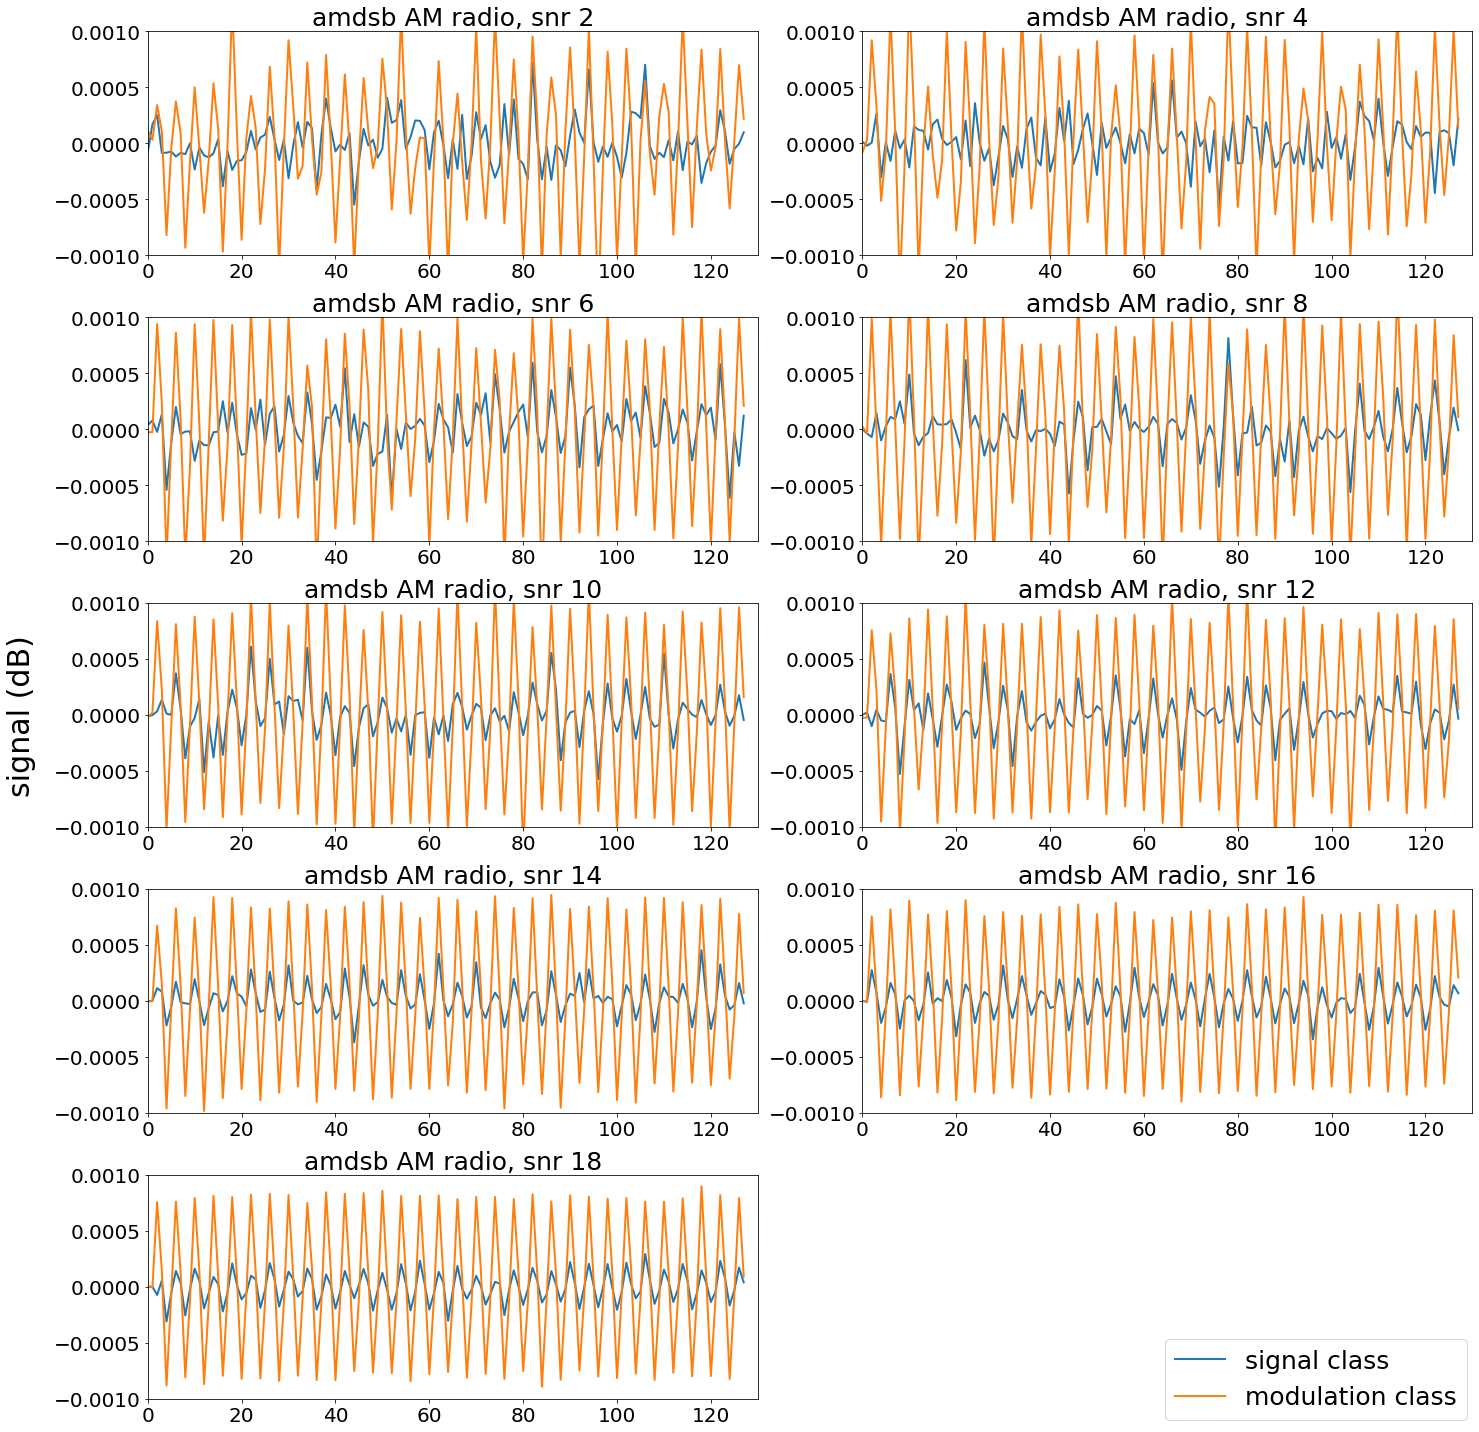

In [19]:
#plots the amdsb AM radio data
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='amdsb AM radio'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(11,20):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0010, top=0.0010)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('amdsb_AM_radio.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

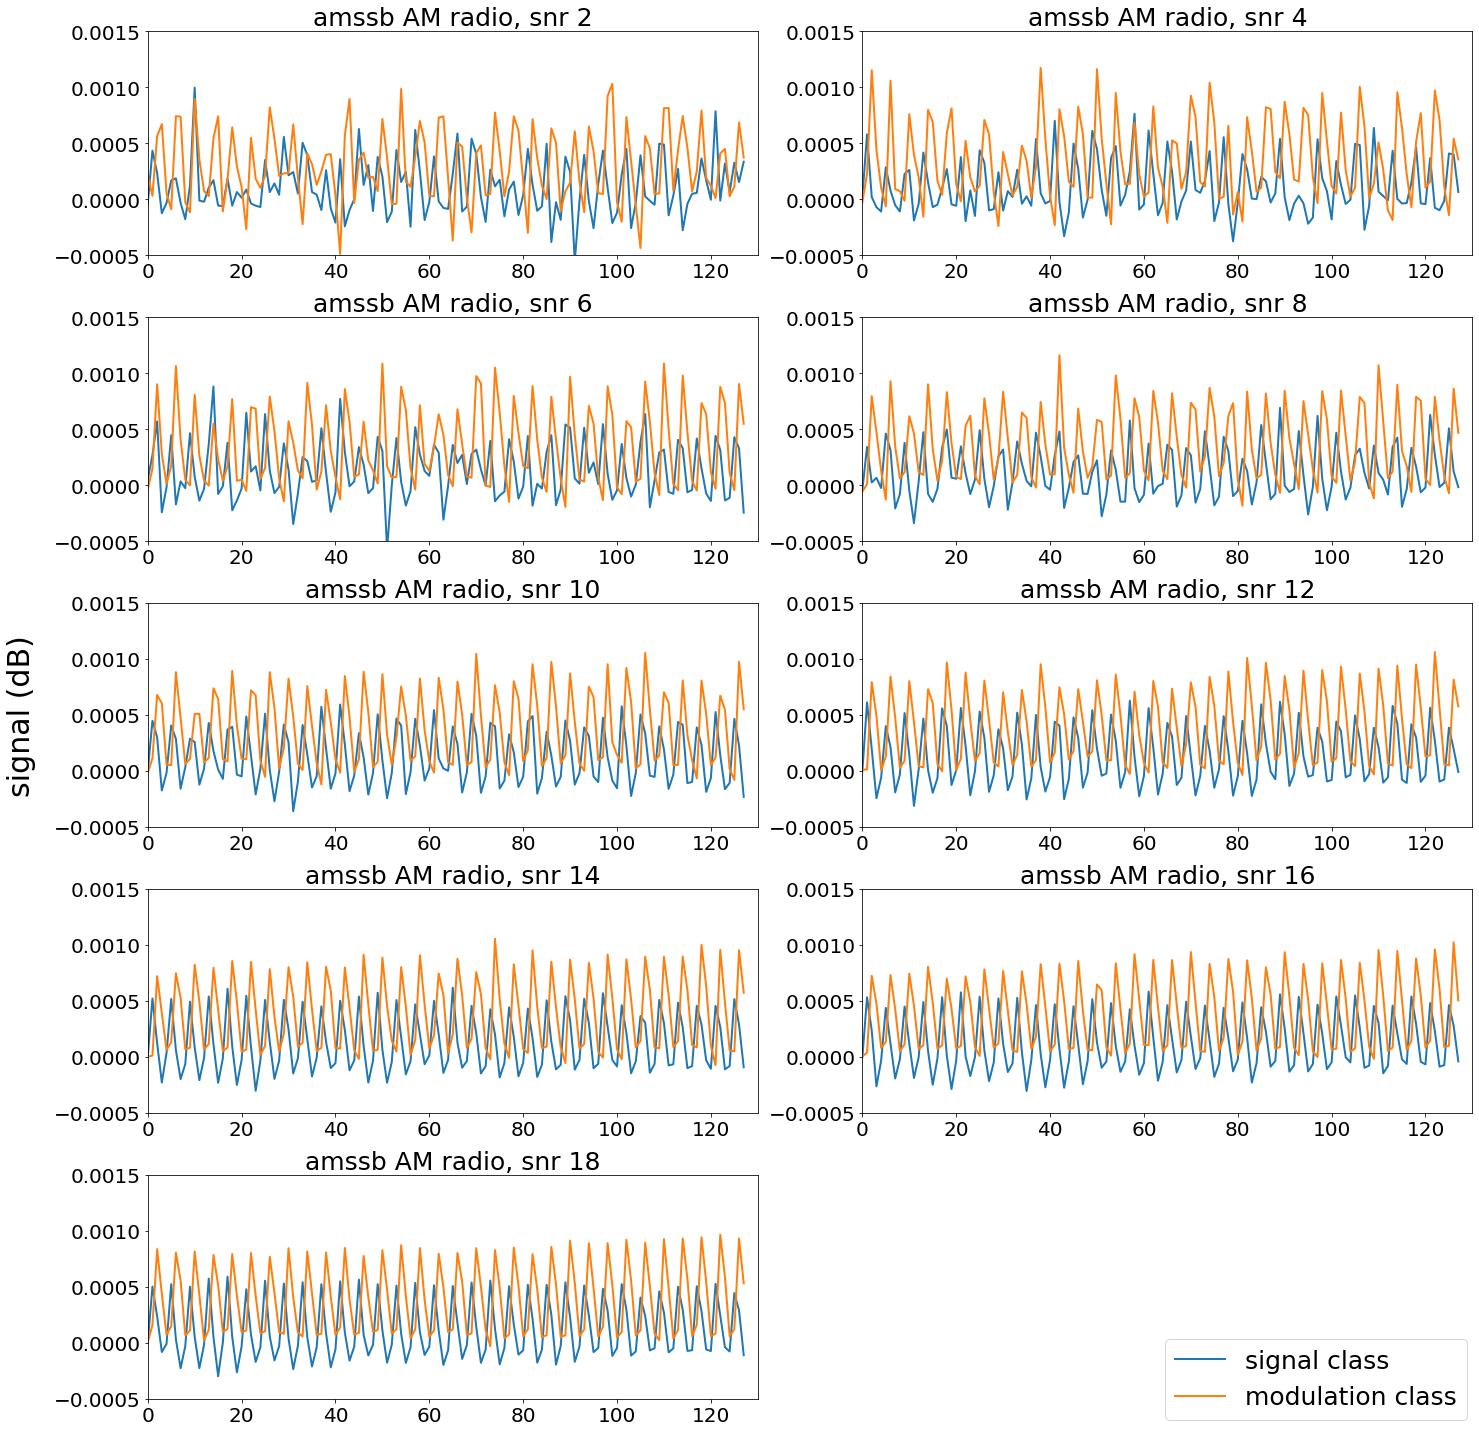

In [21]:
#plots the amssb AM radio data
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='amssb AM radio'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(31,40):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0005, top=0.0015)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('amssb_AM_radio.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

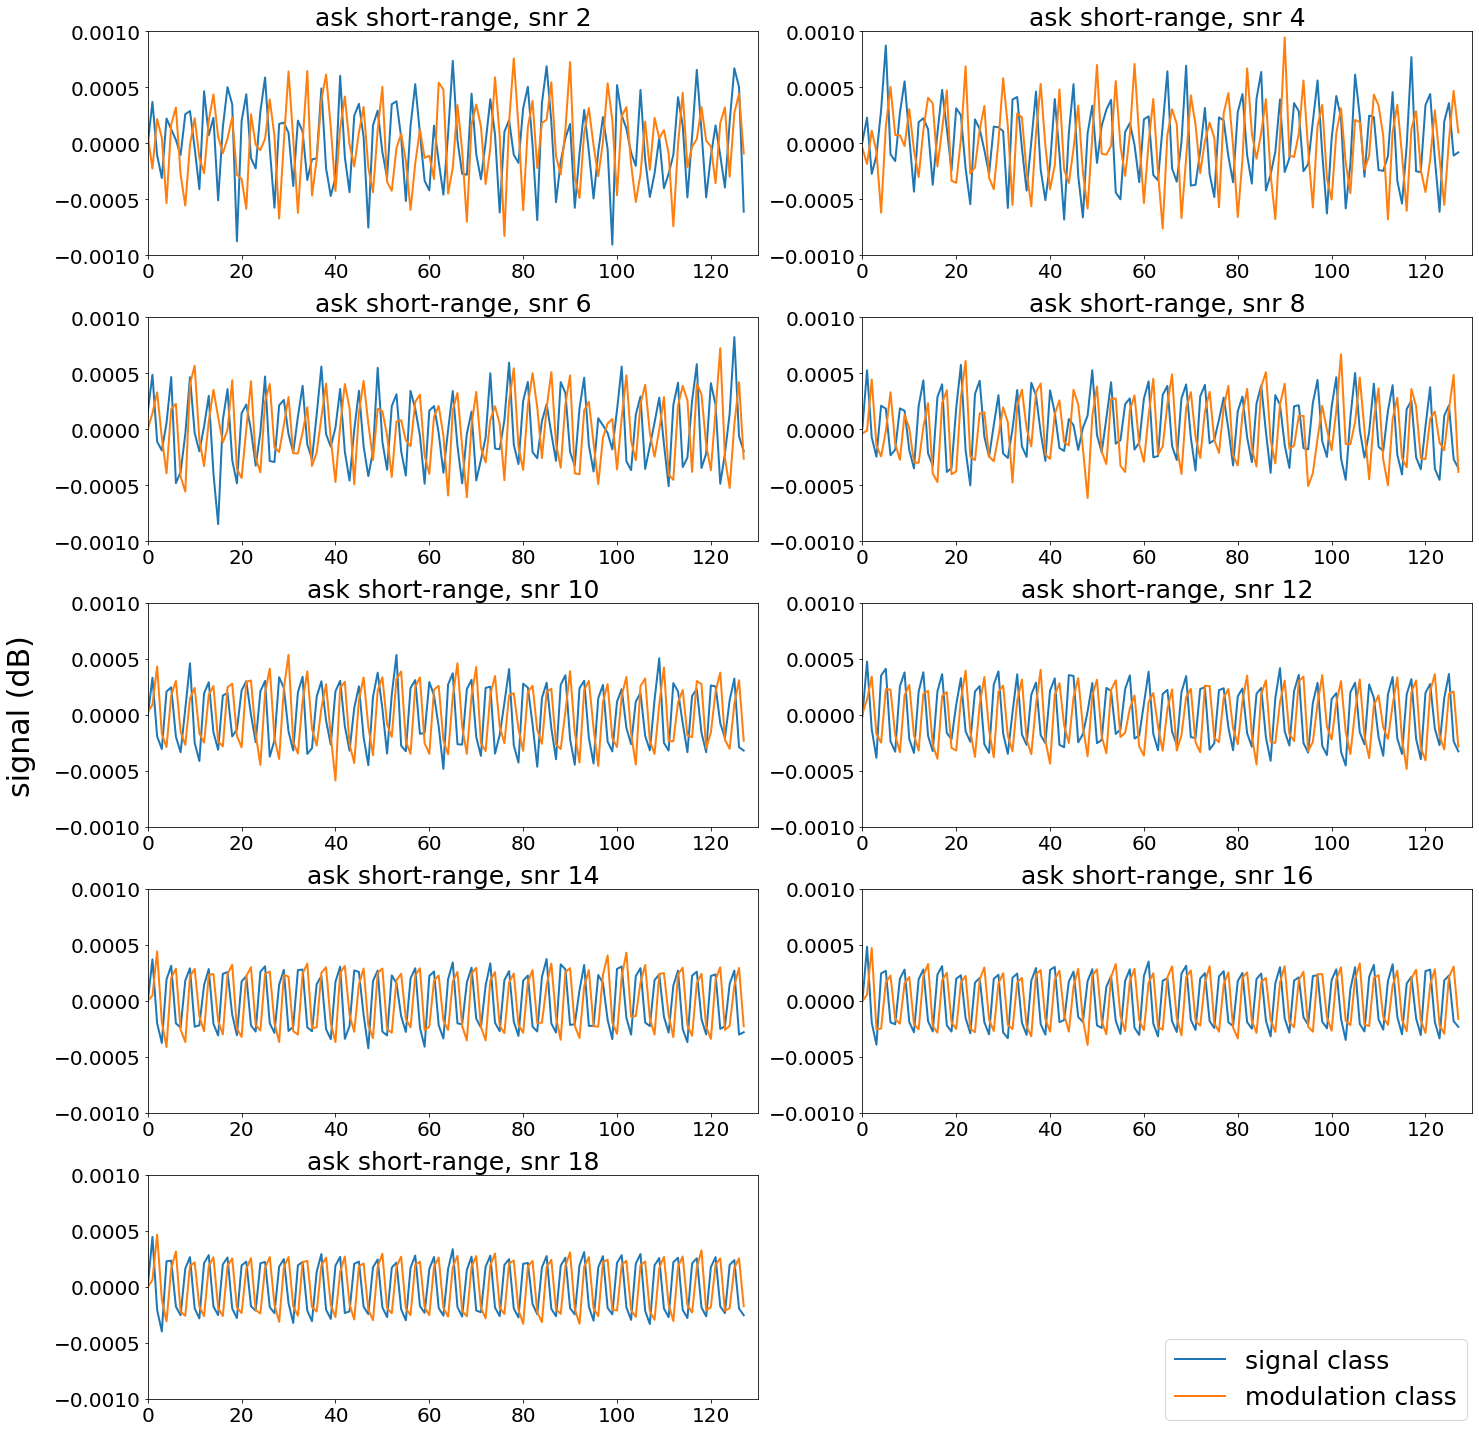

In [24]:
#plots the ask short-range
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='ask short-range'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(51,60):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0010, top=0.0010)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('ask_short-range.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

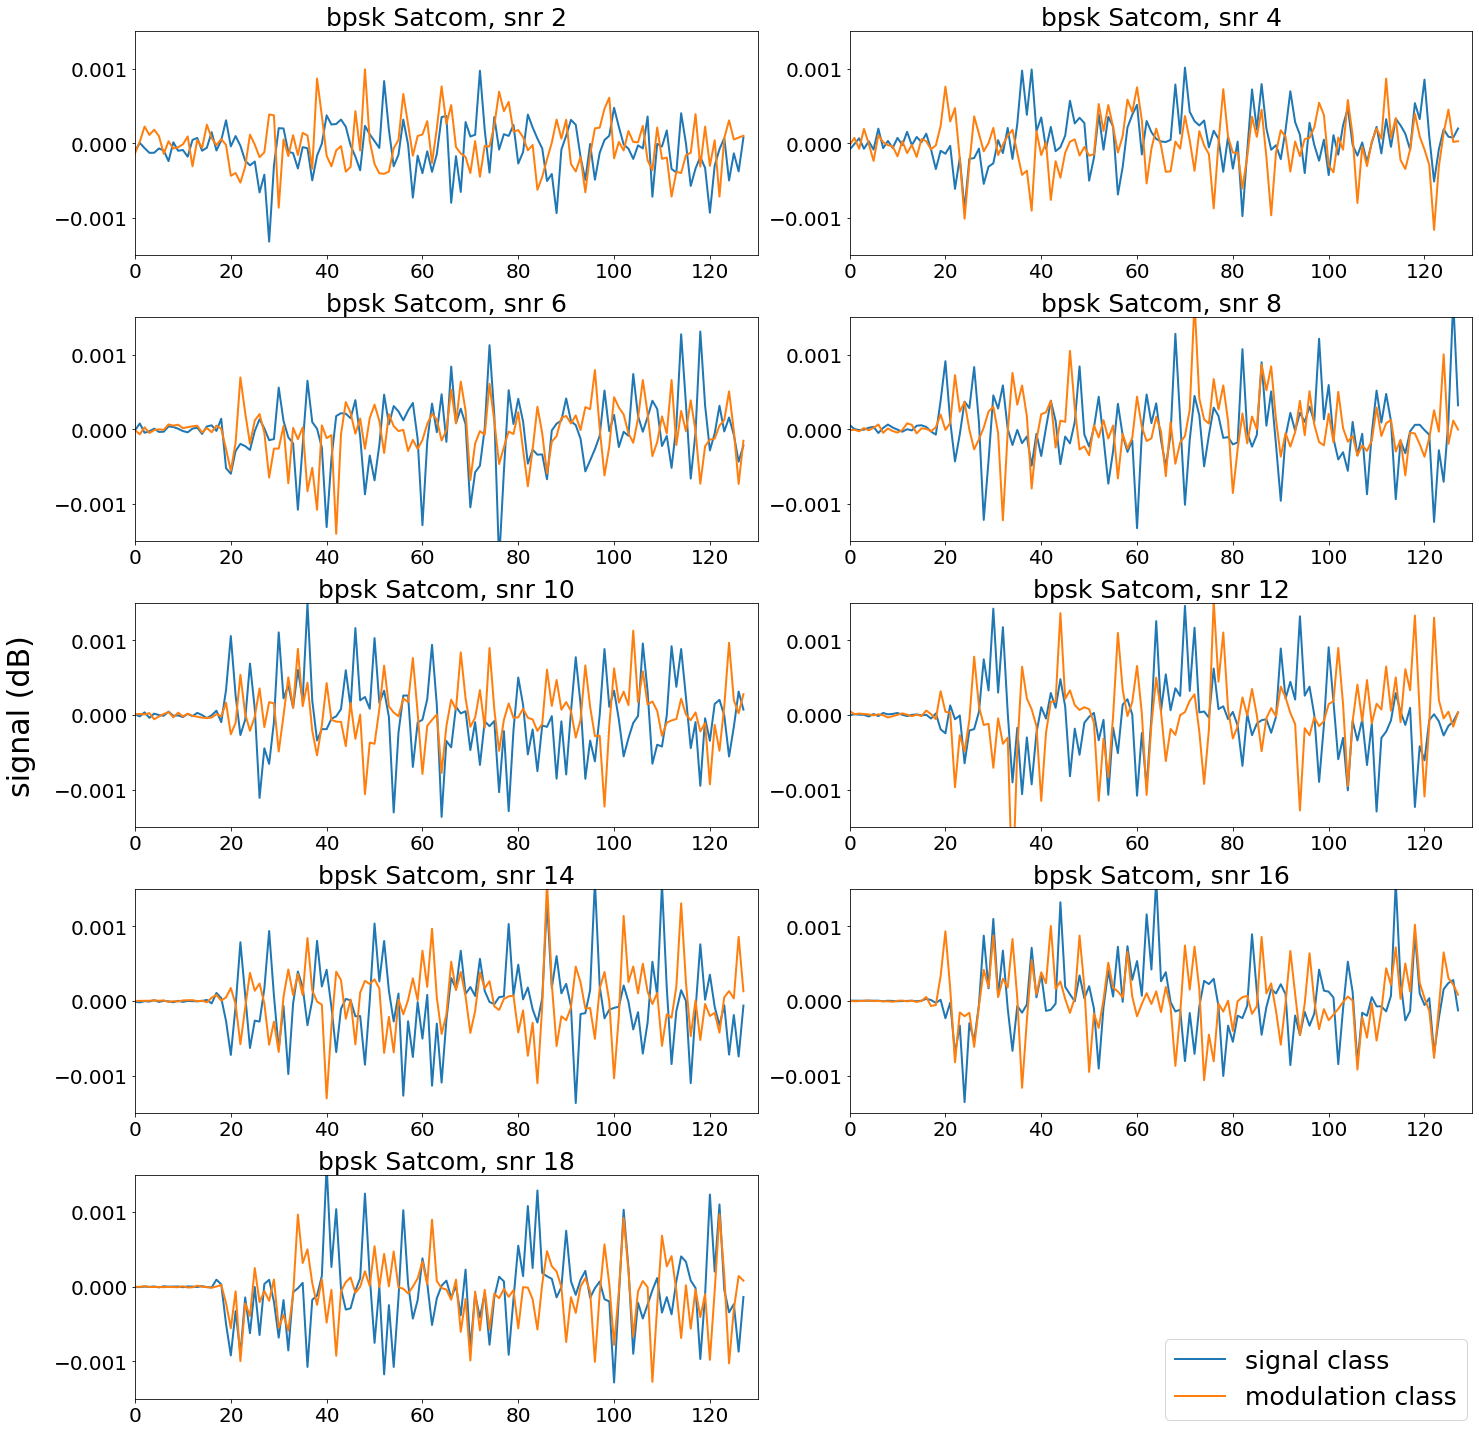

In [26]:
#plots the bpsk Satcom
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='bpsk Satcom'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(71,80):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0015, top=0.0015)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('bpsk_Satcom.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

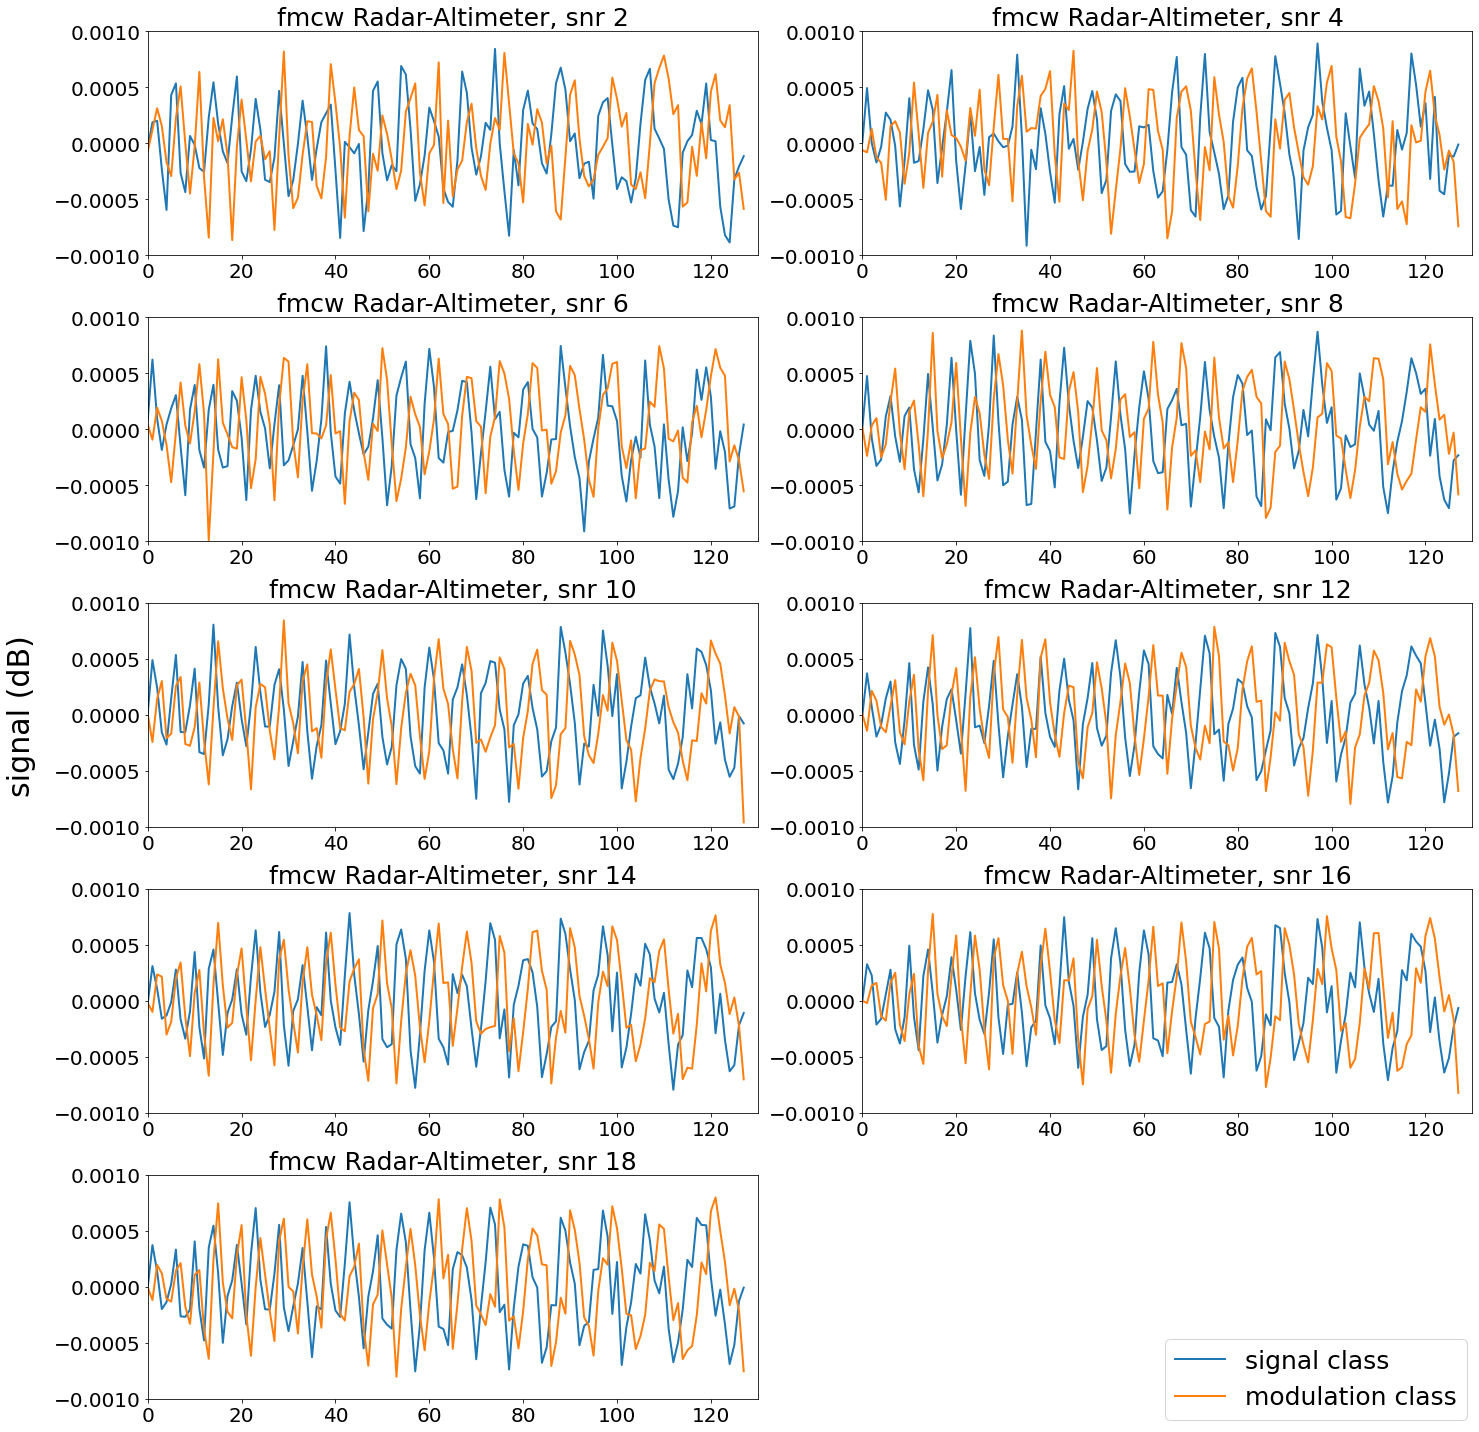

In [28]:
#plots the fmcw Radar-Altimeter
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='fmcw Radar-Altimeter'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(91,100):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.001, top=0.001)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('fmcw_Radar-Altimeter.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

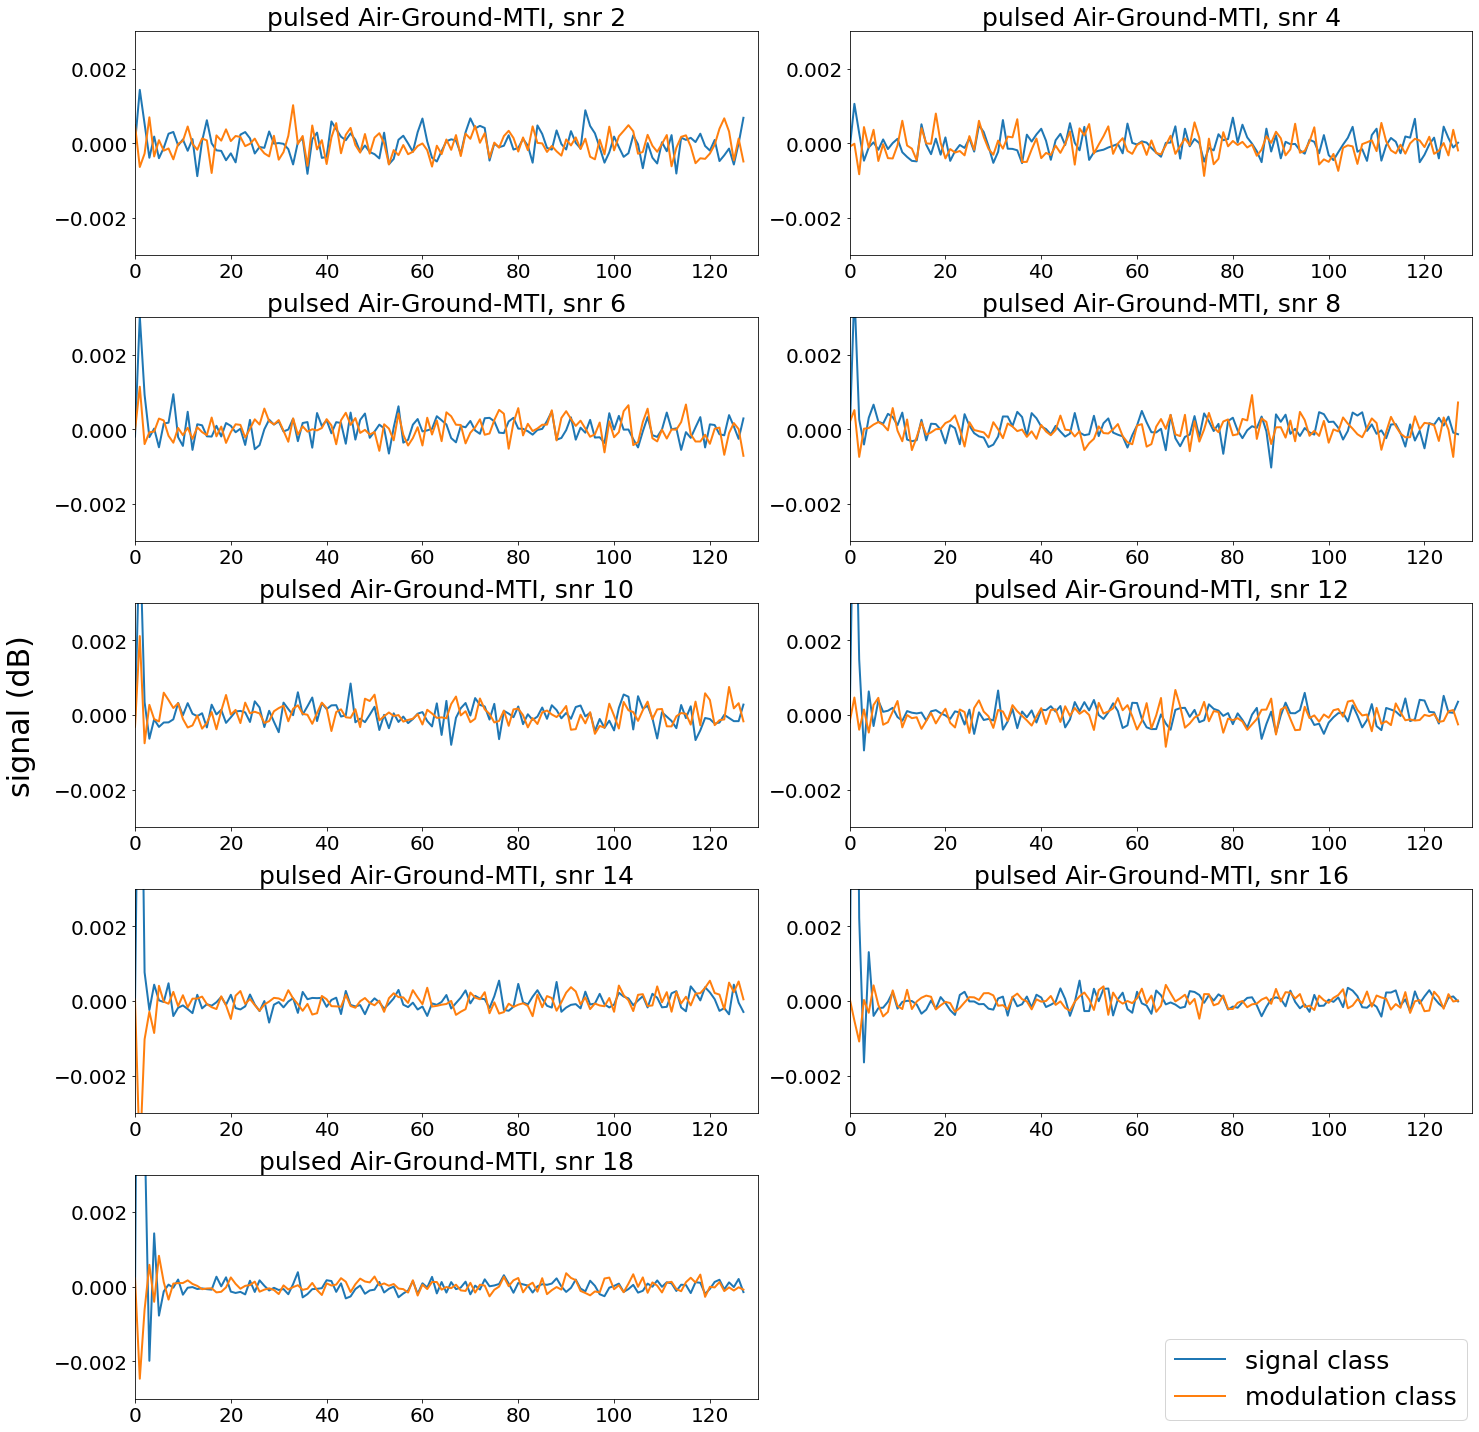

In [30]:
#plots the pulsed Air-Ground-MTI
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='pulsed Air-Ground-MTI'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(111,120):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.003, top=0.003)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('pulsed_Air-Ground-MTI.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

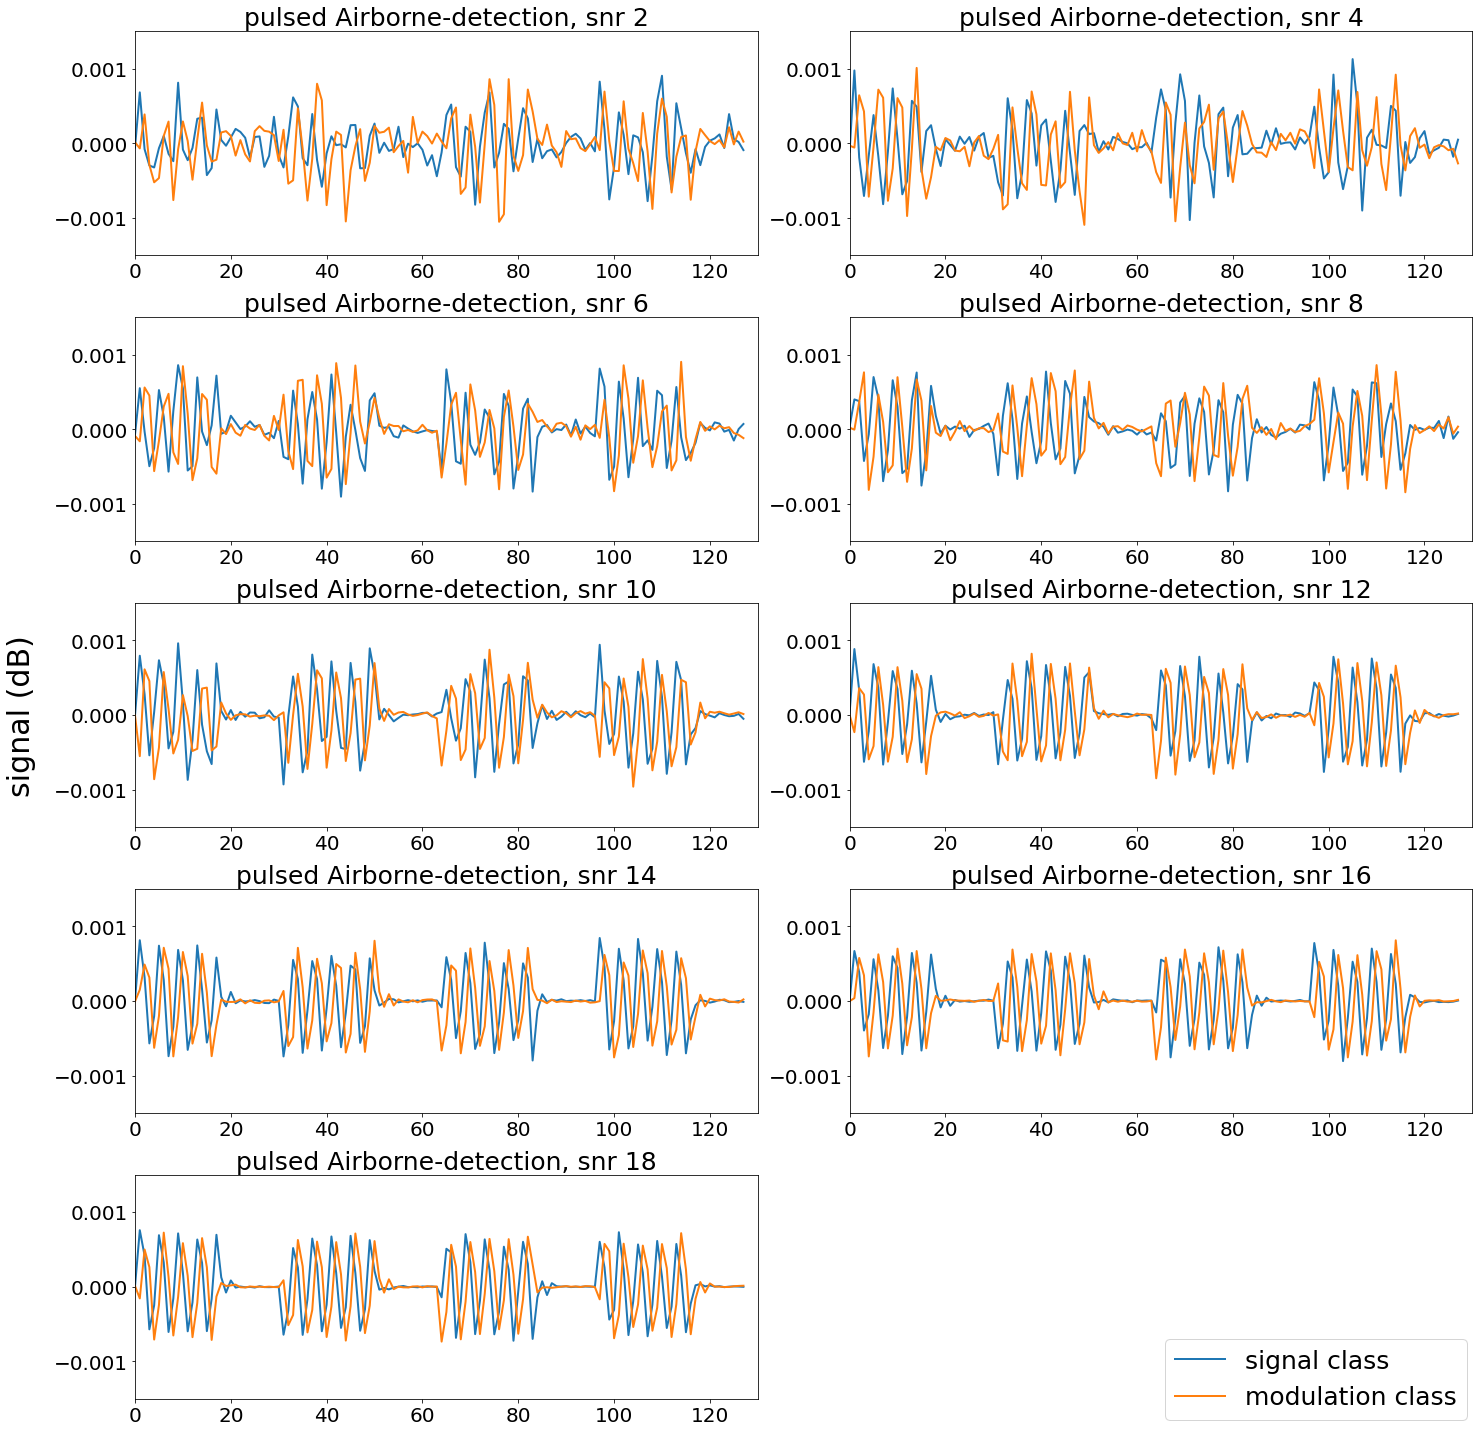

In [32]:
#plots the pulsed Airborne-detection
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='pulsed Airborne-detection'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(131,140):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0015, top=0.0015)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('pulsed_Airborne-detection.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

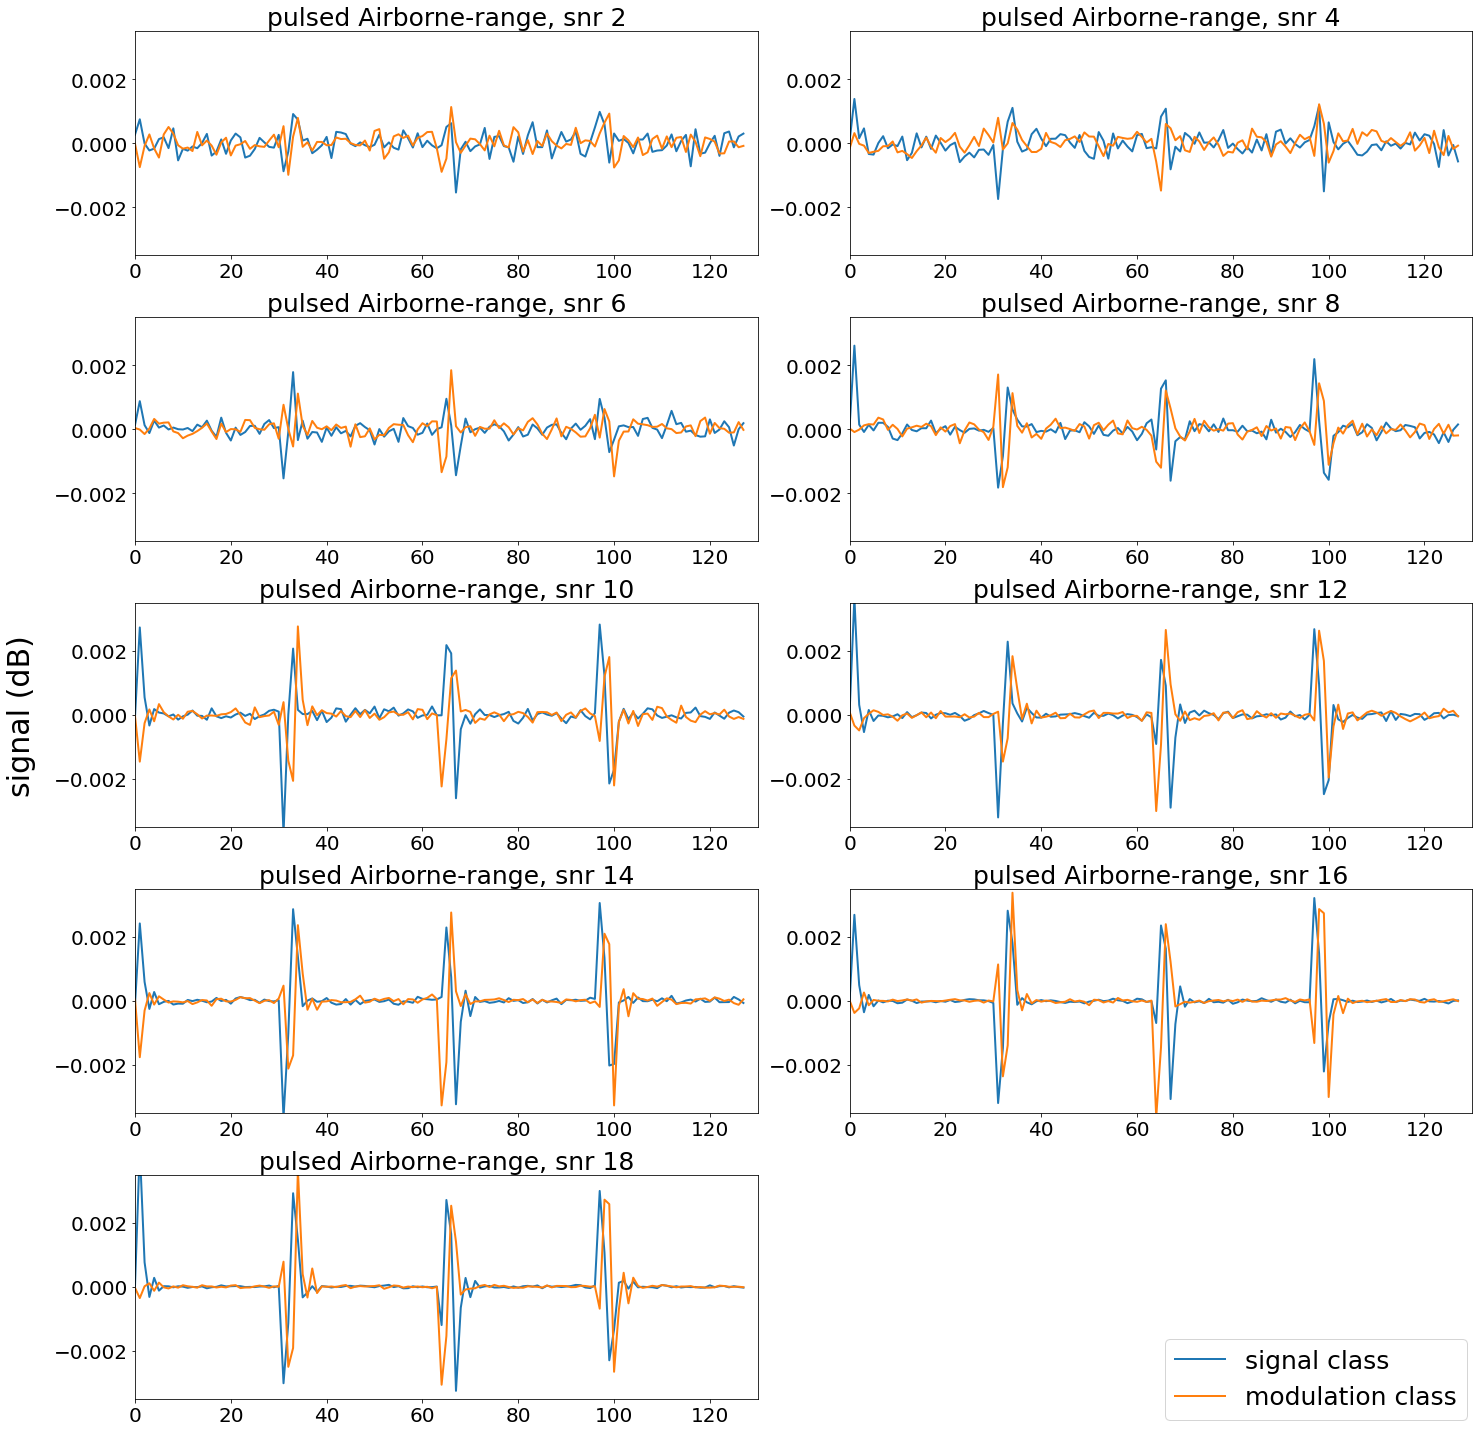

In [34]:
#plots the pulsed Airborne-range
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='pulsed Airborne-range'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(151,160):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0035, top=0.0035)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('pulsed_Airborne-range.png',facecolor='w',bbox_inches='tight',dpi='figure')

<Figure size 1440x1440 with 0 Axes>

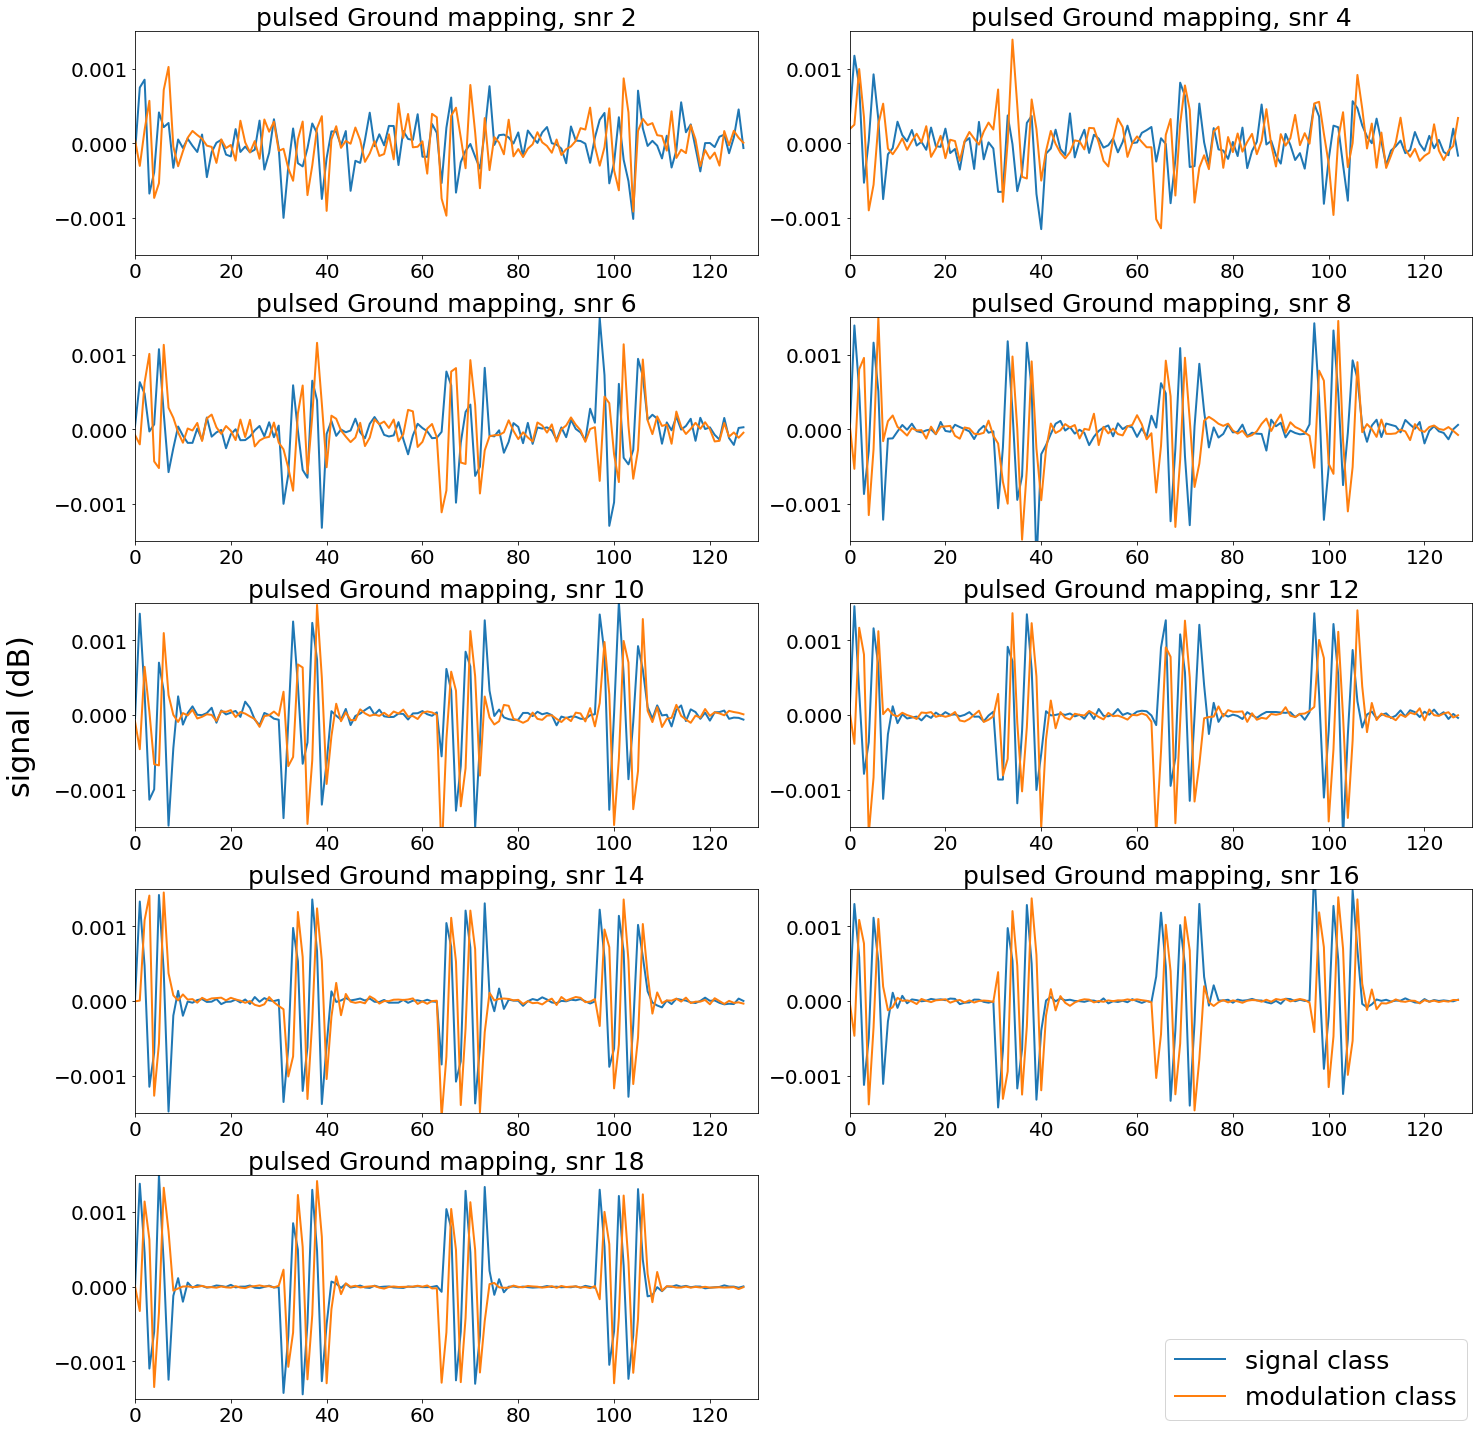

In [36]:
#plots the pulsed Ground mapping
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c='pulsed Ground mapping'
d=['2','4','6','8','10','12','14','16','18']
e=0

for i in range(171,180):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_ylim(bottom=-0.0015, top=0.0015)
        axes[b,a].set_title(c + ', snr ' + d[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('pulsed_Ground mapping.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [37]:
del trans, final_df

### Prepare data for preliminary modeling

<font color='blue' size=3>Because computational resources are limited, the waveform dataset was split according to the snr and saved as separate files. For the modeling step, each file will need to be imported and trained.</font>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
final_df=pd.read_csv('./final_dfSub.csv').iloc[:,1:]
final_df1=final_df.drop(['sample'],axis=1)
final_df1

waveform  snr         0         1         2         3  \
0              amdsb  AM radio  -20  0.000124 -0.003148  0.000589 -0.009289   
1              amdsb  AM radio  -20  0.000243  0.005241  0.002270 -0.001386   
2              amdsb  AM radio  -20 -0.003233 -0.002000  0.006205 -0.000821   
3              amdsb  AM radio  -20 -0.008946 -0.001575  0.005534  0.010561   
4              amdsb  AM radio  -20  0.005008  0.001750 -0.000259 -0.008179   
...                        ...  ...       ...       ...       ...       ...   
125356  pulsed  Ground mapping   18  0.000664  0.000570  0.020149 -0.001224   
125357  pulsed  Ground mapping   18 -0.000014 -0.017624  0.007411  0.025022   
125358  pulsed  Ground mapping   18  0.000249 -0.001434  0.022765  0.007392   
125359  pulsed  Ground mapping   18 -0.000447  0.006813  0.024152 -0.003067   
125360  pulsed  Ground mapping   18  0.000095  0.021630  0.014281 -0.022884   

               4         5         6         7  ...       246       247  \
0      -0.001816 -0.003500  0.003450 -0.010957  ...  0.000732  0.010682   
1      -0.002026 -0.005270  0.011141  0.000810  ... -0.003863 -0.002518   
2       0.003488 -0.002431 -0.008256 -0.004550  ... -0.003632  0.003301   
3       0.004172 -0.001303  0.001822  0.004376  ...  0.000441  0.002733   
4      -0.007281  0.007556  0.003569  0.015119  ... -0.006410  0.004558   
...          ...       ...       ...       ...  ...       ...       ...   
125356 -0.020974  0.002782  0.022702 -0.001737  ... -0.001341  0.000191   
125357 -0.011352 -0.022362  0.010744  0.022500  ...  0.000558 -0.000028   
125358 -0.025753 -0.005688  0.024822  0.005781  ...  0.000100 -0.000210   
125359 -0.026138  0.004179  0.025244 -0.003675  ...  0.000102 -0.000177   
125360 -0.012985  0.022035  0.012976 -0.022248  ... -0.000106 -0.000017   

             248       249       250       251       252       253       254  \
0      -0.011375  0.002663  0.003183 -0.007208 -0.001212  0.013849 -0.004273   
1       0.005271 -0.005481 -0.003317 -0.011191  0.018409  0.000417 -0.000381   
2       0.001471 -0.005509 -0.001511  0.002575  0.004473  0.003793  0.003305   
3       0.000815 -0.006229 -0.004532  0.006419 -0.006559 -0.006051 -0.004443   
4      -0.000311 -0.006566 -0.001344  0.005945 -0.010363 -0.000011  0.019072   
...          ...       ...       ...       ...       ...       ...       ...   
125356 -0.000589 -0.000040  0.001437  0.000453  0.000301  0.001484 -0.002604   
125357 -0.000383 -0.000011 -0.000210  0.000262  0.000205 -0.000293 -0.000139   
125358  0.000189 -0.000511  0.000329 -0.000297  0.000013  0.000155 -0.000191   
125359 -0.000104 -0.000802  0.000271 -0.000358  0.000176 -0.000219 -0.000532   
125360 -0.000121  0.000071 -0.000042 -0.000049  0.000084 -0.000167  0.000070   

             255  
0       0.009545  
1      -0.000687  
2      -0.002250  
3       0.000676  
4      -0.002903  
...          ...  
125356  0.001356  
125357 -0.000064  
125358  0.000381  
125359 -0.000652  
125360  0.000477  

[125361 rows x 258 columns]

In [40]:
final_df1=final_df1.loc[final_df1['snr'] == 10].reset_index(drop=True)
final_df1.drop(['snr'],axis=1,inplace=True)
final_df1

waveform         0         1         2         3  \
0            amdsb  AM radio  0.000254 -0.000128  0.008655  0.001184   
1            amdsb  AM radio  0.000423  0.000415 -0.001791  0.001353   
2            amdsb  AM radio -0.000626  0.001013 -0.010696 -0.003122   
3            amdsb  AM radio  0.000281  0.000782 -0.001081 -0.001082   
4            amdsb  AM radio  0.000212 -0.000456  0.012223  0.003293   
...                      ...       ...       ...       ...       ...   
6270  pulsed  Ground mapping -0.004225  0.001115  0.015939  0.004905   
6271  pulsed  Ground mapping -0.002320 -0.015127  0.005359  0.023317   
6272  pulsed  Ground mapping -0.000326 -0.001200  0.020210  0.004656   
6273  pulsed  Ground mapping -0.002570  0.005753  0.018205 -0.001064   
6274  pulsed  Ground mapping -0.000788  0.019321  0.012453 -0.021033   

             4         5         6         7         8  ...       246  \
0    -0.009023 -0.000470  0.008956  0.001149 -0.008987  ...  0.010830   
1     0.000896 -0.000546 -0.001433  0.001019  0.000371  ...  0.013285   
2     0.012335  0.002744 -0.011528 -0.002369  0.011243  ...  0.006484   
3     0.001972  0.001294 -0.001477 -0.001243  0.002237  ...  0.012980   
4    -0.012436 -0.002405  0.012364  0.002104 -0.012686  ...  0.003697   
...        ...       ...       ...       ...       ...  ...       ...   
6270 -0.016448  0.002287  0.013906 -0.005412 -0.001965  ...  0.005896   
6271 -0.010022 -0.019019  0.008082  0.019719  0.002921  ...  0.000772   
6272 -0.023900 -0.000482  0.022743  0.008326  0.000618  ...  0.000719   
6273 -0.022883  0.001983  0.022015 -0.002624 -0.000099  ...  0.000709   
6274 -0.012490  0.019074  0.010733 -0.021005 -0.005497  ...  0.000204   

           247       248       249       250       251       252       253  \
0     0.001501 -0.010662 -0.001741  0.010230  0.001590 -0.010009 -0.001508   
1     0.002484 -0.012833 -0.001862  0.012807  0.002640 -0.012426 -0.002802   
2     0.000473 -0.006828 -0.000953  0.005785  0.000582 -0.006227  0.000079   
3     0.002756 -0.012220 -0.002792  0.013004  0.002332 -0.012067 -0.002187   
4     0.000084 -0.003544 -0.000339  0.004055  0.000710 -0.003806 -0.000268   
...        ...       ...       ...       ...       ...       ...       ...   
6270 -0.004176  0.007656 -0.000186  0.000294 -0.004786 -0.003099  0.000811   
6271  0.001706  0.003057  0.000584  0.001052 -0.000714 -0.002461  0.000191   
6272 -0.003256 -0.000929 -0.001344 -0.001594  0.000476 -0.000863 -0.001123   
6273  0.001349  0.000013 -0.000714 -0.002066  0.000027 -0.002041 -0.000747   
6274  0.000376  0.000783  0.001538  0.000734 -0.001019  0.000495  0.001383   

           254       255  
0     0.010470  0.001423  
1     0.013663  0.002474  
2     0.007117  0.000658  
3     0.012750  0.003727  
4     0.004137  0.000426  
...        ...       ...  
6270 -0.003333  0.000032  
6271  0.000227 -0.001242  
6272 -0.000906 -0.002523  
6273  0.001396  0.000505  
6274 -0.002504  0.000412  

[6275 rows x 257 columns]

In [41]:
trans=final_df1.groupby(['waveform']).median().T
trans

waveform  amdsb  AM radio  amssb  AM radio  ask  short-range  bpsk  Satcom  \
0           -1.262510e-05         0.000001         -0.000013      0.000009   
1           -1.559812e-08         0.000449          0.000333     -0.000018   
2            3.402171e-05         0.000302         -0.000190      0.000037   
3            1.372998e-04        -0.000173         -0.000303     -0.000037   
4            1.355599e-05        -0.000016          0.000210      0.000019   
..                    ...              ...               ...           ...   
251          1.063037e-04         0.000547         -0.000220      0.000119   
252         -1.037569e-03         0.000020         -0.000302      0.000969   
253         -6.924513e-05        -0.000079          0.000100      0.000198   
254          9.621488e-04         0.000976          0.000311      0.000025   
255          1.604127e-04         0.000552         -0.000229      0.000279   

waveform  fmcw  Radar-Altimeter  pulsed  Air-Ground-MTI  \
0                      0.000023               -0.000121   
1                      0.000491                0.004964   
2                      0.000245                0.000350   
3                     -0.000156               -0.000632   
4                     -0.000263               -0.000112   
..                          ...                     ...   
251                    0.000176               -0.000116   
252                   -0.000164                0.000755   
253                    0.000071                0.000180   
254                   -0.000013                0.000319   
255                   -0.000957               -0.000167   

waveform  pulsed  Airborne-detection  pulsed  Airborne-range  \
0                          -0.000006               -0.000056   
1                           0.000795                0.002739   
2                           0.000279                0.000554   
3                          -0.000539               -0.000326   
4                           0.000041                0.000188   
..                               ...                     ...   
251                         0.000025                0.000169   
252                         0.000006               -0.000043   
253                         0.000021               -0.000120   
254                         0.000038               -0.000060   
255                         0.000014               -0.000119   

waveform  pulsed  Ground mapping  
0                      -0.000042  
1                       0.001358  
2                       0.000302  
3                      -0.001133  
4                      -0.000995  
..                           ...  
251                    -0.000003  
252                     0.000057  
253                     0.000041  
254                     0.000030  
255                     0.000011  

[256 rows x 9 columns]

<Figure size 1440x1440 with 0 Axes>

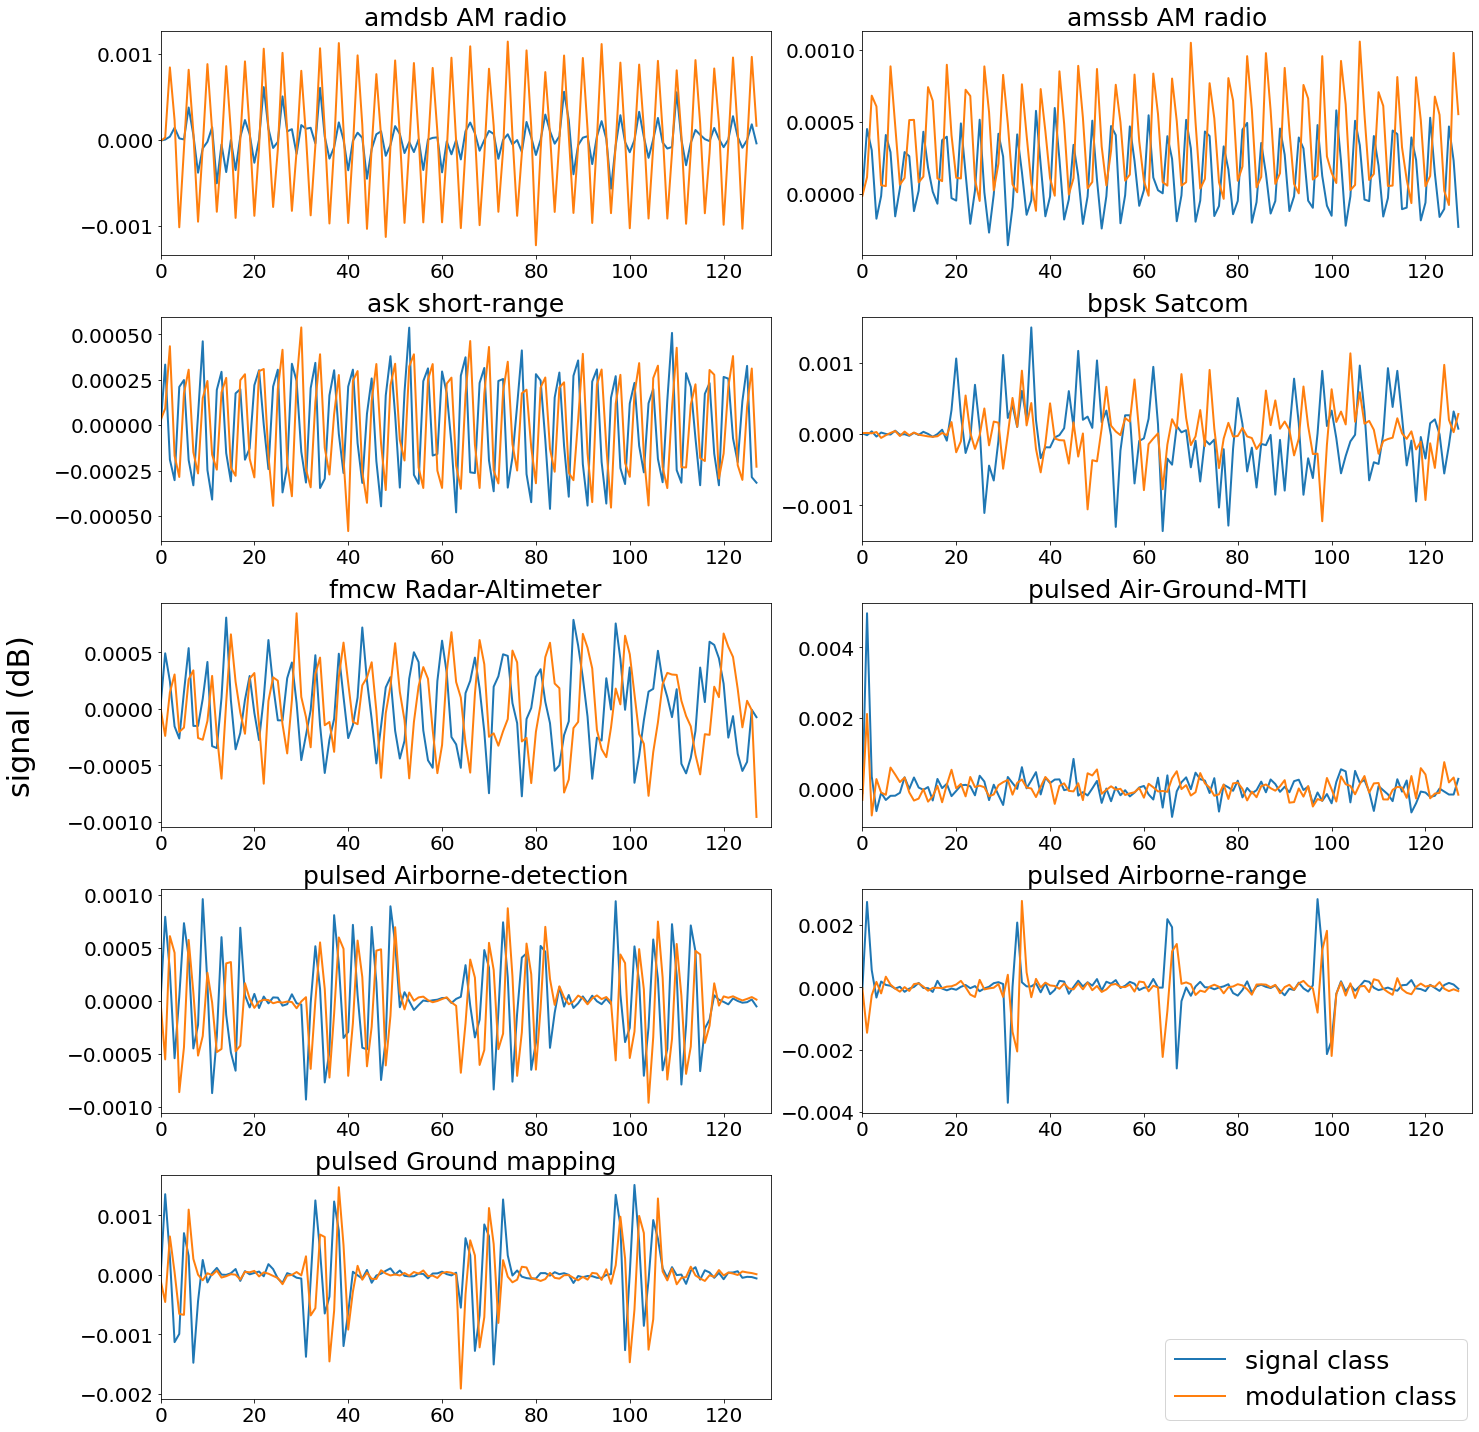

In [43]:
#plots the amdsb AM radio data
plt.rc('xtick', labelsize=20, color='black')
plt.rc('ytick', labelsize=20, color='black')
plt.figure(figsize=(20, 20))

fig, axes=plt.subplots(nrows=5, ncols=2, figsize=(20,20))

a=0 #if a > 2 do +1 reset to 0; y value for axes
b=0 #if b > 6 do +1 reset to 0; x value for axes
c=['amdsb AM radio','amssb AM radio','ask short-range','bpsk Satcom','fmcw Radar-Altimeter','pulsed Air-Ground-MTI',
   'pulsed Airborne-detection','pulsed Airborne-range','pulsed Ground mapping']
e=0

for i in range(9):
    if a < 2:
        axes[b,a].plot(trans.iloc[0:128,i].reset_index(drop=True),
                       linewidth=2,label='signal class')
        axes[b,a].plot(trans.iloc[128:,i].reset_index(drop=True),
                       linewidth=2,label='modulation class')
        axes[b,a].set_xlim(left=0, right=130)
        axes[b,a].set_title(c[e],fontdict={'fontsize':25})
        a=a+1
        e=e+1
        
    if a==2:
        a=0
        b=b+1

fig.tight_layout(h_pad=2)
fig.legend(loc="lower right",labels=["signal class", "modulation class"],fontsize=25)
fig.text(-0.025, 0.5, 'signal (dB)', va='center', rotation='vertical', fontdict={'size': 30})
fig.delaxes(axes[4,1])
fig.tight_layout()

# fig.savefig('waveforms10.png',facecolor='w',bbox_inches='tight')

In [18]:
del trans, final_df, final_df1

In [19]:
final_df=pd.read_csv('./final_dfSub.csv').iloc[:,1:]
final_df

waveform  snr  sample         0         1         2  \
0              amdsb  AM radio  -20       0  0.000124 -0.003148  0.000589   
1              amdsb  AM radio  -20       1  0.000243  0.005241  0.002270   
2              amdsb  AM radio  -20       2 -0.003233 -0.002000  0.006205   
3              amdsb  AM radio  -20       3 -0.008946 -0.001575  0.005534   
4              amdsb  AM radio  -20       4  0.005008  0.001750 -0.000259   
...                        ...  ...     ...       ...       ...       ...   
125356  pulsed  Ground mapping   18     695  0.000664  0.000570  0.020149   
125357  pulsed  Ground mapping   18     696 -0.000014 -0.017624  0.007411   
125358  pulsed  Ground mapping   18     697  0.000249 -0.001434  0.022765   
125359  pulsed  Ground mapping   18     698 -0.000447  0.006813  0.024152   
125360  pulsed  Ground mapping   18     699  0.000095  0.021630  0.014281   

               3         4         5         6  ...       246       247  \
0      -0.009289 -0.001816 -0.003500  0.003450  ...  0.000732  0.010682   
1      -0.001386 -0.002026 -0.005270  0.011141  ... -0.003863 -0.002518   
2      -0.000821  0.003488 -0.002431 -0.008256  ... -0.003632  0.003301   
3       0.010561  0.004172 -0.001303  0.001822  ...  0.000441  0.002733   
4      -0.008179 -0.007281  0.007556  0.003569  ... -0.006410  0.004558   
...          ...       ...       ...       ...  ...       ...       ...   
125356 -0.001224 -0.020974  0.002782  0.022702  ... -0.001341  0.000191   
125357  0.025022 -0.011352 -0.022362  0.010744  ...  0.000558 -0.000028   
125358  0.007392 -0.025753 -0.005688  0.024822  ...  0.000100 -0.000210   
125359 -0.003067 -0.026138  0.004179  0.025244  ...  0.000102 -0.000177   
125360 -0.022884 -0.012985  0.022035  0.012976  ... -0.000106 -0.000017   

             248       249       250       251       252       253       254  \
0      -0.011375  0.002663  0.003183 -0.007208 -0.001212  0.013849 -0.004273   
1       0.005271 -0.005481 -0.003317 -0.011191  0.018409  0.000417 -0.000381   
2       0.001471 -0.005509 -0.001511  0.002575  0.004473  0.003793  0.003305   
3       0.000815 -0.006229 -0.004532  0.006419 -0.006559 -0.006051 -0.004443   
4      -0.000311 -0.006566 -0.001344  0.005945 -0.010363 -0.000011  0.019072   
...          ...       ...       ...       ...       ...       ...       ...   
125356 -0.000589 -0.000040  0.001437  0.000453  0.000301  0.001484 -0.002604   
125357 -0.000383 -0.000011 -0.000210  0.000262  0.000205 -0.000293 -0.000139   
125358  0.000189 -0.000511  0.000329 -0.000297  0.000013  0.000155 -0.000191   
125359 -0.000104 -0.000802  0.000271 -0.000358  0.000176 -0.000219 -0.000532   
125360 -0.000121  0.000071 -0.000042 -0.000049  0.000084 -0.000167  0.000070   

             255  
0       0.009545  
1      -0.000687  
2      -0.002250  
3       0.000676  
4      -0.002903  
...          ...  
125356  0.001356  
125357 -0.000064  
125358  0.000381  
125359 -0.000652  
125360  0.000477  

[125361 rows x 259 columns]

In [20]:
final_df1=final_df.loc[final_df['snr'] == 0].reset_index(drop=True)

#construct the amdsb AM radio set for model construction
amdsbAM_tent=final_df1[(final_df1['waveform'].str.contains("amdsb")) 
                       & (final_df1['waveform'].str.contains("AM")) 
                       & (final_df1['waveform'].str.contains("radio"))]
amdsbAM=amdsbAM_tent.drop(['snr','sample','waveform'],axis=1)

amdsbAM_sig=pd.DataFrame(amdsbAM.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
amdsbAM_mod=pd.DataFrame(amdsbAM.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
amdsbAM=pd.concat([amdsbAM_sig,amdsbAM_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['amdsb AM radio'] * len(amdsbAM)
amdsbAM['waveform']=label
amdsbAM=amdsbAM.reindex(columns= ['waveform','I_component','Q_component'])
amdsbAM

waveform  I_component  Q_component
0      amdsb AM radio     0.000605    -0.003409
1      amdsb AM radio    -0.002208     0.002160
2      amdsb AM radio     0.008714     0.011244
3      amdsb AM radio     0.005073     0.004357
4      amdsb AM radio    -0.005803    -0.014038
...               ...          ...          ...
89595  amdsb AM radio     0.001941     0.005449
89596  amdsb AM radio    -0.004103    -0.009140
89597  amdsb AM radio     0.004256     0.001625
89598  amdsb AM radio     0.004716     0.010830
89599  amdsb AM radio    -0.001969     0.006278

[89600 rows x 3 columns]

In [21]:
#construct the amssb AM radio set for model construction
amssbAM_tent=final_df1[(final_df1['waveform'].str.contains("amssb")) 
                       & (final_df1['waveform'].str.contains("AM")) 
                       & (final_df1['waveform'].str.contains("radio"))]

amssbAM=amssbAM_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
amssbAM_sig=pd.DataFrame(amssbAM.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
amssbAM_mod=pd.DataFrame(amssbAM.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
amssbAM=pd.concat([amssbAM_sig,amssbAM_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['amssb AM radio'] * len(amssbAM)
amssbAM['waveform']=label
amssbAM=amssbAM.reindex(columns= ['waveform','I_component','Q_component'])
amssbAM

waveform  I_component  Q_component
0      amssb AM radio     0.000914    -0.003919
1      amssb AM radio     0.005571     0.002909
2      amssb AM radio     0.009874     0.007193
3      amssb AM radio     0.000379     0.010049
4      amssb AM radio    -0.002287     0.002054
...               ...          ...          ...
89595  amssb AM radio    -0.001598     0.010161
89596  amssb AM radio     0.000879    -0.000601
89597  amssb AM radio     0.005267     0.003055
89598  amssb AM radio     0.009675     0.013343
89599  amssb AM radio    -0.004678     0.011531

[89600 rows x 3 columns]

In [22]:
#construct the ask short-range set for model construction
askrange_tent=final_df1[(final_df1['waveform'].str.contains("ask")) 
                       & (final_df1['waveform'].str.contains("short")) 
                       & (final_df1['waveform'].str.contains("range"))]

askrange=askrange_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
askrange_sig=pd.DataFrame(askrange.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
askrange_mod=pd.DataFrame(askrange.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
askrange=pd.concat([askrange_sig,askrange_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['ask short-range'] * len(askrange)
askrange['waveform']=label
askrange=askrange.reindex(columns= ['waveform','I_component','Q_component'])
askrange

waveform  I_component  Q_component
0      ask short-range    -0.000595     0.001897
1      ask short-range     0.005903     0.000473
2      ask short-range     0.002691     0.007796
3      ask short-range    -0.008119    -0.000822
4      ask short-range    -0.001667    -0.007981
...                ...          ...          ...
89595  ask short-range    -0.010570    -0.003408
89596  ask short-range     0.000895    -0.008997
89597  ask short-range     0.009841    -0.000867
89598  ask short-range    -0.002595     0.008424
89599  ask short-range    -0.007561     0.000203

[89600 rows x 3 columns]

In [23]:
#construct the bpsk Satcom set for model construction
bpskSat_tent=final_df1[(final_df1['waveform'].str.contains("bpsk")) 
                       & (final_df1['waveform'].str.contains("Satcom"))]

bpskSat=bpskSat_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
bpskSat_sig=pd.DataFrame(bpskSat.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
bpskSat_mod=pd.DataFrame(bpskSat.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
bpskSat=pd.concat([bpskSat_sig,bpskSat_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['bpsk Satcom'] * len(bpskSat)
bpskSat['waveform']=label
bpskSat=bpskSat.reindex(columns= ['waveform','I_component','Q_component'])
bpskSat

waveform  I_component  Q_component
0      bpsk Satcom     0.001575    -0.001500
1      bpsk Satcom    -0.000878    -0.001010
2      bpsk Satcom     0.001057    -0.001712
3      bpsk Satcom    -0.001504    -0.000064
4      bpsk Satcom     0.001269     0.001673
...            ...          ...          ...
86907  bpsk Satcom    -0.003077    -0.012952
86908  bpsk Satcom    -0.001868    -0.006400
86909  bpsk Satcom     0.002989    -0.004738
86910  bpsk Satcom     0.002211     0.006765
86911  bpsk Satcom    -0.004149     0.015457

[86912 rows x 3 columns]

In [24]:
#construct the fmcw Radar-Altimeter set for model construction
fmcw_tent=final_df1[(final_df1['waveform'].str.contains("fmcw")) 
                       & (final_df1['waveform'].str.contains("Radar"))
                       & (final_df1['waveform'].str.contains("Altimeter"))]

fmcw=fmcw_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
fmcw_sig=pd.DataFrame(fmcw.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
fmcw_mod=pd.DataFrame(fmcw.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
fmcw=pd.concat([fmcw_sig,fmcw_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['fmcw Radar-Altimeter'] * len(fmcw)
fmcw['waveform']=label
fmcw=fmcw.reindex(columns= ['waveform','I_component','Q_component'])
fmcw

waveform  I_component  Q_component
0      fmcw Radar-Altimeter    -0.002191    -0.000388
1      fmcw Radar-Altimeter     0.006625    -0.004935
2      fmcw Radar-Altimeter     0.004769     0.001278
3      fmcw Radar-Altimeter    -0.006731     0.010231
4      fmcw Radar-Altimeter    -0.005607    -0.005241
...                     ...          ...          ...
89595  fmcw Radar-Altimeter    -0.008560     0.001693
89596  fmcw Radar-Altimeter    -0.011551     0.001696
89597  fmcw Radar-Altimeter    -0.007127    -0.002110
89598  fmcw Radar-Altimeter    -0.009018    -0.007964
89599  fmcw Radar-Altimeter    -0.004161    -0.007443

[89600 rows x 3 columns]

In [25]:
#construct the pulsed Air-Ground-MTI set for model construction
pulsedMTI_tent=final_df1[(final_df1['waveform'].str.contains("pulsed")) 
                       & (final_df1['waveform'].str.contains("Air"))
                       & (final_df1['waveform'].str.contains("Ground"))
                       & (final_df1['waveform'].str.contains("MTI"))]

pulsedMTI=pulsedMTI_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
pulsedMTI_sig=pd.DataFrame(pulsedMTI.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
pulsedMTI_mod=pd.DataFrame(pulsedMTI.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
pulsedMTI=pd.concat([pulsedMTI_sig,pulsedMTI_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['pulsed Air-Ground-MTI'] * len(pulsedMTI)
pulsedMTI['waveform']=label
pulsedMTI=pulsedMTI.reindex(columns= ['waveform','I_component','Q_component'])
pulsedMTI

waveform  I_component  Q_component
0      pulsed Air-Ground-MTI     0.009294    -0.002911
1      pulsed Air-Ground-MTI     0.019516    -0.014812
2      pulsed Air-Ground-MTI     0.012548     0.001167
3      pulsed Air-Ground-MTI    -0.007042     0.006582
4      pulsed Air-Ground-MTI    -0.001828    -0.001888
...                      ...          ...          ...
89595  pulsed Air-Ground-MTI     0.001908    -0.002065
89596  pulsed Air-Ground-MTI    -0.009966    -0.003876
89597  pulsed Air-Ground-MTI     0.014355    -0.000305
89598  pulsed Air-Ground-MTI    -0.003799     0.005757
89599  pulsed Air-Ground-MTI     0.007320    -0.003106

[89600 rows x 3 columns]

In [26]:
#construct the pulsed Airborne-detection set for model construction
pulsedAir_tent=final_df1[(final_df1['waveform'].str.contains("pulsed")) 
                       & (final_df1['waveform'].str.contains("Airborne"))
                       & (final_df1['waveform'].str.contains("detection"))]

pulsedAir=pulsedAir_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
pulsedAir_sig=pd.DataFrame(pulsedAir.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
pulsedAir_mod=pd.DataFrame(pulsedAir.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
pulsedAir=pd.concat([pulsedAir_sig,pulsedAir_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['pulsed Airborne-detection'] * len(pulsedAir)
pulsedAir['waveform']=label
pulsedAir=pulsedAir.reindex(columns= ['waveform','I_component','Q_component'])
pulsedAir

waveform  I_component  Q_component
0      pulsed Airborne-detection     0.004081     0.000050
1      pulsed Airborne-detection     0.011311    -0.006582
2      pulsed Airborne-detection     0.007259     0.006138
3      pulsed Airborne-detection    -0.010326     0.008489
4      pulsed Airborne-detection    -0.010464    -0.008079
...                          ...          ...          ...
89595  pulsed Airborne-detection    -0.004263    -0.008293
89596  pulsed Airborne-detection     0.000316     0.000133
89597  pulsed Airborne-detection     0.004622    -0.003512
89598  pulsed Airborne-detection    -0.010584     0.000085
89599  pulsed Airborne-detection     0.003875    -0.001435

[89600 rows x 3 columns]

In [27]:
#construct the pulsed Airborne-range set for model construction
pulsedRange_tent=final_df1[(final_df1['waveform'].str.contains("pulsed")) 
                       & (final_df1['waveform'].str.contains("Airborne"))
                       & (final_df1['waveform'].str.contains("range"))]

pulsedRange=pulsedRange_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
pulsedRange_sig=pd.DataFrame(pulsedRange.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
pulsedRange_mod=pd.DataFrame(pulsedRange.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
pulsedRange=pd.concat([pulsedRange_sig,pulsedRange_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['pulsed Airborne-range'] * len(pulsedRange)
pulsedRange['waveform']=label
pulsedRange=pulsedRange.reindex(columns= ['waveform','I_component','Q_component'])
pulsedRange

waveform  I_component  Q_component
0      pulsed Airborne-range    -0.002045    -0.000675
1      pulsed Airborne-range     0.011846    -0.007106
2      pulsed Airborne-range     0.001147    -0.009415
3      pulsed Airborne-range    -0.003441     0.005675
4      pulsed Airborne-range     0.004267     0.010109
...                      ...          ...          ...
89595  pulsed Airborne-range     0.005060    -0.001648
89596  pulsed Airborne-range     0.000627    -0.006035
89597  pulsed Airborne-range     0.000017    -0.002499
89598  pulsed Airborne-range     0.003103    -0.003353
89599  pulsed Airborne-range    -0.005870     0.009393

[89600 rows x 3 columns]

In [28]:
#construct the pulsed Ground mapping set for model construction
pulsedMap_tent=final_df1[(final_df1['waveform'].str.contains("pulsed")) 
                       & (final_df1['waveform'].str.contains("Ground"))
                       & (final_df1['waveform'].str.contains("mapping"))]

pulsedMap=pulsedMap_tent.drop(['snr','sample','waveform'],axis=1)

#subset the amssb AM radio set and append to the 'final' dataframe
pulsedMap_sig=pd.DataFrame(pulsedMap.iloc[:,0:128].stack(),columns=['I_component']).reset_index(drop=True)
pulsedMap_mod=pd.DataFrame(pulsedMap.iloc[:,128:].stack(),columns=['Q_component']).reset_index(drop=True)
pulsedMap=pd.concat([pulsedMap_sig,pulsedMap_mod],axis=1)

#the 'final' dataframe will be used to append all other waveforms
label=['pulsed Ground mapping'] * len(pulsedMap)
pulsedMap['waveform']=label
pulsedMap=pulsedMap.reindex(columns= ['waveform','I_component','Q_component'])
pulsedMap

waveform  I_component  Q_component
0      pulsed Ground mapping     0.002985    -0.006330
1      pulsed Ground mapping     0.004343    -0.006149
2      pulsed Ground mapping     0.010703     0.004826
3      pulsed Ground mapping    -0.013389     0.008447
4      pulsed Ground mapping    -0.008477    -0.010928
...                      ...          ...          ...
89595  pulsed Ground mapping    -0.001143     0.003707
89596  pulsed Ground mapping    -0.010560     0.005430
89597  pulsed Ground mapping     0.003135     0.001014
89598  pulsed Ground mapping    -0.009244    -0.001089
89599  pulsed Ground mapping     0.006441     0.009340

[89600 rows x 3 columns]

In [29]:
#construct the final dataset for snr = 0; these steps were
#repeated for snr 2 through 18 and saved for the modeling
#steps. Because computational resources are scarce, the
#dataset had to be split by snr and modeled individually

final=pd.concat([amdsbAM,amssbAM,askrange,bpskSat,fmcw,pulsedMTI,pulsedAir,pulsedRange,pulsedMap],axis=0)
final

#final.to_csv('modelSet0.csv')

waveform  I_component  Q_component
0             amdsb AM radio     0.000605    -0.003409
1             amdsb AM radio    -0.002208     0.002160
2             amdsb AM radio     0.008714     0.011244
3             amdsb AM radio     0.005073     0.004357
4             amdsb AM radio    -0.005803    -0.014038
...                      ...          ...          ...
89595  pulsed Ground mapping    -0.001143     0.003707
89596  pulsed Ground mapping    -0.010560     0.005430
89597  pulsed Ground mapping     0.003135     0.001014
89598  pulsed Ground mapping    -0.009244    -0.001089
89599  pulsed Ground mapping     0.006441     0.009340

[803712 rows x 3 columns]

### Model Development - Determine Fraction of Dataset for Modeling

In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:
data=pd.read_csv('./modelSet10.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000254    -0.000410
1              amdsb AM radio    -0.000128     0.000055
2              amdsb AM radio     0.008655     0.010099
3              amdsb AM radio     0.001184     0.002640
4              amdsb AM radio    -0.009023    -0.011164
...                       ...          ...          ...
803195  pulsed Ground mapping     0.000625    -0.001019
803196  pulsed Ground mapping    -0.002127     0.000495
803197  pulsed Ground mapping    -0.001282     0.001383
803198  pulsed Ground mapping    -0.000445    -0.002504
803199  pulsed Ground mapping    -0.000095     0.000412

[803200 rows x 3 columns]

In [3]:
data=data.loc[(data['waveform']=='amdsb AM radio') | (data['waveform']=='amssb AM radio')]
data

waveform  I_component  Q_component
0       amdsb AM radio     0.000254    -0.000410
1       amdsb AM radio    -0.000128     0.000055
2       amdsb AM radio     0.008655     0.010099
3       amdsb AM radio     0.001184     0.002640
4       amdsb AM radio    -0.009023    -0.011164
...                ...          ...          ...
179195  amssb AM radio    -0.003224     0.009112
179196  amssb AM radio    -0.001478     0.001301
179197  amssb AM radio     0.006948     0.003416
179198  amssb AM radio     0.004345     0.011380
179199  amssb AM radio    -0.003398     0.009090

[179200 rows x 3 columns]

In [4]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data

waveform  I_component  Q_component
0              0     0.000254    -0.000410
1              0    -0.000128     0.000055
2              0     0.008655     0.010099
3              0     0.001184     0.002640
4              0    -0.009023    -0.011164
...          ...          ...          ...
179195         1    -0.003224     0.009112
179196         1    -0.001478     0.001301
179197         1     0.006948     0.003416
179198         1     0.004345     0.011380
179199         1    -0.003398     0.009090

[179200 rows x 3 columns]

In [5]:
size=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
tr=[]
va=[]
te=[]
tr_shape=[]
va_shape=[]
te_shape=[]
tr_zero=[]
tr_one=[]
va_zero=[]
va_one=[]
te_zero=[]
te_one=[]

t0=time.time()
for i in size:
    data1 = data.sample(frac=i,random_state=42)
    X=data1.iloc[:,[1,2]]
    y=data1['waveform']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)
    
    tr_shape.append(X_train.shape)
    va_shape.append(X_val.shape)
    te_shape.append(X_test.shape)
    
    tr_zero.append(len(y_train.loc[y_train==0]))
    tr_one.append(len(y_train.loc[y_train==1]))
    va_zero.append(len(y_val.loc[y_val==0]))
    va_one.append(len(y_val.loc[y_val==1]))
    te_zero.append(len(y_test.loc[y_test==0]))
    te_one.append(len(y_test.loc[y_test==1]))

    svm=SVC(decision_function_shape='ovo',random_state=42)
    svm.fit(X_train,y_train)
    train=svm.score(X_train,y_train)
    val=svm.score(X_val,y_val)
    test=svm.score(X_test,y_test)
    
    tr.append(train)
    va.append(val)
    te.append(test)
    
t1=time.time()
total=t1-t0

In [8]:
shape=pd.concat([pd.DataFrame(tr_shape)[0],pd.DataFrame(va_shape)[0],pd.DataFrame(te_shape)[0]],axis=1)
shape.columns=['training','validation','test']
shape['sample_frac']=[10,20,30,40,50,60,70,80,90,100]
shape

training  validation   test  sample_frac
0     12579        3549   1792           10
1     25159        7097   3584           20
2     37739       10645   5376           30
3     50319       14193   7168           40
4     62899       17741   8960           50
5     75479       21289  10752           60
6     88058       24838  12544           70
7    100638       28386  14336           80
8    113218       31934  16128           90
9    125798       35482  17920          100

In [9]:
counts=pd.concat([pd.DataFrame(tr_zero),pd.DataFrame(tr_one),
                  pd.DataFrame(va_zero),pd.DataFrame(va_one),
                  pd.DataFrame(te_zero),pd.DataFrame(te_one)],axis=1)
counts.columns=['training_0','training_1','validation_0','validation_1','test_0','test_1']
counts['sample_frac']=[10,20,30,40,50,60,70,80,90,100]
counts

training_0  training_1  validation_0  validation_1  test_0  test_1  \
0        6240        6339          1741          1808     866     926   
1       12504       12655          3527          3570    1769    1815   
2       18729       19010          5321          5324    2737    2639   
3       25008       25311          7118          7075    3612    3556   
4       31351       31548          8846          8895    4490    4470   
5       37592       37887         10681         10608    5364    5388   
6       43956       44102         12479         12359    6214    6330   
7       50209       50429         14210         14176    7300    7036   
8       56561       56657         16062         15872    8022    8106   
9       62920       62878         17659         17823    9021    8899   

   sample_frac  
0           10  
1           20  
2           30  
3           40  
4           50  
5           60  
6           70  
7           80  
8           90  
9          100

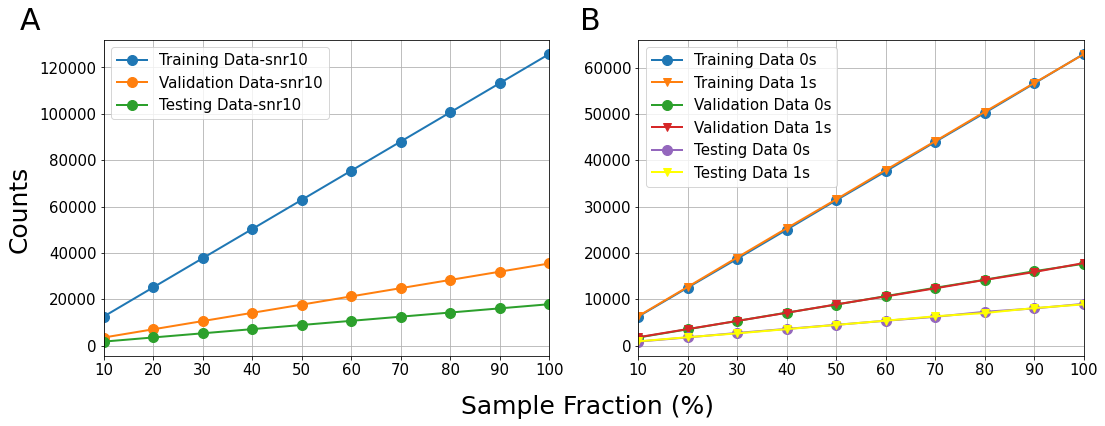

In [15]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(shape.iloc[:,3],shape.iloc[:,0],linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes[0].plot(shape.iloc[:,3],shape.iloc[:,1],linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes[0].plot(shape.iloc[:,3],shape.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes[0].set_xlim(left=10, right=100)
axes[0].legend(loc='upper left',fontsize=15)
axes[0].grid()

axes[1].plot(counts.iloc[:,6],counts.iloc[:,0],linewidth=2,marker='o',markersize=10,label='Training Data 0s')
axes[1].plot(counts.iloc[:,6],counts.iloc[:,1],linewidth=2,marker='v',markersize=8,label='Training Data 1s')
axes[1].plot(counts.iloc[:,6],counts.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Validation Data 0s')
axes[1].plot(counts.iloc[:,6],counts.iloc[:,3],linewidth=2,marker='v',markersize=8,label='Validation Data 1s')
axes[1].plot(counts.iloc[:,6],counts.iloc[:,4],linewidth=2,marker='o',markersize=10,label='Testing Data 0s')
axes[1].plot(counts.iloc[:,6],counts.iloc[:,5],linewidth=2,marker='v',markersize=8,label='Testing Data 1s',color='yellow')
axes[1].set_xlim(left=10, right=100)
axes[1].legend(loc='upper left',fontsize=15)
axes[1].grid()

fig.tight_layout(w_pad=2)
fig.text(-0.008, 1.02, 'A', va='center', fontdict={'size': 30})
fig.text(0.51, 1.02, 'B', va='center', fontdict={'size': 30})
fig.text(-0.02, 0.5, 'Counts', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.40, -0.05, 'Sample Fraction (%)', va='center', fontdict={'size': 25})

#fig.savefig('sampling.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [13]:
pd.options.display.float_format = '{:,.0f}'.format
    
acc_df=pd.concat([pd.DataFrame(np.multiply(tr,100),columns=['training']),pd.DataFrame(np.multiply(va,100),columns=['validation']),
                  pd.DataFrame(np.multiply(te,100),columns=['test']),
                  pd.DataFrame([10,20,30,40,50,60,70,80,90,100],columns=['sample_frac'])],axis=1)
acc_df

training  validation  test  sample_frac
0        78          78    80           10
1        79          79    80           20
2        80          79    79           30
3        79          80    79           40
4        79          79    79           50
5        79          79    79           60
6        79          80    79           70
7        79          79    79           80
8        79          79    79           90
9        79          79    79          100

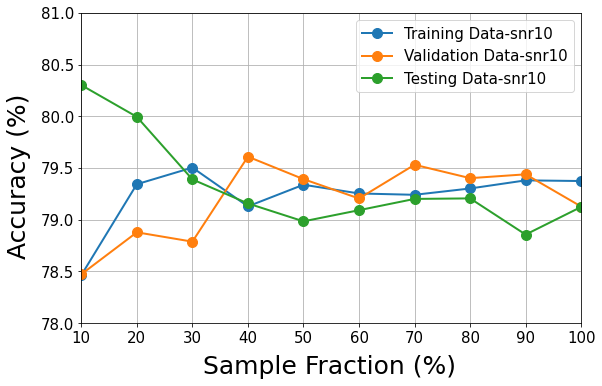

In [16]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(figsize=(8,5))

axes.plot(acc_df.iloc[:,3],acc_df.iloc[:,0],linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes.plot(acc_df.iloc[:,3],acc_df.iloc[:,1],linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes.plot(acc_df.iloc[:,3],acc_df.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes.legend(loc='upper right',fontsize=15)
axes.grid()

plt.xlim([10,100])
plt.ylim([78,81])

fig.text(-0.04,0.5,'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.3, -0.03, 'Sample Fraction (%)', va='center', fontdict={'size': 25})
fig.tight_layout(w_pad=1)

#fig.savefig('sampling_accuracy.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [19]:
del data, data1, tr, va,te, tr_shape, va_shape, te_shape, tr_zero, 
del tr_one, va_zero, va_one, te_zero, te_one, train, val, test, shape, counts
del acc_df

### Model Development - Identify C and Gamma Parameters

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [8]:
data=pd.read_csv('./modelSet10.csv').iloc[0:179200,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0       amdsb AM radio     0.000254    -0.000410
1       amdsb AM radio    -0.000128     0.000055
2       amdsb AM radio     0.008655     0.010099
3       amdsb AM radio     0.001184     0.002640
4       amdsb AM radio    -0.009023    -0.011164
...                ...          ...          ...
179195  amssb AM radio    -0.003224     0.009112
179196  amssb AM radio    -0.001478     0.001301
179197  amssb AM radio     0.006948     0.003416
179198  amssb AM radio     0.004345     0.011380
179199  amssb AM radio    -0.003398     0.009090

[179200 rows x 3 columns]

In [9]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
79157          0     0.001392     0.000077
5820           0    -0.010276     0.009079
69754          0     0.004985    -0.010748
136965         1    -0.007609    -0.000056
20733          0     0.000693     0.002311
...          ...          ...          ...
47054          0    -0.008647    -0.009411
173103         1     0.002440     0.008938
143578         1    -0.006884     0.010676
164609         1     0.005673    -0.005434
81749          0     0.003359    -0.000878

[89600 rows x 3 columns]

In [10]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
79157      0.001392     0.000077
5820      -0.010276     0.009079
69754      0.004985    -0.010748
136965    -0.007609    -0.000056
20733      0.000693     0.002311
...             ...          ...
47054     -0.008647    -0.009411
173103     0.002440     0.008938
143578    -0.006884     0.010676
164609     0.005673    -0.005434
81749      0.003359    -0.000878

[89600 rows x 2 columns]

In [11]:
y=data1['waveform']
y

79157     0
5820      0
69754     0
136965    1
20733     0
         ..
47054     0
173103    1
143578    1
164609    1
81749     0
Name: waveform, Length: 89600, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [13]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(62899, 2)
(17741, 2)
(8960, 2)


In [14]:
print("number of 0 in training set: {:.0f}".format(len(y_train.loc[y_train==0])))
print("number of 1 in training set: {:.0f}\n".format(len(y_train.loc[y_train==1])))

print("number of 0 in validation set: {:.0f}".format(len(y_val.loc[y_val==0])))
print("number of 1 in validation set: {:.0f}\n".format(len(y_val.loc[y_val==1])))

print("number of 0 in test set: {:.0f}".format(len(y_test.loc[y_test==0])))
print("number of 1 in test set: {:.0f}".format(len(y_test.loc[y_test==1])))

number of 0 in training set: 31351
number of 1 in training set: 31548

number of 0 in validation set: 8846
number of 1 in validation set: 8895

number of 0 in test set: 4490
number of 1 in test set: 4470


In [15]:
t0=time.time()

#create empty dataframes for training and test accuracy
train_acc=[]
val_acc=[]
test_acc=[]

#C parameter range
param=[1,10,100,1000,10000,100000,1000000]

for i in param:
    svm=SVC(C=i, random_state=42)
    svm.fit(X_train,y_train)
    train_acc.append(svm.score(X_train,y_train))
    val_acc.append(svm.score(X_val,y_val))
    test_acc.append(svm.score(X_test,y_test))

t1=time.time()

total=t1-t0

print(round(total/60,1),"mins")

407.4 mins


In [16]:
print(train_acc)
print(val_acc)
print(test_acc)

[0.7933830426556862, 0.7930650725766706, 0.7992813876214249, 0.8314440611138492, 0.8339401262341214, 0.8359115407240179, 0.8348622394632665]
[0.7939236796121978, 0.7932472803111437, 0.7993348740206302, 0.8311256411701707, 0.8324220731638577, 0.8337748717659659, 0.8337185051575446]
[0.78984375, 0.7886160714285714, 0.7998883928571429, 0.82890625, 0.8323660714285714, 0.8361607142857143, 0.8348214285714286]


In [17]:
t0=time.time()

#create empty dataframes for training and test accuracy
train_acc1=[]
val_acc1=[]
test_acc1=[]

#gamma parameter range
param1=[0.1,1,10,100,1000,10000,100000,1000000]

for i in param1:
    svm=SVC(gamma=i, random_state=42)
    svm.fit(X_train,y_train)
    train_acc1.append(svm.score(X_train,y_train))
    val_acc1.append(svm.score(X_val,y_val))
    test_acc1.append(svm.score(X_test,y_test))

t1=time.time()

total=t1-t0

print(round(total/60,1),"mins")

18.0 mins


In [18]:
print(train_acc1)
print(val_acc1)
print(test_acc1)

[0.5015660026391516, 0.5015660026391516, 0.5082274757945278, 0.5480532281912273, 0.6185153977010763, 0.7935897232070462, 0.8358797437161163, 0.8405380053736944]
[0.5013809819063187, 0.5013809819063187, 0.5041429457189561, 0.5462488022095711, 0.6175525618623527, 0.7942055126543036, 0.8343949044585988, 0.835804069669128]
[0.49888392857142855, 0.49888392857142855, 0.5175223214285715, 0.5511160714285714, 0.621875, 0.7902901785714286, 0.8341517857142857, 0.8402901785714286]


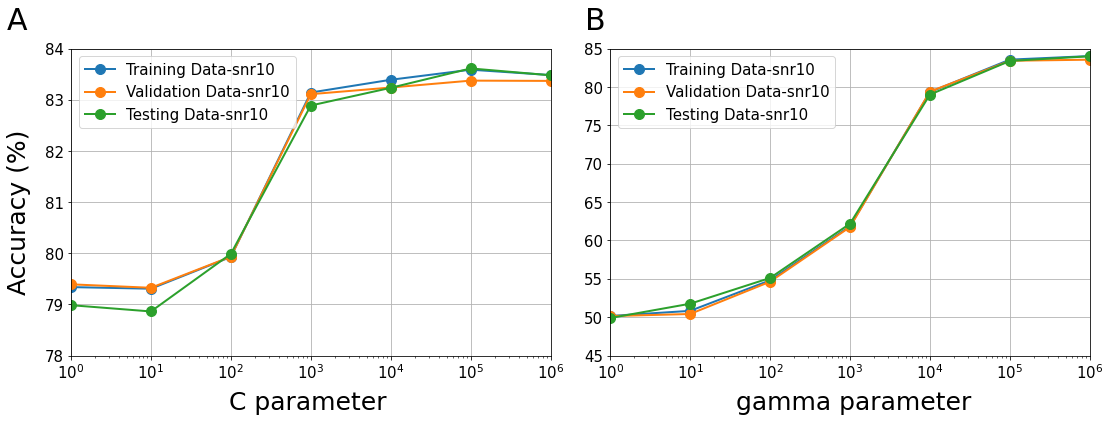

In [20]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axes[0].plot(param,np.multiply(train_acc,100),linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes[0].plot(param,np.multiply(val_acc,100),linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes[0].plot(param,np.multiply(test_acc,100),linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes[0].legend(loc='upper left',fontsize=15)
axes[0].set_xlim(left=1, right=1000000)
axes[0].set_ylim(bottom=78, top=84)
axes[0].set_xscale('log')
axes[0].grid()

axes[1].plot(param1,np.multiply(train_acc1,100),linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes[1].plot(param1,np.multiply(val_acc1,100),linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes[1].plot(param1,np.multiply(test_acc1,100),linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes[1].legend(loc='upper left',fontsize=15)
axes[1].set_xlim(left=1, right=1000000)
axes[1].set_ylim(bottom=45, top=85)
axes[1].set_xscale('log')
axes[1].grid()

fig.tight_layout()
fig.text(-0.025, 1.03, 'A', va='center', fontdict={'size': 30})
fig.text(0.51, 1.03, 'B', va='center', fontdict={'size': 30})
fig.text(-0.025,0.5,'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.18,-0.03, 'C parameter', va='center', fontdict={'size': 25})
fig.text(0.65,-0.03, 'gamma parameter', va='center', fontdict={'size': 25})
fig.tight_layout(w_pad=2)

#fig.savefig('hyperparam.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [37]:
pd.options.display.float_format = '{:,.3f}'.format

trc=[0.7933830426556862, 0.7930650725766706, 0.7992813876214249, 0.8314440611138492, 0.8339401262341214, 
                  0.8359115407240179, 0.8348622394632665]
vac=[0.7939236796121978, 0.7932472803111437, 0.7993348740206302, 0.8311256411701707, 0.8324220731638577, 
    0.8337748717659659, 0.8337185051575446]
tec=[0.78984375, 0.7886160714285714, 0.7998883928571429, 0.82890625, 0.8323660714285714, 0.8361607142857143, 
    0.8348214285714286]

cset=pd.concat([pd.DataFrame(trc,columns=['training']),pd.DataFrame(vac,columns=['validation']),
                 pd.DataFrame(tec,columns=['testing'])],axis=1)
cset=cset*100
cset['para']=[1,10,100,1000,10000,100000,1000000]

tri=[0.5015660026391516, 0.5082274757945278, 0.5480532281912273, 0.6185153977010763, 0.7935897232070462, 
     0.8358797437161163, 0.8405380053736944]
vai=[0.5013809819063187, 0.5041429457189561, 0.5462488022095711, 0.6175525618623527, 0.7942055126543036, 
     0.8343949044585988, 0.835804069669128]
tei=[0.49888392857142855, 0.5175223214285715, 0.5511160714285714, 0.621875, 0.7902901785714286, 0.8341517857142857, 
     0.8402901785714286]

iset=pd.concat([pd.DataFrame(tri,columns=['training']),pd.DataFrame(vai,columns=['validation']),
                  pd.DataFrame(tei,columns=['testing'])],axis=1)
iset=iset*100
iset['para']=[1,10,100,1000,10000,100000,1000000]

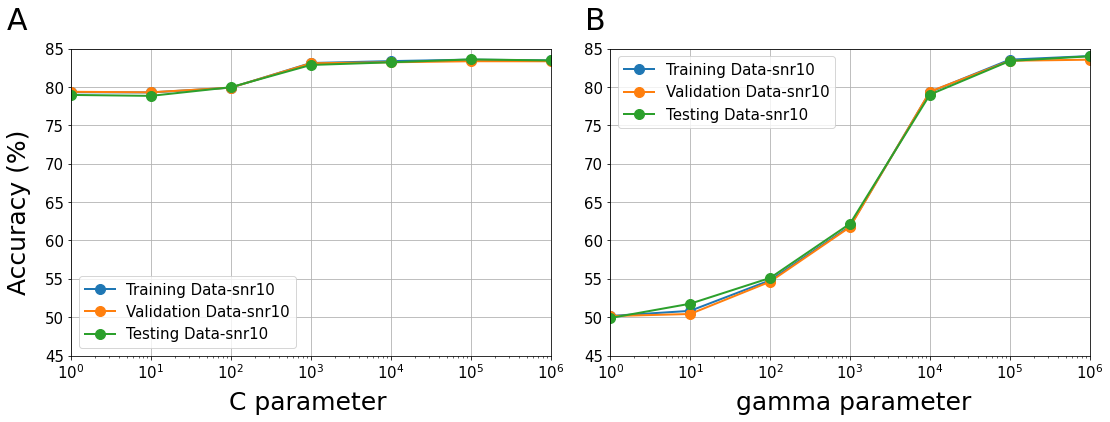

In [45]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axes[0].plot(cset.iloc[:,3],cset.iloc[:,0],linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes[0].plot(cset.iloc[:,3],cset.iloc[:,1],linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes[0].plot(cset.iloc[:,3],cset.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes[0].legend(loc='lower left',fontsize=15)
axes[0].set_xlim(left=1, right=1000000)
axes[0].set_ylim(bottom=45, top=85)
axes[0].set_xscale('log')
axes[0].grid()

axes[1].plot(iset.iloc[:,3],iset.iloc[:,0],linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes[1].plot(iset.iloc[:,3],iset.iloc[:,1],linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes[1].plot(iset.iloc[:,3],iset.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes[1].legend(loc='upper left',fontsize=15)
axes[1].set_xlim(left=1, right=1000000)
axes[1].set_ylim(bottom=45, top=85)
axes[1].set_xscale('log')
axes[1].grid()

fig.tight_layout()
fig.text(-0.025, 1.03, 'A', va='center', fontdict={'size': 30})
fig.text(0.51, 1.03, 'B', va='center', fontdict={'size': 30})
fig.text(-0.025,0.5,'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.18,-0.03, 'C parameter', va='center', fontdict={'size': 25})
fig.text(0.65,-0.03, 'gamma parameter', va='center', fontdict={'size': 25})
fig.tight_layout(w_pad=2)

# fig.savefig('hyperparam.png',facecolor='w',bbox_inches='tight',dpi='figure')

### Model Development - Find Optimal C and Gamma Parameters

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

In [2]:
data=pd.read_csv('./modelSet10.csv').iloc[0:179200,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0       amdsb AM radio     0.000254    -0.000410
1       amdsb AM radio    -0.000128     0.000055
2       amdsb AM radio     0.008655     0.010099
3       amdsb AM radio     0.001184     0.002640
4       amdsb AM radio    -0.009023    -0.011164
...                ...          ...          ...
179195  amssb AM radio    -0.003224     0.009112
179196  amssb AM radio    -0.001478     0.001301
179197  amssb AM radio     0.006948     0.003416
179198  amssb AM radio     0.004345     0.011380
179199  amssb AM radio    -0.003398     0.009090

[179200 rows x 3 columns]

In [3]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
79157          0     0.001392     0.000077
5820           0    -0.010276     0.009079
69754          0     0.004985    -0.010748
136965         1    -0.007609    -0.000056
20733          0     0.000693     0.002311
...          ...          ...          ...
47054          0    -0.008647    -0.009411
173103         1     0.002440     0.008938
143578         1    -0.006884     0.010676
164609         1     0.005673    -0.005434
81749          0     0.003359    -0.000878

[89600 rows x 3 columns]

In [4]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
79157      0.001392     0.000077
5820      -0.010276     0.009079
69754      0.004985    -0.010748
136965    -0.007609    -0.000056
20733      0.000693     0.002311
...             ...          ...
47054     -0.008647    -0.009411
173103     0.002440     0.008938
143578    -0.006884     0.010676
164609     0.005673    -0.005434
81749      0.003359    -0.000878

[89600 rows x 2 columns]

In [5]:
y=data1['waveform']
y

79157     0
5820      0
69754     0
136965    1
20733     0
         ..
47054     0
173103    1
143578    1
164609    1
81749     0
Name: waveform, Length: 89600, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [7]:
t0=time.time()

svm=SVC(C=10,gamma=10,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train10=svm.score(X_train,y_train)
val10=svm.score(X_val,y_val)
test10=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [8]:
#C=10,gamma=10
print("Training Score: {:.4f}".format(train10))
print("Validation Score: {:.4f}".format(val10))
print("Test Score: {:.4f}".format(test10))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.4772
Validation Score: 0.4728
Test Score: 0.4825
2.83 mins


In [9]:
t0=time.time()

svm=SVC(C=100,gamma=100,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train100=svm.score(X_train,y_train)
val100=svm.score(X_val,y_val)
test100=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [10]:
#C=100,gamma=100
print("Training Score: {:.4f}".format(train100))
print("Validation Score: {:.4f}".format(val100))
print("Test Score: {:.4f}".format(test100))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.5861
Validation Score: 0.5848
Test Score: 0.5894
2.73 mins


In [13]:
t0=time.time()

svm=SVC(C=1000,gamma=1000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train1000=svm.score(X_train,y_train)
val1000=svm.score(X_val,y_val)
test1000=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [14]:
#C=1000,gamma=1000
print("Training Score: {:.4f}".format(train1000))
print("Validation Score: {:.4f}".format(val1000))
print("Test Score: {:.4f}".format(test1000))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.7817
Validation Score: 0.7837
Test Score: 0.7818
3.06 mins


In [15]:
t0=time.time()

svm=SVC(C=10000,gamma=10000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train10000=svm.score(X_train,y_train)
val10000=svm.score(X_val,y_val)
test10000=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [16]:
#C=10000,gamma=10000
print("Training Score: {:.4f}".format(train10000))
print("Validation Score: {:.4f}".format(val10000))
print("Test Score: {:.4f}".format(test10000))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.8338
Validation Score: 0.8317
Test Score: 0.8313
15.30 mins


In [28]:
para_df=pd.concat([pd.DataFrame([48,59,78,83],columns=['Training']),
                   pd.DataFrame([47,58,78,83],columns=['Validation']),
                   pd.DataFrame([48,58,78,83],columns=['Testing'])],axis=1)
para_df['para_value']=[10,100,1000,10000]
para_df

Training  Validation  Testing  para_value
0        48          47       48          10
1        59          58       58         100
2        78          78       78        1000
3        83          83       83       10000

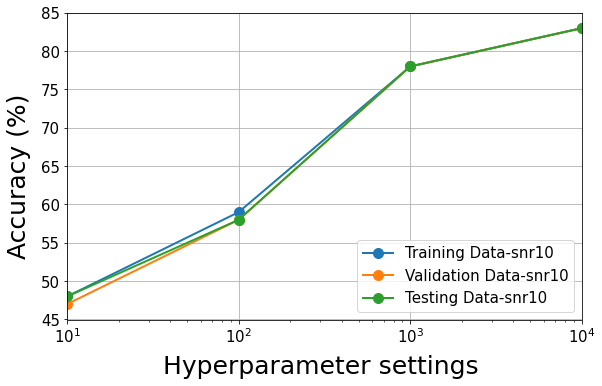

In [39]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(figsize=(8,5))

axes.plot(para_df.iloc[:,3],para_df.iloc[:,0],linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes.plot(para_df.iloc[:,3],para_df.iloc[:,1],linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes.plot(para_df.iloc[:,3],para_df.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes.legend(loc='lower right',fontsize=15)
axes.set_xscale('log')
axes.grid()

plt.xlim([10,10000])
plt.ylim([45,85])

fig.text(-0.04,0.5,'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.23, -0.03, 'Hyperparameter settings', va='center', fontdict={'size': 25})
fig.tight_layout(w_pad=1)

# fig.savefig('combined_hyper_settings.png',facecolor='w',bbox_inches='tight',dpi='figure')

In [40]:
param_grid={"C":[10,100,1000,10000],
           "gamma":[10,100,1000,10000]}

In [43]:
grid_search=GridSearchCV(SVC(),param_grid,return_train_score=True)

In [44]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000, 10000],
                         'gamma': [10, 100, 1000, 10000]},
             return_train_score=True)

In [45]:
train_grid=grid_search.score(X_train,y_train)
val_grid=grid_search.score(X_val,y_val)
test_grid=grid_search.score(X_test,y_test)

In [53]:
print("Training Score: {:.4f}".format(train_grid))
print("Validation Score: {:.4f}".format(val_grid))
print("Test Score: {:.4f}".format(test_grid))

print("Best parameters:",grid_search.best_params_)
print("Best score: {:.2f}".format(grid_search.best_score_))

Training Score: 0.8338
Validation Score: 0.8317
Test Score: 0.8313
Best parameters: {'C': 10000, 'gamma': 10000}
Best score: 0.83


In [55]:
grid_results=pd.DataFrame(grid_search.cv_results_)
display(grid_results)
# grid_results.to_csv("gridResults.csv")

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       59.419733      0.697484         8.541973        0.174872      10   
1       57.952267      2.224387         8.037818        0.058908      10   
2       63.338728      1.091626         7.710022        0.116361      10   
3       35.006132      0.267723         4.093076        0.057551      10   
4       59.693349      0.719705         8.386168        0.124358     100   
5       63.342184      2.412395         7.987303        0.215799     100   
6       65.009962      0.930358         5.127240        0.086066     100   
7       42.936061      0.554092         4.028901        0.038784     100   
8       62.009095      0.427982         8.129223        0.123108    1000   
9       90.275979      1.409125         7.993004        0.132125    1000   
10      93.444613      1.750990         4.597312        0.052625    1000   
11     107.873267      1.454761         3.919248        0.068120    1000   
12      89.005243      1.996200         7.831309        0.026955   10000   
13     256.938384      7.351551         8.037516        0.158377   10000   
14    1070.964271    338.924937        13.662387        7.472059   10000   
15    2180.262222    391.139781        17.043782        0.038489   10000   

   param_gamma                        params  split0_test_score  \
0           10        {'C': 10, 'gamma': 10}           0.486725   
1          100       {'C': 10, 'gamma': 100}           0.590700   
2         1000      {'C': 10, 'gamma': 1000}           0.790461   
3        10000     {'C': 10, 'gamma': 10000}           0.792448   
4           10       {'C': 100, 'gamma': 10}           0.543879   
5          100      {'C': 100, 'gamma': 100}           0.585930   
6         1000     {'C': 100, 'gamma': 1000}           0.781558   
7        10000    {'C': 100, 'gamma': 10000}           0.791733   
8           10      {'C': 1000, 'gamma': 10}           0.592925   
9          100     {'C': 1000, 'gamma': 100}           0.581558   
10        1000    {'C': 1000, 'gamma': 1000}           0.781081   
11       10000   {'C': 1000, 'gamma': 10000}           0.815183   
12          10     {'C': 10000, 'gamma': 10}           0.587281   
13         100    {'C': 10000, 'gamma': 100}           0.614865   
14        1000   {'C': 10000, 'gamma': 1000}           0.784976   
15       10000  {'C': 10000, 'gamma': 10000}           0.830922   

    split1_test_score  split2_test_score  ...  mean_test_score  \
0            0.479173           0.485771  ...         0.482535   
1            0.587679           0.596105  ...         0.592537   
2            0.794038           0.788871  ...         0.791221   
3            0.795787           0.792130  ...         0.793383   
4            0.530525           0.543800  ...         0.541090   
5            0.581479           0.589666  ...         0.586846   
6            0.784976           0.781161  ...         0.782063   
7            0.794992           0.791256  ...         0.792747   
8            0.590143           0.598172  ...         0.594652   
9            0.570906           0.580684  ...         0.578086   
10           0.784817           0.781161  ...         0.781809   
11           0.808744           0.807552  ...         0.811237   
12           0.585533           0.592846  ...         0.589866   
13           0.618601           0.620509  ...         0.617879   
14           0.788076           0.784340  ...         0.785466   
15           0.833625           0.828696  ...         0.831714   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.003218               16            0.482641            0.486397   
1         0.003139               11            0.594567            0.592122   
2         0.001773                5            0.791808            0.790079   
3         0.001295                3            0.794253            0.793199   
4         0.006054               15            0.5457

### Model AM radio data at snr10 using only signal or modulation

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [2]:
data=pd.read_csv('./modelSet10.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000254    -0.000410
1              amdsb AM radio    -0.000128     0.000055
2              amdsb AM radio     0.008655     0.010099
3              amdsb AM radio     0.001184     0.002640
4              amdsb AM radio    -0.009023    -0.011164
...                       ...          ...          ...
803195  pulsed Ground mapping     0.000625    -0.001019
803196  pulsed Ground mapping    -0.002127     0.000495
803197  pulsed Ground mapping    -0.001282     0.001383
803198  pulsed Ground mapping    -0.000445    -0.002504
803199  pulsed Ground mapping    -0.000095     0.000412

[803200 rows x 3 columns]

In [3]:
data=data.loc[(data['waveform']=='amdsb AM radio') | (data['waveform']=='amssb AM radio')]
data

waveform  I_component  Q_component
0       amdsb AM radio     0.000254    -0.000410
1       amdsb AM radio    -0.000128     0.000055
2       amdsb AM radio     0.008655     0.010099
3       amdsb AM radio     0.001184     0.002640
4       amdsb AM radio    -0.009023    -0.011164
...                ...          ...          ...
179195  amssb AM radio    -0.003224     0.009112
179196  amssb AM radio    -0.001478     0.001301
179197  amssb AM radio     0.006948     0.003416
179198  amssb AM radio     0.004345     0.011380
179199  amssb AM radio    -0.003398     0.009090

[179200 rows x 3 columns]

In [4]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data

waveform  I_component  Q_component
0              0     0.000254    -0.000410
1              0    -0.000128     0.000055
2              0     0.008655     0.010099
3              0     0.001184     0.002640
4              0    -0.009023    -0.011164
...          ...          ...          ...
179195         1    -0.003224     0.009112
179196         1    -0.001478     0.001301
179197         1     0.006948     0.003416
179198         1     0.004345     0.011380
179199         1    -0.003398     0.009090

[179200 rows x 3 columns]

In [5]:
size=[1,10,100,1000,10000]
tr=[]
va=[]
te=[]

t0=time.time()
for i in size:
    data1 = data.sample(frac=0.5,random_state=42)
    X=data1.iloc[:,[1]]
    y=data1['waveform']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

    svm=SVC(gamma=i,decision_function_shape='ovo',random_state=42)
    svm.fit(X_train,y_train)
    train=svm.score(X_train,y_train)
    val=svm.score(X_val,y_val)
    test=svm.score(X_test,y_test)
    
    tr.append(train)
    va.append(val)
    te.append(test)
    
t1=time.time()
total=t1-t0

In [6]:
print("Scores for training the signal class alone")
print("Training Score:", tr)
print("Validation Score:", va)
print("Test Score:", te)
print("{:.2f}".format(total/60),"mins")

Scores for training the signal class alone
Training Score: [0.5015660026391516, 0.5015660026391516, 0.5300084262070939, 0.5588483123738056, 0.6243978441628643]
Validation Score: [0.5013809819063187, 0.5013809819063187, 0.5283805873400598, 0.5598895214474945, 0.6246547545234203]
Test Score: [0.49888392857142855, 0.49888392857142855, 0.5277901785714286, 0.55859375, 0.62734375]
13.10 mins


In [7]:
size=[1,10,100,1000,10000]
tr=[]
va=[]
te=[]

t0=time.time()
for i in size:
    data1 = data.sample(frac=0.5,random_state=42)
    X=data1.iloc[:,[2]]
    y=data1['waveform']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

    svm=SVC(gamma=i,decision_function_shape='ovo',random_state=42)
    svm.fit(X_train,y_train)
    train=svm.score(X_train,y_train)
    val=svm.score(X_val,y_val)
    test=svm.score(X_test,y_test)
    
    tr.append(train)
    va.append(val)
    te.append(test)
    
t1=time.time()
total=t1-t0

In [8]:
print("Scores for training the modulation class alone")
print("Training Score:", tr)
print("Validation Score:", va)
print("Test Score:", te)
print("{:.2f}".format(total/60),"mins")

Scores for training the modulation class alone
Training Score: [0.5015660026391516, 0.5086567354011987, 0.5056678166584524, 0.5410578864528848, 0.6191672363630583]
Validation Score: [0.5013809819063187, 0.5033538132010597, 0.5041993123273772, 0.5392593427653458, 0.618623527422355]
Test Score: [0.49888392857142855, 0.5171875, 0.5047991071428571, 0.5392857142857143, 0.6208705357142857]
13.14 mins


In [9]:
pd.options.display.float_format = '{:,.3f}'.format

sig_tr=[0.5015660026391516, 0.5015660026391516, 0.5300084262070939, 0.5588483123738056, 0.6243978441628643]
sig_va=[0.5013809819063187, 0.5013809819063187, 0.5283805873400598, 0.5598895214474945, 0.6246547545234203]
sig_te=[0.49888392857142855, 0.49888392857142855, 0.5277901785714286, 0.55859375, 0.62734375]
mod_tr=[0.5015660026391516, 0.5086567354011987, 0.5056678166584524, 0.5410578864528848, 0.6191672363630583]
mod_va=[0.5013809819063187, 0.5033538132010597, 0.5041993123273772, 0.5392593427653458, 0.618623527422355]
mod_te=[0.49888392857142855, 0.5171875, 0.5047991071428571, 0.5392857142857143, 0.6208705357142857]

gam=pd.concat([pd.DataFrame(sig_tr),pd.DataFrame(sig_va),pd.DataFrame(sig_te),
               pd.DataFrame(mod_tr),pd.DataFrame(mod_va),pd.DataFrame(mod_te)],axis=1)

gam.columns=['sig_train','sig_val','sig_test','mod_train','mod_val','mod_test']
gam['sample_frac']=[1,10,100,1000,10000]
gam

sig_train  sig_val  sig_test  mod_train  mod_val  mod_test  sample_frac
0      0.502    0.501     0.499      0.502    0.501     0.499            1
1      0.502    0.501     0.499      0.509    0.503     0.517           10
2      0.530    0.528     0.528      0.506    0.504     0.505          100
3      0.559    0.560     0.559      0.541    0.539     0.539         1000
4      0.624    0.625     0.627      0.619    0.619     0.621        10000

Text(0.4, -0.05, 'gamma parameter')

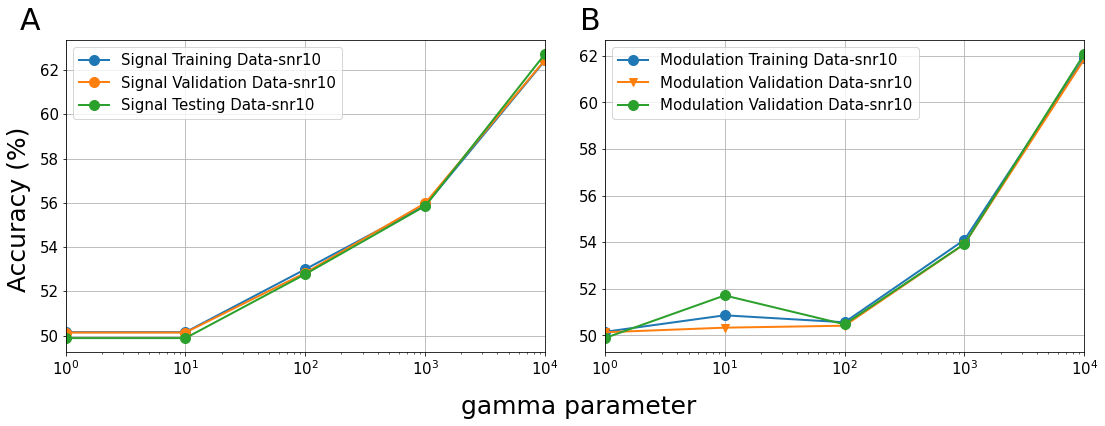

In [10]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].plot(gam.iloc[:,6],gam.iloc[:,0]*100,linewidth=2,marker='o',markersize=10,label='Signal Training Data-snr10')
axes[0].plot(gam.iloc[:,6],gam.iloc[:,1]*100,linewidth=2,marker='o',markersize=10,label='Signal Validation Data-snr10')
axes[0].plot(gam.iloc[:,6],gam.iloc[:,2]*100,linewidth=2,marker='o',markersize=10,label='Signal Testing Data-snr10')
axes[0].set_xscale('log')
axes[0].set_xlim(left=1, right=10000)
axes[0].legend(loc='upper left',fontsize=15)
axes[0].grid()

axes[1].plot(gam.iloc[:,6],gam.iloc[:,3]*100,linewidth=2,marker='o',markersize=10,label='Modulation Training Data-snr10')
axes[1].plot(gam.iloc[:,6],gam.iloc[:,4]*100,linewidth=2,marker='v',markersize=8,label='Modulation Validation Data-snr10')
axes[1].plot(gam.iloc[:,6],gam.iloc[:,5]*100,linewidth=2,marker='o',markersize=10,label='Modulation Validation Data-snr10')
axes[1].set_xscale('log')
axes[1].set_xlim(left=1, right=10000)
axes[1].legend(loc='upper left',fontsize=15)
axes[1].grid()

fig.tight_layout(w_pad=2)
fig.text(-0.008, 1.02, 'A', va='center', fontdict={'size': 30})
fig.text(0.51, 1.02, 'B', va='center', fontdict={'size': 30})
fig.text(-0.02, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.40, -0.05, 'gamma parameter', va='center', fontdict={'size': 25})

# fig.savefig('sig_mod_gamma.png',facecolor='w',bbox_inches='tight',dpi='figure')

### Model AM radio data at snr10 squared values for signal and modulation classes

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./modelSet10.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000254    -0.000410
1              amdsb AM radio    -0.000128     0.000055
2              amdsb AM radio     0.008655     0.010099
3              amdsb AM radio     0.001184     0.002640
4              amdsb AM radio    -0.009023    -0.011164
...                       ...          ...          ...
803195  pulsed Ground mapping     0.000625    -0.001019
803196  pulsed Ground mapping    -0.002127     0.000495
803197  pulsed Ground mapping    -0.001282     0.001383
803198  pulsed Ground mapping    -0.000445    -0.002504
803199  pulsed Ground mapping    -0.000095     0.000412

[803200 rows x 3 columns]

In [3]:
data=data.loc[(data['waveform']=='amdsb AM radio') | (data['waveform']=='amssb AM radio')]
data['signal^2']=data['I_component']**2
data['modulation^2']=data['Q_component']**2
data

waveform  I_component  Q_component      signal^2  modulation^2
0       amdsb AM radio     0.000254    -0.000410  6.470757e-08  1.680915e-07
1       amdsb AM radio    -0.000128     0.000055  1.633014e-08  3.046718e-09
2       amdsb AM radio     0.008655     0.010099  7.490742e-05  1.019812e-04
3       amdsb AM radio     0.001184     0.002640  1.402759e-06  6.971212e-06
4       amdsb AM radio    -0.009023    -0.011164  8.140689e-05  1.246350e-04
...                ...          ...          ...           ...           ...
179195  amssb AM radio    -0.003224     0.009112  1.039665e-05  8.302022e-05
179196  amssb AM radio    -0.001478     0.001301  2.185059e-06  1.693354e-06
179197  amssb AM radio     0.006948     0.003416  4.828102e-05  1.166833e-05
179198  amssb AM radio     0.004345     0.011380  1.888308e-05  1.295151e-04
179199  amssb AM radio    -0.003398     0.009090  1.154552e-05  8.262300e-05

[179200 rows x 5 columns]

In [4]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data

waveform  I_component  Q_component      signal^2  modulation^2
0              0     0.000254    -0.000410  6.470757e-08  1.680915e-07
1              0    -0.000128     0.000055  1.633014e-08  3.046718e-09
2              0     0.008655     0.010099  7.490742e-05  1.019812e-04
3              0     0.001184     0.002640  1.402759e-06  6.971212e-06
4              0    -0.009023    -0.011164  8.140689e-05  1.246350e-04
...          ...          ...          ...           ...           ...
179195         1    -0.003224     0.009112  1.039665e-05  8.302022e-05
179196         1    -0.001478     0.001301  2.185059e-06  1.693354e-06
179197         1     0.006948     0.003416  4.828102e-05  1.166833e-05
179198         1     0.004345     0.011380  1.888308e-05  1.295151e-04
179199         1    -0.003398     0.009090  1.154552e-05  8.262300e-05

[179200 rows x 5 columns]

In [5]:
size=[1,10,100,1000,10000,100000]
tr=[]
va=[]
te=[]

t0=time.time()
for i in size:
    data1 = data.sample(frac=0.5,random_state=42)
    X=data1.iloc[:,[3,4]]
    y=data1['waveform']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

    svm=SVC(gamma=i,decision_function_shape='ovo',random_state=42)
    svm.fit(X_train,y_train)
    train=svm.score(X_train,y_train)
    val=svm.score(X_val,y_val)
    test=svm.score(X_test,y_test)
    
    tr.append(train)
    va.append(val)
    te.append(test)
    
t1=time.time()
total=t1-t0

In [7]:
print("Scores for training the squared values")
print("Training Score:", tr)
print("Validation Score:", va)
print("Test Score:", te)
print("{:.2f}".format(total/60),"mins")

Scores for training the squared values
Training Score: [0.5015660026391516, 0.5015660026391516, 0.5015660026391516, 0.5015660026391516, 0.5018839727181672, 0.604636003752047]
Validation Score: [0.5013809819063187, 0.5013809819063187, 0.5013809819063187, 0.5013809819063187, 0.5015500817315822, 0.6033481765402176]
Test Score: [0.49888392857142855, 0.49888392857142855, 0.49888392857142855, 0.49888392857142855, 0.49899553571428573, 0.6088169642857143]
29.39 mins


In [13]:
t0=time.time()

svm=SVC(gamma=1000000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [15]:
print("Scores for training the squared values")
print("Training Score:", train)
print("Validation Score:", val)
print("Test Score:", test)
print("{:.2f}".format(total/60),"mins")

Scores for training the squared values
Training Score: 0.6308844337747818
Validation Score: 0.6273603517276366
Test Score: 0.6296875
2.71 mins


In [44]:
pd.options.display.float_format = '{:,.3f}'.format

gam=pd.concat([pd.DataFrame(tr),pd.DataFrame(va),pd.DataFrame(te)],axis=1)
gam1=pd.DataFrame([0.6308844337747818,0.6273603517276366,0.6296875]).T
gam1.columns=['train','val','test']
gam.columns=['train','val','test']
gam=pd.concat([gam,gam1],axis=0)
gam['sample_frac']=[1,10,100,1000,10000,100000,1000000]
gam

train   val  test  sample_frac
0  0.502 0.501 0.499            1
1  0.502 0.501 0.499           10
2  0.502 0.501 0.499          100
3  0.502 0.501 0.499         1000
4  0.502 0.502 0.499        10000
5  0.605 0.603 0.609       100000
0  0.631 0.627 0.630      1000000

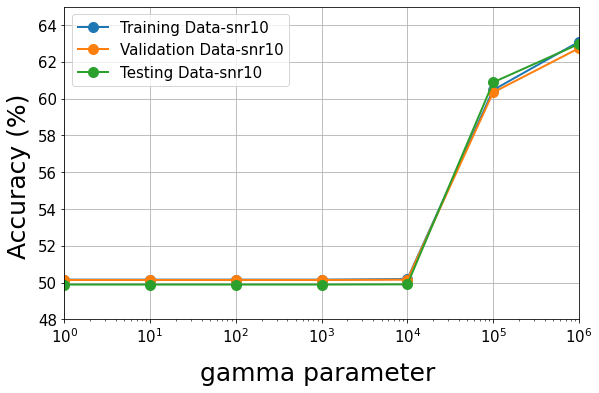

In [56]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(figsize=(8,5))

axes.plot(gam.iloc[:,3],gam.iloc[:,0]*100,linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes.plot(gam.iloc[:,3],gam.iloc[:,1]*100,linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes.plot(gam.iloc[:,3],gam.iloc[:,2]*100,linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes.set_xscale('log')
axes.set_xlim(left=1, right=1000000)
axes.set_ylim(bottom=48, top=65)
axes.legend(loc='upper left',fontsize=15)
axes.grid()

fig.tight_layout(w_pad=2)
fig.text(-0.035, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.3, -0.05, 'gamma parameter', va='center', fontdict={'size': 25})

# fig.savefig('squared_sigmod_gamma.png',facecolor='w',bbox_inches='tight',dpi='figure')

### Model AM radio data at snr10 using max values for signal and modulation classes

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv('./modelSet10.csv').iloc[:,1:].reset_index(drop=True)
data

waveform   I_component   Q_component
0              amdsb AM radio  0.0002543768 -0.0004099896
1              amdsb AM radio -0.0001277894  0.0000551971
2              amdsb AM radio  0.0086549073  0.0100985738
3              amdsb AM radio  0.0011843813  0.0026403053
4              amdsb AM radio -0.0090225767 -0.0111640040
...                       ...           ...           ...
803195  pulsed Ground mapping  0.0006254676 -0.0010186663
803196  pulsed Ground mapping -0.0021265494  0.0004947087
803197  pulsed Ground mapping -0.0012824405  0.0013834384
803198  pulsed Ground mapping -0.0004454184 -0.0025040600
803199  pulsed Ground mapping -0.0000952339  0.0004116938

[803200 rows x 3 columns]

In [12]:
data=data.loc[(data['waveform']=='amdsb AM radio') | (data['waveform']=='amssb AM radio')]
data['signal^2']=data['I_component']**2
data['modulation^2']=data['Q_component']**2
data

waveform   I_component   Q_component     signal^2  modulation^2
0       amdsb AM radio  0.0002543768 -0.0004099896 0.0000000647  0.0000001681
1       amdsb AM radio -0.0001277894  0.0000551971 0.0000000163  0.0000000030
2       amdsb AM radio  0.0086549073  0.0100985738 0.0000749074  0.0001019812
3       amdsb AM radio  0.0011843813  0.0026403053 0.0000014028  0.0000069712
4       amdsb AM radio -0.0090225767 -0.0111640040 0.0000814069  0.0001246350
...                ...           ...           ...          ...           ...
179195  amssb AM radio -0.0032243843  0.0091115432 0.0000103967  0.0000830202
179196  amssb AM radio -0.0014781944  0.0013012892 0.0000021851  0.0000016934
179197  amssb AM radio  0.0069484543  0.0034158935 0.0000482810  0.0000116683
179198  amssb AM radio  0.0043454668  0.0113804713 0.0000188831  0.0001295151
179199  amssb AM radio -0.0033978699  0.0090897195 0.0000115455  0.0000826230

[179200 rows x 5 columns]

In [13]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data

waveform   I_component   Q_component     signal^2  modulation^2
0              0  0.0002543768 -0.0004099896 0.0000000647  0.0000001681
1              0 -0.0001277894  0.0000551971 0.0000000163  0.0000000030
2              0  0.0086549073  0.0100985738 0.0000749074  0.0001019812
3              0  0.0011843813  0.0026403053 0.0000014028  0.0000069712
4              0 -0.0090225767 -0.0111640040 0.0000814069  0.0001246350
...          ...           ...           ...          ...           ...
179195         1 -0.0032243843  0.0091115432 0.0000103967  0.0000830202
179196         1 -0.0014781944  0.0013012892 0.0000021851  0.0000016934
179197         1  0.0069484543  0.0034158935 0.0000482810  0.0000116683
179198         1  0.0043454668  0.0113804713 0.0000188831  0.0001295151
179199         1 -0.0033978699  0.0090897195 0.0000115455  0.0000826230

[179200 rows x 5 columns]

In [14]:
pd.options.display.float_format = '{:,.10f}'.format

data=data.iloc[:,[0,3,4]]
data

waveform     signal^2  modulation^2
0              0 0.0000000647  0.0000001681
1              0 0.0000000163  0.0000000030
2              0 0.0000749074  0.0001019812
3              0 0.0000014028  0.0000069712
4              0 0.0000814069  0.0001246350
...          ...          ...           ...
179195         1 0.0000103967  0.0000830202
179196         1 0.0000021851  0.0000016934
179197         1 0.0000482810  0.0000116683
179198         1 0.0000188831  0.0001295151
179199         1 0.0000115455  0.0000826230

[179200 rows x 3 columns]

In [15]:
data.describe()

waveform           signal^2       modulation^2
count 179,200.0000000000 179,200.0000000000 179,200.0000000000
mean        0.5000000000       0.0000418686       0.0000413142
std         0.5000013951       0.0000533510       0.0000525784
min         0.0000000000       0.0000000000       0.0000000000
25%         0.0000000000       0.0000018188       0.0000017652
50%         0.5000000000       0.0000126618       0.0000121133
75%         1.0000000000       0.0000674777       0.0000684574
max         1.0000000000       0.0003478642       0.0004861459

In [16]:
data.loc[data['signal^2']>=0.0000674777,'sig_max'] = data['signal^2']
data.loc[data['modulation^2']>=0.0000684574,'mod_max'] = data['modulation^2']
data

waveform     signal^2  modulation^2      sig_max      mod_max
0              0 0.0000000647  0.0000001681          nan          nan
1              0 0.0000000163  0.0000000030          nan          nan
2              0 0.0000749074  0.0001019812 0.0000749074 0.0001019812
3              0 0.0000014028  0.0000069712          nan          nan
4              0 0.0000814069  0.0001246350 0.0000814069 0.0001246350
...          ...          ...           ...          ...          ...
179195         1 0.0000103967  0.0000830202          nan 0.0000830202
179196         1 0.0000021851  0.0000016934          nan          nan
179197         1 0.0000482810  0.0000116683          nan          nan
179198         1 0.0000188831  0.0001295151          nan 0.0001295151
179199         1 0.0000115455  0.0000826230          nan 0.0000826230

[179200 rows x 5 columns]

In [17]:
data.fillna("0",inplace=True)
data

waveform     signal^2  modulation^2      sig_max      mod_max
0              0 0.0000000647  0.0000001681            0            0
1              0 0.0000000163  0.0000000030            0            0
2              0 0.0000749074  0.0001019812 0.0000749074 0.0001019812
3              0 0.0000014028  0.0000069712            0            0
4              0 0.0000814069  0.0001246350 0.0000814069 0.0001246350
...          ...          ...           ...          ...          ...
179195         1 0.0000103967  0.0000830202            0 0.0000830202
179196         1 0.0000021851  0.0000016934            0            0
179197         1 0.0000482810  0.0000116683            0            0
179198         1 0.0000188831  0.0001295151            0 0.0001295151
179199         1 0.0000115455  0.0000826230            0 0.0000826230

[179200 rows x 5 columns]

In [18]:
data1=data
data1

waveform     signal^2  modulation^2      sig_max      mod_max
0              0 0.0000000647  0.0000001681            0            0
1              0 0.0000000163  0.0000000030            0            0
2              0 0.0000749074  0.0001019812 0.0000749074 0.0001019812
3              0 0.0000014028  0.0000069712            0            0
4              0 0.0000814069  0.0001246350 0.0000814069 0.0001246350
...          ...          ...           ...          ...          ...
179195         1 0.0000103967  0.0000830202            0 0.0000830202
179196         1 0.0000021851  0.0000016934            0            0
179197         1 0.0000482810  0.0000116683            0            0
179198         1 0.0000188831  0.0001295151            0 0.0001295151
179199         1 0.0000115455  0.0000826230            0 0.0000826230

[179200 rows x 5 columns]

In [19]:
size=[1,10,100,1000,10000,100000]
tr=[]
va=[]
te=[]

t0=time.time()
for i in size:
    data1 = data.sample(frac=0.5,random_state=42)
    X=data1.iloc[:,[3,4]]
    y=data1['waveform']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

    svm=SVC(gamma=i,decision_function_shape='ovo',random_state=42)
    svm.fit(X_train,y_train)
    train=svm.score(X_train,y_train)
    val=svm.score(X_val,y_val)
    test=svm.score(X_test,y_test)
    
    tr.append(train)
    va.append(val)
    te.append(test)
    
t1=time.time()
total=t1-t0

In [20]:
print("Scores for training the squared values")
print("Training Score:", tr)
print("Validation Score:", va)
print("Test Score:", te)
print("{:.2f}".format(total/60),"mins")

Scores for training the squared values
Training Score: [0.5015660026391516, 0.5015660026391516, 0.5015660026391516, 0.5015660026391516, 0.6231895578626051, 0.5885308192499086]
Validation Score: [0.5013809819063187, 0.5013809819063187, 0.5013809819063187, 0.5013809819063187, 0.6243165548728933, 0.5893128910433459]
Test Score: [0.49888392857142855, 0.49888392857142855, 0.49888392857142855, 0.49888392857142855, 0.62734375, 0.5934151785714286]
16.62 mins


In [21]:
pd.options.display.float_format = '{:,.3f}'.format

gam=pd.concat([pd.DataFrame(tr),pd.DataFrame(va),pd.DataFrame(te)],axis=1)
gam.columns=['train','val','test']
gam['sample_frac']=[1,10,100,1000,10000,100000]
gam

train   val  test  sample_frac
0  0.502 0.501 0.499            1
1  0.502 0.501 0.499           10
2  0.502 0.501 0.499          100
3  0.502 0.501 0.499         1000
4  0.623 0.624 0.627        10000
5  0.589 0.589 0.593       100000

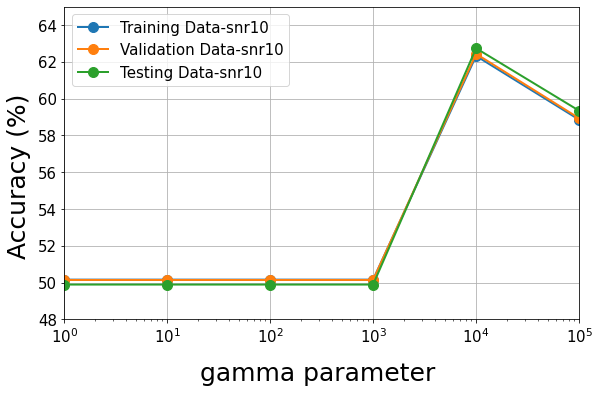

In [24]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(figsize=(8,5))

axes.plot(gam.iloc[:,3],gam.iloc[:,0]*100,linewidth=2,marker='o',markersize=10,label='Training Data-snr10')
axes.plot(gam.iloc[:,3],gam.iloc[:,1]*100,linewidth=2,marker='o',markersize=10,label='Validation Data-snr10')
axes.plot(gam.iloc[:,3],gam.iloc[:,2]*100,linewidth=2,marker='o',markersize=10,label='Testing Data-snr10')
axes.set_xscale('log')
axes.set_xlim(left=1, right=100000)
axes.set_ylim(bottom=48, top=65)
axes.legend(loc='upper left',fontsize=15)
axes.grid()

fig.tight_layout(w_pad=2)
fig.text(-0.035, 0.5, 'Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 25})
fig.text(0.3, -0.05, 'gamma parameter', va='center', fontdict={'size': 25})

fig.savefig('max_sigmod_gamma.png',facecolor='w',bbox_inches='tight',dpi='figure')

### Construct Final Model

### Model with SNR of 18

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

In [2]:
data=pd.read_csv('./modelSet18.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio    -0.000002    -0.000007
1              amdsb AM radio    -0.000020     0.000045
2              amdsb AM radio     0.008584     0.010027
3              amdsb AM radio     0.001179     0.002394
4              amdsb AM radio    -0.009112    -0.011146
...                       ...          ...          ...
802427  pulsed Ground mapping    -0.000165    -0.000049
802428  pulsed Ground mapping    -0.000064     0.000084
802429  pulsed Ground mapping     0.000134    -0.000167
802430  pulsed Ground mapping    -0.000188     0.000070
802431  pulsed Ground mapping     0.000048     0.000477

[802432 rows x 3 columns]

In [3]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
504117         5     0.003191     0.003946
634945         7    -0.061246     0.003416
207303         2     0.000097     0.007783
404040         4    -0.007885     0.001466
652940         7    -0.001249     0.001810
...          ...          ...          ...
656949         7    -0.001379     0.000033
318543         3    -0.004259    -0.008884
441946         4    -0.002461    -0.007832
577891         6    -0.000562     0.013538
303904         3     0.005894     0.010931

[401216 rows x 3 columns]

In [4]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
504117     0.003191     0.003946
634945    -0.061246     0.003416
207303     0.000097     0.007783
404040    -0.007885     0.001466
652940    -0.001249     0.001810
...             ...          ...
656949    -0.001379     0.000033
318543    -0.004259    -0.008884
441946    -0.002461    -0.007832
577891    -0.000562     0.013538
303904     0.005894     0.010931

[401216 rows x 2 columns]

In [5]:
y=data1['waveform']
y

504117    5
634945    7
207303    2
404040    4
652940    7
         ..
656949    7
318543    3
441946    4
577891    6
303904    3
Name: waveform, Length: 401216, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(281653, 2)
(79441, 2)
(40122, 2)


In [8]:
print("number of 0 in training set: {:.0f}".format(len(y_train.loc[y_train==0])))
print("number of 1 in training set: {:.0f}".format(len(y_train.loc[y_train==1])))
print("number of 2 in training set: {:.0f}".format(len(y_train.loc[y_train==2])))
print("number of 3 in training set: {:.0f}".format(len(y_train.loc[y_train==3])))
print("number of 4 in training set: {:.0f}".format(len(y_train.loc[y_train==4])))
print("number of 5 in training set: {:.0f}".format(len(y_train.loc[y_train==5])))
print("number of 6 in training set: {:.0f}".format(len(y_train.loc[y_train==6])))
print("number of 7 in training set: {:.0f}".format(len(y_train.loc[y_train==7])))
print("number of 8 in training set: {:.0f}\n".format(len(y_train.loc[y_train==8])))

print("number of 0 in validation set: {:.0f}".format(len(y_val.loc[y_val==0])))
print("number of 1 in validation set: {:.0f}".format(len(y_val.loc[y_val==1])))
print("number of 2 in validation set: {:.0f}".format(len(y_val.loc[y_val==2])))
print("number of 3 in validation set: {:.0f}".format(len(y_val.loc[y_val==3])))
print("number of 4 in validation set: {:.0f}".format(len(y_val.loc[y_val==4])))
print("number of 5 in validation set: {:.0f}".format(len(y_val.loc[y_val==5])))
print("number of 6 in validation set: {:.0f}".format(len(y_val.loc[y_val==6])))
print("number of 7 in validation set: {:.0f}".format(len(y_val.loc[y_val==7])))
print("number of 8 in validation set: {:.0f}\n".format(len(y_val.loc[y_val==8])))

print("number of 0 in test set: {:.0f}".format(len(y_test.loc[y_test==0])))
print("number of 1 in test set: {:.0f}".format(len(y_test.loc[y_test==1])))
print("number of 2 in test set: {:.0f}".format(len(y_test.loc[y_test==2])))
print("number of 3 in test set: {:.0f}".format(len(y_test.loc[y_test==3])))
print("number of 4 in test set: {:.0f}".format(len(y_test.loc[y_test==4])))
print("number of 5 in test set: {:.0f}".format(len(y_test.loc[y_test==5])))
print("number of 6 in test set: {:.0f}".format(len(y_test.loc[y_test==6])))
print("number of 7 in test set: {:.0f}".format(len(y_test.loc[y_test==7])))
print("number of 8 in test set: {:.0f}".format(len(y_test.loc[y_test==8])))

number of 0 in training set: 31165
number of 1 in training set: 31104
number of 2 in training set: 31580
number of 3 in training set: 30128
number of 4 in training set: 31629
number of 5 in training set: 31520
number of 6 in training set: 31610
number of 7 in training set: 31506
number of 8 in training set: 31411

number of 0 in validation set: 8922
number of 1 in validation set: 8967
number of 2 in validation set: 8747
number of 3 in validation set: 8407
number of 4 in validation set: 8973
number of 5 in validation set: 8592
number of 6 in validation set: 8936
number of 7 in validation set: 8785
number of 8 in validation set: 9112

number of 0 in test set: 4541
number of 1 in test set: 4491
number of 2 in test set: 4473
number of 3 in test set: 4233
number of 4 in test set: 4522
number of 5 in test set: 4583
number of 6 in test set: 4453
number of 7 in test set: 4378
number of 8 in test set: 4448


In [9]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [10]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.50
Validation Score: 0.50
Test Score: 0.50
82.90 mins


In [11]:
del data, data1, X, y, svm, train, test, val

### Model with SNR of 16

In [12]:
data=pd.read_csv('./modelSet16.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000022    -0.000005
1              amdsb AM radio    -0.000108    -0.000076
2              amdsb AM radio     0.008632     0.010212
3              amdsb AM radio     0.001194     0.002439
4              amdsb AM radio    -0.009193    -0.011271
...                       ...          ...          ...
801787  pulsed Ground mapping    -0.000411     0.000210
801788  pulsed Ground mapping    -0.000355    -0.000044
801789  pulsed Ground mapping     0.000022     0.000004
801790  pulsed Ground mapping    -0.000053     0.000390
801791  pulsed Ground mapping    -0.000189    -0.000330

[801792 rows x 3 columns]

In [13]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
651604         7    -0.000008     0.000957
24789          0    -0.001996    -0.000454
284587         3     0.002115     0.009358
222973         2    -0.002505     0.007441
365405         4     0.007881    -0.001622
...          ...          ...          ...
574447         6     0.006362    -0.010868
635895         7    -0.000120     0.000026
14723          0    -0.002413     0.002850
703028         7    -0.000183    -0.000313
418272         4    -0.007124    -0.003821

[400896 rows x 3 columns]

In [14]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
651604    -0.000008     0.000957
24789     -0.001996    -0.000454
284587     0.002115     0.009358
222973    -0.002505     0.007441
365405     0.007881    -0.001622
...             ...          ...
574447     0.006362    -0.010868
635895    -0.000120     0.000026
14723     -0.002413     0.002850
703028    -0.000183    -0.000313
418272    -0.007124    -0.003821

[400896 rows x 2 columns]

In [15]:
y=data1['waveform']
y

651604    7
24789     0
284587    3
222973    2
365405    4
         ..
574447    6
635895    7
14723     0
703028    7
418272    4
Name: waveform, Length: 400896, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [17]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [18]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.49
Validation Score: 0.48
Test Score: 0.49
86.47 mins


In [ ]:
del data, data1, X, y, svm, train, test, val

### Model with SNR of 14

In [19]:
data=pd.read_csv('./modelSet14.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio    -0.000036    -0.000043
1              amdsb AM radio     0.000125     0.000058
2              amdsb AM radio     0.008543     0.010040
3              amdsb AM radio     0.001041     0.002326
4              amdsb AM radio    -0.009134    -0.011050
...                       ...          ...          ...
802811  pulsed Ground mapping    -0.000170    -0.000530
802812  pulsed Ground mapping    -0.000422    -0.000548
802813  pulsed Ground mapping     0.000459    -0.000096
802814  pulsed Ground mapping     0.000082     0.000479
802815  pulsed Ground mapping     0.000228    -0.000222

[802816 rows x 3 columns]

In [20]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
457039         5    -0.003418     0.005908
442875         4     0.005044    -0.006387
329985         3    -0.000142    -0.000040
286177         3    -0.000704     0.000760
463470         5    -0.003648    -0.001881
...          ...          ...          ...
441319         4    -0.006474    -0.005019
150288         1    -0.001670     0.000356
396594         4    -0.007509     0.002105
797239         8    -0.000258     0.001248
435999         4    -0.004770     0.005868

[401408 rows x 3 columns]

In [21]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
457039    -0.003418     0.005908
442875     0.005044    -0.006387
329985    -0.000142    -0.000040
286177    -0.000704     0.000760
463470    -0.003648    -0.001881
...             ...          ...
441319    -0.006474    -0.005019
150288    -0.001670     0.000356
396594    -0.007509     0.002105
797239    -0.000258     0.001248
435999    -0.004770     0.005868

[401408 rows x 2 columns]

In [22]:
y=data1['waveform']
y

457039    5
442875    4
329985    3
286177    3
463470    5
         ..
441319    4
150288    1
396594    4
797239    8
435999    4
Name: waveform, Length: 401408, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [24]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [25]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.46
Validation Score: 0.46
Test Score: 0.46
89.72 mins


In [26]:
del data, data1, X, y, svm, train, test, val

### Model with SNR of 12

In [27]:
data=pd.read_csv('./modelSet12.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000176     0.000151
1              amdsb AM radio     0.000078    -0.000174
2              amdsb AM radio     0.008467     0.010002
3              amdsb AM radio     0.001162     0.002515
4              amdsb AM radio    -0.009137    -0.011370
...                       ...          ...          ...
801659  pulsed Ground mapping     0.000273    -0.000886
801660  pulsed Ground mapping    -0.000657    -0.000350
801661  pulsed Ground mapping    -0.000166    -0.000383
801662  pulsed Ground mapping    -0.000510     0.000791
801663  pulsed Ground mapping     0.000109    -0.001154

[801664 rows x 3 columns]

In [28]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
547756         6     0.012614    -0.001304
197814         2    -0.007417    -0.002128
597602         6    -0.001224    -0.011810
673491         7    -0.001310     0.001715
760647         8    -0.000005     0.023407
...          ...          ...          ...
794401         8    -0.020257     0.010344
103320         1    -0.000828    -0.000641
378436         4     0.008088     0.000485
699208         7     0.000940     0.002394
779514         8     0.000165    -0.002077

[400832 rows x 3 columns]

In [29]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
547756     0.012614    -0.001304
197814    -0.007417    -0.002128
597602    -0.001224    -0.011810
673491    -0.001310     0.001715
760647    -0.000005     0.023407
...             ...          ...
794401    -0.020257     0.010344
103320    -0.000828    -0.000641
378436     0.008088     0.000485
699208     0.000940     0.002394
779514     0.000165    -0.002077

[400832 rows x 2 columns]

In [30]:
y=data1['waveform']
y

547756    6
197814    2
597602    6
673491    7
760647    8
         ..
794401    8
103320    1
378436    4
699208    7
779514    8
Name: waveform, Length: 400832, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [32]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [33]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.43
Validation Score: 0.42
Test Score: 0.42
93.78 mins


### Model with SNR of 10

In [5]:
data=pd.read_csv('./modelSet10.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000254    -0.000410
1              amdsb AM radio    -0.000128     0.000055
2              amdsb AM radio     0.008655     0.010099
3              amdsb AM radio     0.001184     0.002640
4              amdsb AM radio    -0.009023    -0.011164
...                       ...          ...          ...
803195  pulsed Ground mapping     0.000625    -0.001019
803196  pulsed Ground mapping    -0.002127     0.000495
803197  pulsed Ground mapping    -0.001282     0.001383
803198  pulsed Ground mapping    -0.000445    -0.002504
803199  pulsed Ground mapping    -0.000095     0.000412

[803200 rows x 3 columns]

In [6]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
125503         1     0.009311    -0.002153
283616         3     0.009864    -0.001268
180906         2     0.006024    -0.005167
590003         6     0.000705    -0.001990
43205          0     0.001639    -0.001299
...          ...          ...          ...
785040         8    -0.000342    -0.000778
260862         2    -0.006954     0.004669
420965         4     0.005786    -0.005756
651483         7    -0.004294     0.002628
51492          0    -0.009823     0.008956

[401600 rows x 3 columns]

In [7]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
125503     0.009311    -0.002153
283616     0.009864    -0.001268
180906     0.006024    -0.005167
590003     0.000705    -0.001990
43205      0.001639    -0.001299
...             ...          ...
785040    -0.000342    -0.000778
260862    -0.006954     0.004669
420965     0.005786    -0.005756
651483    -0.004294     0.002628
51492     -0.009823     0.008956

[401600 rows x 2 columns]

In [8]:
y=data1['waveform']
y

125503    1
283616    3
180906    2
590003    6
43205     0
         ..
785040    8
260862    2
420965    4
651483    7
51492     0
Name: waveform, Length: 401600, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [10]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [11]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.39
Validation Score: 0.39
Test Score: 0.39
122.06 mins


In [12]:
del data, data1, X, y, svm, train, test, val

### Model with SNR of 8

In [13]:
data=pd.read_csv('./modelSet8.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio    -0.000461     0.000018
1              amdsb AM radio     0.000535    -0.000291
2              amdsb AM radio     0.008666     0.009919
3              amdsb AM radio     0.001316     0.002266
4              amdsb AM radio    -0.008100    -0.011423
...                       ...          ...          ...
801275  pulsed Ground mapping     0.000207    -0.000774
801276  pulsed Ground mapping    -0.000461    -0.001998
801277  pulsed Ground mapping    -0.001025    -0.001098
801278  pulsed Ground mapping    -0.000544    -0.000363
801279  pulsed Ground mapping     0.001230    -0.000590

[801280 rows x 3 columns]

In [14]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
313261         3    -0.003325    -0.003173
719549         8    -0.000868     0.000379
542116         6     0.013219    -0.004088
605474         6    -0.007033     0.009986
677161         7     0.005737     0.002084
...          ...          ...          ...
394091         4     0.004572    -0.005792
732348         8    -0.002727     0.002159
740111         8     0.001841     0.001989
163412         1    -0.001249    -0.000800
28209          0    -0.001201    -0.000425

[400640 rows x 3 columns]

In [15]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
313261    -0.003325    -0.003173
719549    -0.000868     0.000379
542116     0.013219    -0.004088
605474    -0.007033     0.009986
677161     0.005737     0.002084
...             ...          ...
394091     0.004572    -0.005792
732348    -0.002727     0.002159
740111     0.001841     0.001989
163412    -0.001249    -0.000800
28209     -0.001201    -0.000425

[400640 rows x 2 columns]

In [16]:
y=data1['waveform']
y

313261    3
719549    8
542116    6
605474    6
677161    7
         ..
394091    4
732348    8
740111    8
163412    1
28209     0
Name: waveform, Length: 400640, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [18]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [19]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.35
Validation Score: 0.35
Test Score: 0.35
91.10 mins


### Model with SNR of 6

In [20]:
data=pd.read_csv('./modelSet6.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio    -0.000206     0.000142
1              amdsb AM radio    -0.000369     0.000201
2              amdsb AM radio     0.007986     0.010055
3              amdsb AM radio     0.001885     0.001979
4              amdsb AM radio    -0.009410    -0.010789
...                       ...          ...          ...
803323  pulsed Ground mapping    -0.001359     0.004588
803324  pulsed Ground mapping     0.001701    -0.001417
803325  pulsed Ground mapping     0.000474    -0.003347
803326  pulsed Ground mapping    -0.002186    -0.001325
803327  pulsed Ground mapping     0.002786     0.002289

[803328 rows x 3 columns]

In [21]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
465584         5    -0.011006     0.002299
267579         2     0.000170    -0.007386
363320         4     0.006889     0.004170
155703         1    -0.001612     0.009520
474479         5     0.005877     0.000150
...          ...          ...          ...
779063         8     0.008543     0.001074
599720         6    -0.007152     0.010007
646547         7    -0.001311    -0.001015
707781         7     0.000726    -0.001311
430981         4    -0.000605     0.011959

[401664 rows x 3 columns]

In [22]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
465584    -0.011006     0.002299
267579     0.000170    -0.007386
363320     0.006889     0.004170
155703    -0.001612     0.009520
474479     0.005877     0.000150
...             ...          ...
779063     0.008543     0.001074
599720    -0.007152     0.010007
646547    -0.001311    -0.001015
707781     0.000726    -0.001311
430981    -0.000605     0.011959

[401664 rows x 2 columns]

In [23]:
y=data1['waveform']
y

465584    5
267579    2
363320    4
155703    1
474479    5
         ..
779063    8
599720    6
646547    7
707781    7
430981    4
Name: waveform, Length: 401664, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [25]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [26]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.30
Validation Score: 0.29
Test Score: 0.29
99.03 mins


### Model with SNR of 4

In [3]:
data=pd.read_csv('./modelSet4.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio     0.000258     0.001029
1              amdsb AM radio    -0.000810    -0.000067
2              amdsb AM radio     0.009004     0.010691
3              amdsb AM radio     0.000103     0.002342
4              amdsb AM radio    -0.008538    -0.012100
...                       ...          ...          ...
803067  pulsed Ground mapping    -0.001219    -0.000734
803068  pulsed Ground mapping     0.001696    -0.007551
803069  pulsed Ground mapping    -0.000578    -0.000735
803070  pulsed Ground mapping     0.002910     0.004412
803071  pulsed Ground mapping    -0.001457     0.003891

[803072 rows x 3 columns]

In [4]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
509766         5     0.005534    -0.006007
343803         3    -0.005471    -0.001659
94155          1     0.007189    -0.004175
176026         1     0.007991     0.009768
304506         3    -0.007573    -0.003868
...          ...          ...          ...
686375         7     0.000940    -0.001785
744221         8     0.007457    -0.009015
184404         2     0.005105     0.005732
762292         8     0.003123     0.000679
407292         4    -0.007104     0.006947

[401536 rows x 3 columns]

In [5]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
509766     0.005534    -0.006007
343803    -0.005471    -0.001659
94155      0.007189    -0.004175
176026     0.007991     0.009768
304506    -0.007573    -0.003868
...             ...          ...
686375     0.000940    -0.001785
744221     0.007457    -0.009015
184404     0.005105     0.005732
762292     0.003123     0.000679
407292    -0.007104     0.006947

[401536 rows x 2 columns]

In [6]:
y=data1['waveform']
y

509766    5
343803    3
94155     1
176026    1
304506    3
         ..
686375    7
744221    8
184404    2
762292    8
407292    4
Name: waveform, Length: 401536, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [8]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [9]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.24
Validation Score: 0.24
Test Score: 0.24
139.66 mins


In [10]:
del data, data1, X, y, svm, train, test, val

### Model with SNR of 2

In [11]:
data=pd.read_csv('./modelSet2.csv').iloc[:,1:].reset_index(drop=True)
data

waveform  I_component  Q_component
0              amdsb AM radio    -0.001768     0.000664
1              amdsb AM radio     0.002407     0.002217
2              amdsb AM radio     0.006660     0.010904
3              amdsb AM radio     0.003048     0.002520
4              amdsb AM radio    -0.012074    -0.011979
...                       ...          ...          ...
801915  pulsed Ground mapping     0.003196    -0.002381
801916  pulsed Ground mapping     0.001291     0.003485
801917  pulsed Ground mapping    -0.002176     0.000989
801918  pulsed Ground mapping    -0.001951    -0.000496
801919  pulsed Ground mapping    -0.001712    -0.004790

[801920 rows x 3 columns]

In [12]:
data=data.replace('amdsb AM radio', 0)
data=data.replace('amssb AM radio', 1)
data=data.replace('ask short-range', 2)
data=data.replace('bpsk Satcom', 3)
data=data.replace('fmcw Radar-Altimeter', 4)
data=data.replace('pulsed Air-Ground-MTI', 5)
data=data.replace('pulsed Airborne-detection', 6)
data=data.replace('pulsed Airborne-range', 7)
data=data.replace('pulsed Ground mapping', 8)

data1 = data.sample(frac=0.5,random_state=42)
data1

waveform  I_component  Q_component
527119         5     0.000812     0.008410
795014         8    -0.017387    -0.006610
341392         3     0.001770     0.002454
716339         8    -0.000579    -0.000873
758385         8    -0.002628    -0.000451
...          ...          ...          ...
43992          0    -0.010050    -0.005379
441492         4     0.005663    -0.005643
683442         7    -0.004479    -0.007304
767818         8     0.003674    -0.002694
24493          0     0.000268     0.002824

[400960 rows x 3 columns]

In [13]:
X=data1.iloc[:,[1,2]]
X

I_component  Q_component
527119     0.000812     0.008410
795014    -0.017387    -0.006610
341392     0.001770     0.002454
716339    -0.000579    -0.000873
758385    -0.002628    -0.000451
...             ...          ...
43992     -0.010050    -0.005379
441492     0.005663    -0.005643
683442    -0.004479    -0.007304
767818     0.003674    -0.002694
24493      0.000268     0.002824

[400960 rows x 2 columns]

In [14]:
y=data1['waveform']
y

527119    5
795014    8
341392    3
716339    8
758385    8
         ..
43992     0
441492    4
683442    7
767818    8
24493     0
Name: waveform, Length: 400960, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.78, random_state=42)

In [16]:
t0=time.time()

svm=SVC(gamma=100000,decision_function_shape='ovo',random_state=42)
svm.fit(X_train,y_train)
train=svm.score(X_train,y_train)
val=svm.score(X_val,y_val)
test=svm.score(X_test,y_test)

t1=time.time()
total=t1-t0

In [17]:
#gamma=100000
print("Training Score: {:.2f}".format(train))
print("Validation Score: {:.2f}".format(val))
print("Test Score: {:.2f}".format(test))
print("{:.2f}".format(total/60),"mins")

Training Score: 0.19
Validation Score: 0.19
Test Score: 0.19
149.82 mins


## Plot model results

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

model_data={'SNR':[2,4,6,8,10,12,14,16,18],
            'Training Data':[19,24,30,35,39,43,46,49,50],
            'Testing Data':[19,24,29,35,39,42,46,49,50]}

In [12]:
md_data=pd.DataFrame(model_data)
md_data

SNR  Training Data  Testing Data
0    2             19            19
1    4             24            24
2    6             30            29
3    8             35            35
4   10             39            39
5   12             43            42
6   14             46            46
7   16             49            49
8   18             50            50

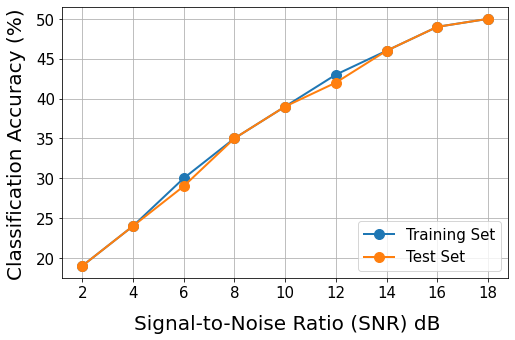

In [36]:
plt.rc('xtick', labelsize=15, color='black')
plt.rc('ytick', labelsize=15, color='black')

fig, axes=plt.subplots(figsize=(8,5))

axes.plot(md_data.iloc[:,0],md_data.iloc[:,1],linewidth=2,marker='o',markersize=10,label='Training Set')
axes.plot(md_data.iloc[:,0],md_data.iloc[:,2],linewidth=2,marker='o',markersize=10,label='Test Set')
axes.legend(loc='lower right',fontsize=15)
axes.grid()

# plt.xlim([0,20])

fig.text(0.03,0.5,'Classification Accuracy (%)', va='center', rotation='vertical', fontdict={'size': 20})
fig.text(0.25, 0, 'Signal-to-Noise Ratio (SNR) dB', va='center', fontdict={'size': 20})

fig.savefig('final_model.png',facecolor='w',bbox_inches='tight',dpi='figure')